# <font color='Brown'> Telecom Churn Case Study

### <font color='Green'> Problem Statement

<div style="text-align: justify">In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. Hence, it is vital for us to understand which customers may churn so that the rentention strategies can be devised accordingly.<br></div>


### <font color='Green'> Business Objective

<div style="text-align: justify">In this project, our business objective is to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. Thus, our focus would be on<br></div>
(i) Retaining high profitable customers.<br>
(ii) Predicting which customers are at high risk of churn (in order to devise customer retention strategies accordingly).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set Pandas to display all columns in the DataFrame
pd.set_option('display.max_columns', None)

# Configure Pandas to show all rows in the DataFrame
pd.set_option('display.max_rows', None)

# Ensure long sequences are fully printed in the output
pd.set_option('display.max_seq_items', None)

# Display the full content of each column
pd.set_option('display.max_colwidth', None)

In [2]:
# Defining a function to style DataFrame cells based on NaN values
def color_style(value):
    """
    This function applies a color style based on the input value.
    Returns a CSS style string with:
    - 'color: red' for values greater than 5% NaNs,
    - 'color: green' for values representing no NaNs,
    - 'color: black' for all other cases.
    """
    if value > 0:
        color = 'red'
    elif value == 0:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

In [3]:
# Creating a function to calculate and style the percentage of missing values in a DataFrame
def null_prcnt_df(data):
    df = data.copy()
    # Calculate the percentage of missing values for each column
    missing = pd.DataFrame(100 * df.isnull().sum() / len(df.index))
    missing.rename(columns={0: 'Null_Percentage'}, inplace=True)
    # Sort columns by percentage of missing values in descending order and apply color styling
    missing = pd.DataFrame(missing.Null_Percentage).sort_values(by='Null_Percentage', ascending=False).style.applymap(color_style)
    return missing
    

In [4]:
# Function to display content in 'bold' within a print statement
from IPython.display import Markdown, display
def printbold(string):   
    return display(Markdown(string))
    

In [5]:
# Define a function to calculate various evaluation metrics for a logistic regression model
def other_metrics_logistic_model(confusion):
    
    TP = confusion[1,1] # True Positives
    TN = confusion[0,0] # True Negatives
    FP = confusion[0,1] # False Positives
    FN = confusion[1,0] # False Negatives
    
    sensitivity = round((TP) / (TP + FN), 4) # Sensitivity of the logistic regression model
    specificity = round((TN) / (TN + FP), 4) # Specificity of the logistic regression model   
    FPR = round((FP) / (TN + FP), 4) # False Positive Rate - proportion of non-churners predicted as churners
    positive_pred_val = round((TP) / (TP + FP), 4) # Positive Predictive Value
    negative_pred_val = round((TN) / (TN + FN), 4) # Negative Predictive Value
    misclass_rate = round((FN + FP) / (TP + TN + FP + FN), 4) # Misclassification Rate
    
    metric_list = ['Sensitivity', 'Specificity', 'False Positive Rate', 'Positive Predictive Value', 'Negative Predictive Value', 'Misclassification Rate']
    metric_val = [sensitivity, specificity, FPR, positive_pred_val, negative_pred_val, misclass_rate]
    evaluation_metrics_df = pd.DataFrame({'Evaluation Metrics': metric_list, 'Value': metric_val})
    evaluation_metrics_df.set_index('Evaluation Metrics', inplace=True)
    return evaluation_metrics_df

In [6]:
# Define a function to plot the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes = ['Not Churned', 'Churned']
    cmap = plt.cm.Reds
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix', fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)
    thresh = cm.max() / 2.
    # Annotate the confusion matrix with the counts
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)


def print_model_metrics(y_test, y_pred, model_name):
    print(model_name + " Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    

In [7]:
# Verify the encoding of the 'telecom_churn_data.csv' file
import chardet
import os
file_path = os.path.join('/Users/kiranlingampally/Documents/machine learning/TELCOM PROJECT/telecom_churn_data.csv')
raw_data = open(file_path, 'rb').readline()

# Detect and print the file encoding details
encoding = chardet.detect(raw_data)
print("File encoding details:\n", encoding)

File encoding details:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## <font color='Blue'> Step 1: Reading and Understanding the Data

### <font color='Green'> Data Sourcing


In [8]:
# Read the dataset from the CSV file
telecom_df = pd.read_csv('/Users/kiranlingampally/Documents/machine learning/TELCOM PROJECT/telecom_churn_data.csv')
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [9]:
# Check number of records and feature columns: 99999 records and 226 columns
telecom_df.shape

(99999, 226)

In [10]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
# Generate descriptive statistics for the dataset
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [12]:
# Check for null values in the entire dataframe
null_prcnt_df(telecom_df)

## Data Cleaning and Manipulation

In [13]:
# Remove leading and trailing whitespace from column names (if any)
telecom_df = telecom_df.rename(columns=lambda x: x.strip(), inplace=False)

In [14]:
# Check for and remove duplicate records (if any)
telecom_df = telecom_df.drop_duplicates()


In [15]:
# List columns with incorrect names (data dictionary specifies 'RECH: Recharge')
last_day_rech_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day_rch_amt')])
last_day_rech_cols

['last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9']

In [16]:
# Correct column names from 'last_day_rch_amt_*' to 'last_day_rech_amt_*' for months 6, 7, 8, and 9
telecom_df = telecom_df.rename(columns={
    'last_day_rch_amt_6': 'last_day_rech_amt_6',
    'last_day_rch_amt_7': 'last_day_rech_amt_7',
    'last_day_rch_amt_8': 'last_day_rech_amt_8',
    'last_day_rch_amt_9': 'last_day_rech_amt_9'
})
correct_last_day_rech_amt_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day')])
correct_last_day_rech_amt_cols

['last_day_rech_amt_6',
 'last_day_rech_amt_7',
 'last_day_rech_amt_8',
 'last_day_rech_amt_9']

In churn prediction, we are given that there are three phases of customer lifecycle :

<br>(i) The ‘good’ phase [Month 6 & 7]: First two months<br>
<br>(ii) The ‘action’ phase [Month 8]: Third month<br>
<br>(iii) The ‘churn’ phase [Month 9]: Fourth Month<br>

**1. Derive new features (for filtering High-Value Customers)**

In [17]:
# Columns containing recharge amount ('rech_amt') or recharge data ('rech_data') details
rech_amt_data_cols = telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data', regex=True)]
rech_amt_data_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rech_amt_6',
       'last_day_rech_amt_7', 'last_day_rech_amt_8', 'last_day_rech_amt_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

**Observation:** The above mentioned columns correspond to `'rech_amt'` and `'rech_data'` features across months 6, 7 and 8 respectively:<br>
(i) Total recharge amount (calling)<br>
(ii) Maximum recharge amount (calling)<br>
(iii) Last day recharge amount<br>
(iv) Last date of Recharging the data<br>
(v) Total recharge for data<br>
(vi) Maximum recharge for data<br>
(vii) Average recharge amount for data<br>

In [18]:
# Check for null values in the specified columns and display the percentage of missing values by column
rech_amt_data_df = telecom_df[rech_amt_data_cols]
null_prcnt_df(rech_amt_data_df)

**Observation:** Among the `'rech_amt'` and `'rech_data'` features, all the `data features` have around 74% missing values whereas the  `calling based recharge features` have no missing values.

In [19]:
# Generate descriptive statistics for the specified columns in the dataframe
rech_amt_data_df.describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       last_day_rech_amt_6  last_day_rech_amt_7  last_day_rech_amt_8  \
count         99999.000000         99999.000000         99999.000000   
mean             63.156252            59.385804            62.641716   
std              97.356649            95.915385           104.431816   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%              30.000000            30.000000            30.000000   
75%             110.000000           110.000000           130.000000   
max            4010.000000          4010.000000          4449.000000   

       last_day_rech_amt_9  total_rech_data_6  total_rech_data_7  \
count         99999.000000       25153.000000       25571.000000   
mean             43.901249           2.463802           2.666419   
std              90.809712           2.789128           3.031593   
min               0.000000           1.000000           1.000000   
25%               0.000000           1.000000           1.000000   
50%               0.000000           1.000000           1.000000   
75%              50.000000           3.000000           3.000000   
max            3399.000000          61.000000          54.000000   

       total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  \
count       26339.000000       25922.000000     25153.000000     25571.000000   
mean            2.651999           2.441170       126.393392       126.729459   
std             3.074987           2.516339       108.477235       109.765267   
min             1.000000           1.000000         1.000000         1.000000   
25%             1.000000           1.000000        25.000000        25.000000   
50%             1.000000           2.000000       145.000000       145.000000   
75%             3.000000           3.000000       177.000000       177.000000   
max            60.000000          84.000000      1555.000000      1555.000000   

       max_rech_data_8  max_rech_data_9  av_rech_amt_data_6  \
count     26339.000000      25922.00000        25153.000000   
mean        125.717301        124.94144          192.600982   
std         109.437851        111.36376          192.646318   
min           1.000000          1.00000            1.000000   
25%          25.000000         25.00000           82.000000   
50%         145.000000        145.00000          154.000000   
75%         179.000000        179.00000          252.000000   
max        1555.000000       1555.00000         7546.000000   

       av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_

**Observation:** For columns like `av_rech_amt_data_*` and `total_rech_data_*` (*months*) the minimum value is 1. Hence, we can impute the missing values by 0. (Considering there were `no recharges` done by the customer). 

**Focus:** Records indicating **High-Value Customers**

In [20]:
# Impute NaN values with 0 for 'av_rech_amt_data_*' and 'total_rech_data_*' columns for months 6, 7, 8, and 9
telecom_df['av_rech_amt_data_6'] = telecom_df['av_rech_amt_data_6'].fillna(0)
telecom_df['av_rech_amt_data_7'] = telecom_df['av_rech_amt_data_7'].fillna(0)
telecom_df['av_rech_amt_data_8'] = telecom_df['av_rech_amt_data_8'].fillna(0)
telecom_df['av_rech_amt_data_9'] = telecom_df['av_rech_amt_data_9'].fillna(0)

telecom_df['total_rech_data_6'] = telecom_df['total_rech_data_6'].fillna(0)
telecom_df['total_rech_data_7'] = telecom_df['total_rech_data_7'].fillna(0)
telecom_df['total_rech_data_8'] = telecom_df['total_rech_data_8'].fillna(0)
telecom_df['total_rech_data_9'] = telecom_df['total_rech_data_9'].fillna(0)

In [21]:
# Derive features for identifying high-value customers

# Calculate total data recharge amount for months 6, 7, 8, and 9
telecom_df['total_rech_data_amt_6'] = telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_rech_data_amt_7'] = telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']
telecom_df['total_rech_data_amt_8'] = telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']
telecom_df['total_rech_data_amt_9'] = telecom_df['av_rech_amt_data_9'] * telecom_df['total_rech_data_9']

In [22]:
# Calculate the total average recharge during the good phase (months 6 and 7)
# Good phase: months 6 and 7
# Average of (calling recharge costs + data recharge costs) for months 6 and 7
telecom_df['avg_total_rech_plus_data_amt_6_7'] = (
    (telecom_df['total_rech_data_amt_6'] + telecom_df['total_rech_amt_6'] +
     telecom_df['total_rech_data_amt_7'] + telecom_df['total_rech_amt_7']) / 2
)

**2. Filter High-Value customers**

`Criteria for filtering High-Value Customers:`<br> High-valued customers are those customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

Creating a variable `'avg_total_rech_plus_data_amt_6_7_70per'` to filter high-value customers.

In [23]:
avg_total_rech_plus_data_amt_6_7_70per =  telecom_df['avg_total_rech_plus_data_amt_6_7'].quantile(0.7)
avg_total_rech_plus_data_amt_6_7_70per

478.0

In [24]:
# Filter high-value customers (those with an average recharge amount during the good phase in the top 70th percentile)
telecom_hv = telecom_df.loc[telecom_df['avg_total_rech_plus_data_amt_6_7'] > avg_total_rech_plus_data_amt_6_7_70per]
telecom_hv.shape

(29953, 231)

**Observation:** On filtering the high-value customers, we get about `29.9K observations`. These records of `high-value customers` shall be used for further analysis.

**(3) Deriving Churn column:**<br> 

Tagging churners (churn=1, else 0) based on the fourth month(i.e. month of September(9)) and removing attributes corresponding to the churn phase.

In [25]:
# Check for null values in features with no incoming and outgoing calls and no mobile internet usage during the churn phase
churn_phase_cols = ['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

churn_phase_cols_df = telecom_df[churn_phase_cols]
null_prcnt_df(churn_phase_cols_df)

**Observation:** There are no missing values in `'total_og_mou_9','total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'` features of churn phase.

In [26]:
# Calculate total usage in the churn phase by summing incoming and outgoing calls and mobile internet usage for month 9
telecom_hv['total_usage_col_9'] = (
    telecom_hv['total_og_mou_9'] + 
    telecom_hv['total_ic_mou_9'] + 
    telecom_hv['vol_2g_mb_9'] + 
    telecom_hv['vol_3g_mb_9']
)

# Tag churners based on 'total_usage_col_9'
# If 'total_usage_col_9' is 0, it indicates no calls or internet usage, hence tagging as churn (1); otherwise, not churn (0)
telecom_hv['churn'] = np.where(telecom_hv['total_usage_col_9'] == 0, 1, 0)

print("Tagging churners [No. of Records]\n(churn=1, else 0):")
telecom_hv['churn'].value_counts()

Tagging churners [No. of Records]
(churn=1, else 0):


churn
0    27520
1     2433
Name: count, dtype: int64

In [27]:
print("\nTagging churners (% of total)\n(churn=1, else 0):")
round(100*telecom_hv['churn'].value_counts()/len(telecom_hv.index),3)


Tagging churners (% of total)
(churn=1, else 0):


churn
0    91.877
1     8.123
Name: count, dtype: float64

In [28]:
# Calculate the churn rate as a percentage
churn_rate = round(100 * telecom_hv['churn'].sum() / len(telecom_hv.index), 3)
print('Churn Rate (%):', churn_rate)
print("High-Valued Customers Dataset shape:", telecom_hv.shape)

Churn Rate (%): 8.123
High-Valued Customers Dataset shape: (29953, 233)


Based on the fourth month (9), **the percentage of customers that might churn are around `8.123%`**

In [29]:
# List columns related to the churn phase (month 9) by identifying attributes containing '_9'
attributes_9 = list(telecom_hv.columns[telecom_hv.columns.str.contains('_9')])

# Include 'sep_vbc_3g' as it also pertains to the churn phase (month 9: September)
attributes_9.append('sep_vbc_3g')

# Drop churn phase (month 9) columns from the dataset, except the churn column
telecom_hv.drop(attributes_9, axis=1, inplace=True)

telecom_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

## Exploratory Data Analysis.

**1. Dealing with features with constant value (constant variance), dealing with datatypes and handling missing values for rest of the features, etc.**

In [30]:
# Remove columns with constant variance (i.e., columns where all values are the same or 0)
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()
    
    uniq_svcol = df_newsingle.nunique() == 1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values == True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    print('Columns that are dropped are:\n{0}'.format(list_uniq_svcol))
    print('\nNumber of columns dropped:\n{0}'.format(len(list_uniq_svcol)))
    return df_newsingle

telecom_hv = remove_single_val_uniq_col(telecom_hv)

Columns that are dropped are:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Number of columns dropped:
13


In [31]:
# Identify and list date columns, as they may not be useful for this non-time-series analysis
date_columns_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('date')])
date_columns_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [32]:
# Drop the date columns from the dataset
telecom_hv.drop(date_columns_list, axis=1, inplace=True)
telecom_hv.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [33]:
telecom_hv.shape

(29953, 157)

In [34]:
# Function to identify columns with potential categorical data by checking for distinct values
def hv_categorical_cols_unique(data):
    df = data.copy()
    
    unique_count = []
    unique_val = []
    col_list = []
    data_type = []
    
    for col in df.columns:
        if len(df[col].unique()) < 20:  # Set a threshold to identify potential categorical columns
            col_list.append(col)
            data_type.append(df[col].dtype)
            unique_count.append(len(df[col].unique()))
            unique_val.append(list(df[col].unique()))  # Store as list to ensure compatibility
    
    # Create DataFrame directly with values
    unique_df = pd.DataFrame({
        'Features': col_list,
        'Data Type': data_type,
        'Unique Count': unique_count,
        'Unique Values': unique_val  # Store as a column of lists
    })
    
    unique_df.set_index('Features', inplace=True)
    sorted_df = unique_df.sort_values(by='Unique Count', ascending=True)
    return sorted_df

printbold("**Checking for potential categorical datatype columns:**")
hv_categorical_cols_unique(data=telecom_hv)

**Checking for potential categorical datatype columns:**

Data Type  Unique Count  \
Features                                   
churn                int64             2   
night_pck_user_6   float64             3   
night_pck_user_7   float64             3   
night_pck_user_8   float64             3   
fb_user_6          float64             3   
fb_user_7          float64             3   
fb_user_8          float64             3   
monthly_2g_6         int64             5   
monthly_2g_7         int64             6   
monthly_2g_8         int64             6   
monthly_3g_6         int64            12   
monthly_3g_8         int64            12   
monthly_3g_7         int64            15   

                                                       Unique Values  
Features                                                              
churn                                                         [1, 0]  
night_pck_user_6                                     [0.0, nan, 1.0]  
night_pck_user_7                                     [0.0, nan, 1.0]  
night_pck_user_8                                     [0.0, nan, 1.0]  
fb_user_6                                            [1.0, nan, 0.0]  
fb_user_7                                            [1.0, nan, 0.0]  
fb_user_8                                            [1.0, nan, 0.0]  
monthly_2g_6                                         [0, 2, 1, 3, 4]  
monthly_2g_7                                      [0, 1, 2, 5, 4, 3]  
monthly_2g_8                                      [0, 1, 2, 5, 3, 4]  
monthly_3g_6                  [1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]  
monthly_3g_8                  [1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]  
monthly_3g_7      [1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10, 16]

**2. Extracting meaningful insights from EDA:**

In [35]:
telecom_hv.describe(percentiles= [0,0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99,0.999])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.995300e+04  29953.000000  29953.000000  29953.000000  29411.000000   
mean    7.001206e+09    558.820058    561.160547    508.890301    265.708886   
std     6.908102e+05    460.868223    480.028497    502.136278    462.692744   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
0%      7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.272400      0.726000      0.000000      0.000000   
10%     7.000251e+09    171.795000    177.973000     84.302800      1.650000   
25%     7.000609e+09    310.142000    310.071000    231.615000     19.250000   
50%     7.001203e+09    482.354000    481.496000    427.604000     88.140000   
75%     7.001804e+09    700.240000    698.829000    661.753000    297.490000   
90%     7.002165e+09    994.408600    996.170600    977.546400    765.090000   
95%     7.002285e+09   1241.649400   1261.885600   1255.086400   1145.670000   
99%     7.002386e+09   1985.394360   1999.521120   1986.739600   2164.130000   
99.9%   7.002408e+09   3888.323616   4116.035304   3978.343672   4146.482100   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29417.000000  28781.000000  29411.000000  29417.000000  28781.000000   
mean     272.935850    243.888097    380.688975    385.124799    348.769656   
std      483.282132    465.505577    484.441095    501.024091    486.836956   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        1.406000      0.650000     16.610000     15.578000      9.030000   
25%       18.180000     14.280000     78.550000     76.180000     58.760000   
50%       86.890000     72.990000    229.630000    227.130000    197.690000   
75%      298.380000    255.310000    494.755000    500.480000    455.440000   
90%      795.266000    686.940000    907.460000    924.888000    843.760000   
95%     1199.146000   1099.440000   1266.600000   1284.544000   1186.980000   
99%     2217.410800   2189.418000   2342.745000   2434.321200   2225.636000   
99.9%   4394.056800   4254.583600   4179.641400   4562.020240   4485.747000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29411.000000   29417.000000   28781.000000   29411.000000   
mean       16.421142      12.876567      13.021785      27.086158   
std        77.012820      76.501945      75.630647     117.284108   
min         0.000000       0.000000       0.000000       0.000000   
0%          0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        28.590000      14.780000      16.530000      52.130000   
95%        86.960000      56.844000      59.490000     148.425000   
99%       347.830000     286.161200     288.310000     536.398000   
99.9%     941.352100    1044.285840     928.755000    1460.447600   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29417.000000   28781.000000      29411.000000      29417.000000   
mean       20.522376      20.699213         86.132694         87.325499   
std        96.967183     106.833757        230.772468        242.604091   
min         0.000000       0.000000          0.000000   

In [36]:
# Create a function to generate boxplots for features corresponding to months 6, 7, and 8, differentiated by churn status
# Churn labels: 0 (Not Churned/Retention), 1 (Churned)
def plot_boxplots_6_7_8(feature):
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()
    
    # Boxplot for month 6
    plt.subplot(1,3,1)
    ax_11 = sns.boxplot(data=df, y=feature+"_6", x="churn", hue="churn", showfliers=False, palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)', 'Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("Churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)
    # Adjusting legend for subplot_131
    T1 = ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')
    
    # Boxplot for month 7
    plt.subplot(1,3,2)
    ax_22 = sns.boxplot(data=df, y=feature+"_7", x="churn", hue="churn", showfliers=False, palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)', 'Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("Churn", fontsize=22, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Adjusting legend for subplot_132
    T2 = ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')

    # Boxplot for month 8
    plt.subplot(1,3,3)
    ax_33 = sns.boxplot(data=df, y=feature+"_8", x="churn", hue="churn", showfliers=False, palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)', 'Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("Churn", fontsize=22, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Adjusting legend for subplot_133
    T3 = ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')
    
    plt.show()

**(a) Recharge amount (calling and data plan) associated features:**

In [37]:
rech_amt_cols = telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt')]  ##For 6, 7 and 8 months
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')

In [38]:
# Recheck for null values in the recharge amount features (calling and data plan)
rech_amt_df = telecom_hv[rech_amt_cols]
null_prcnt_df(rech_amt_df)


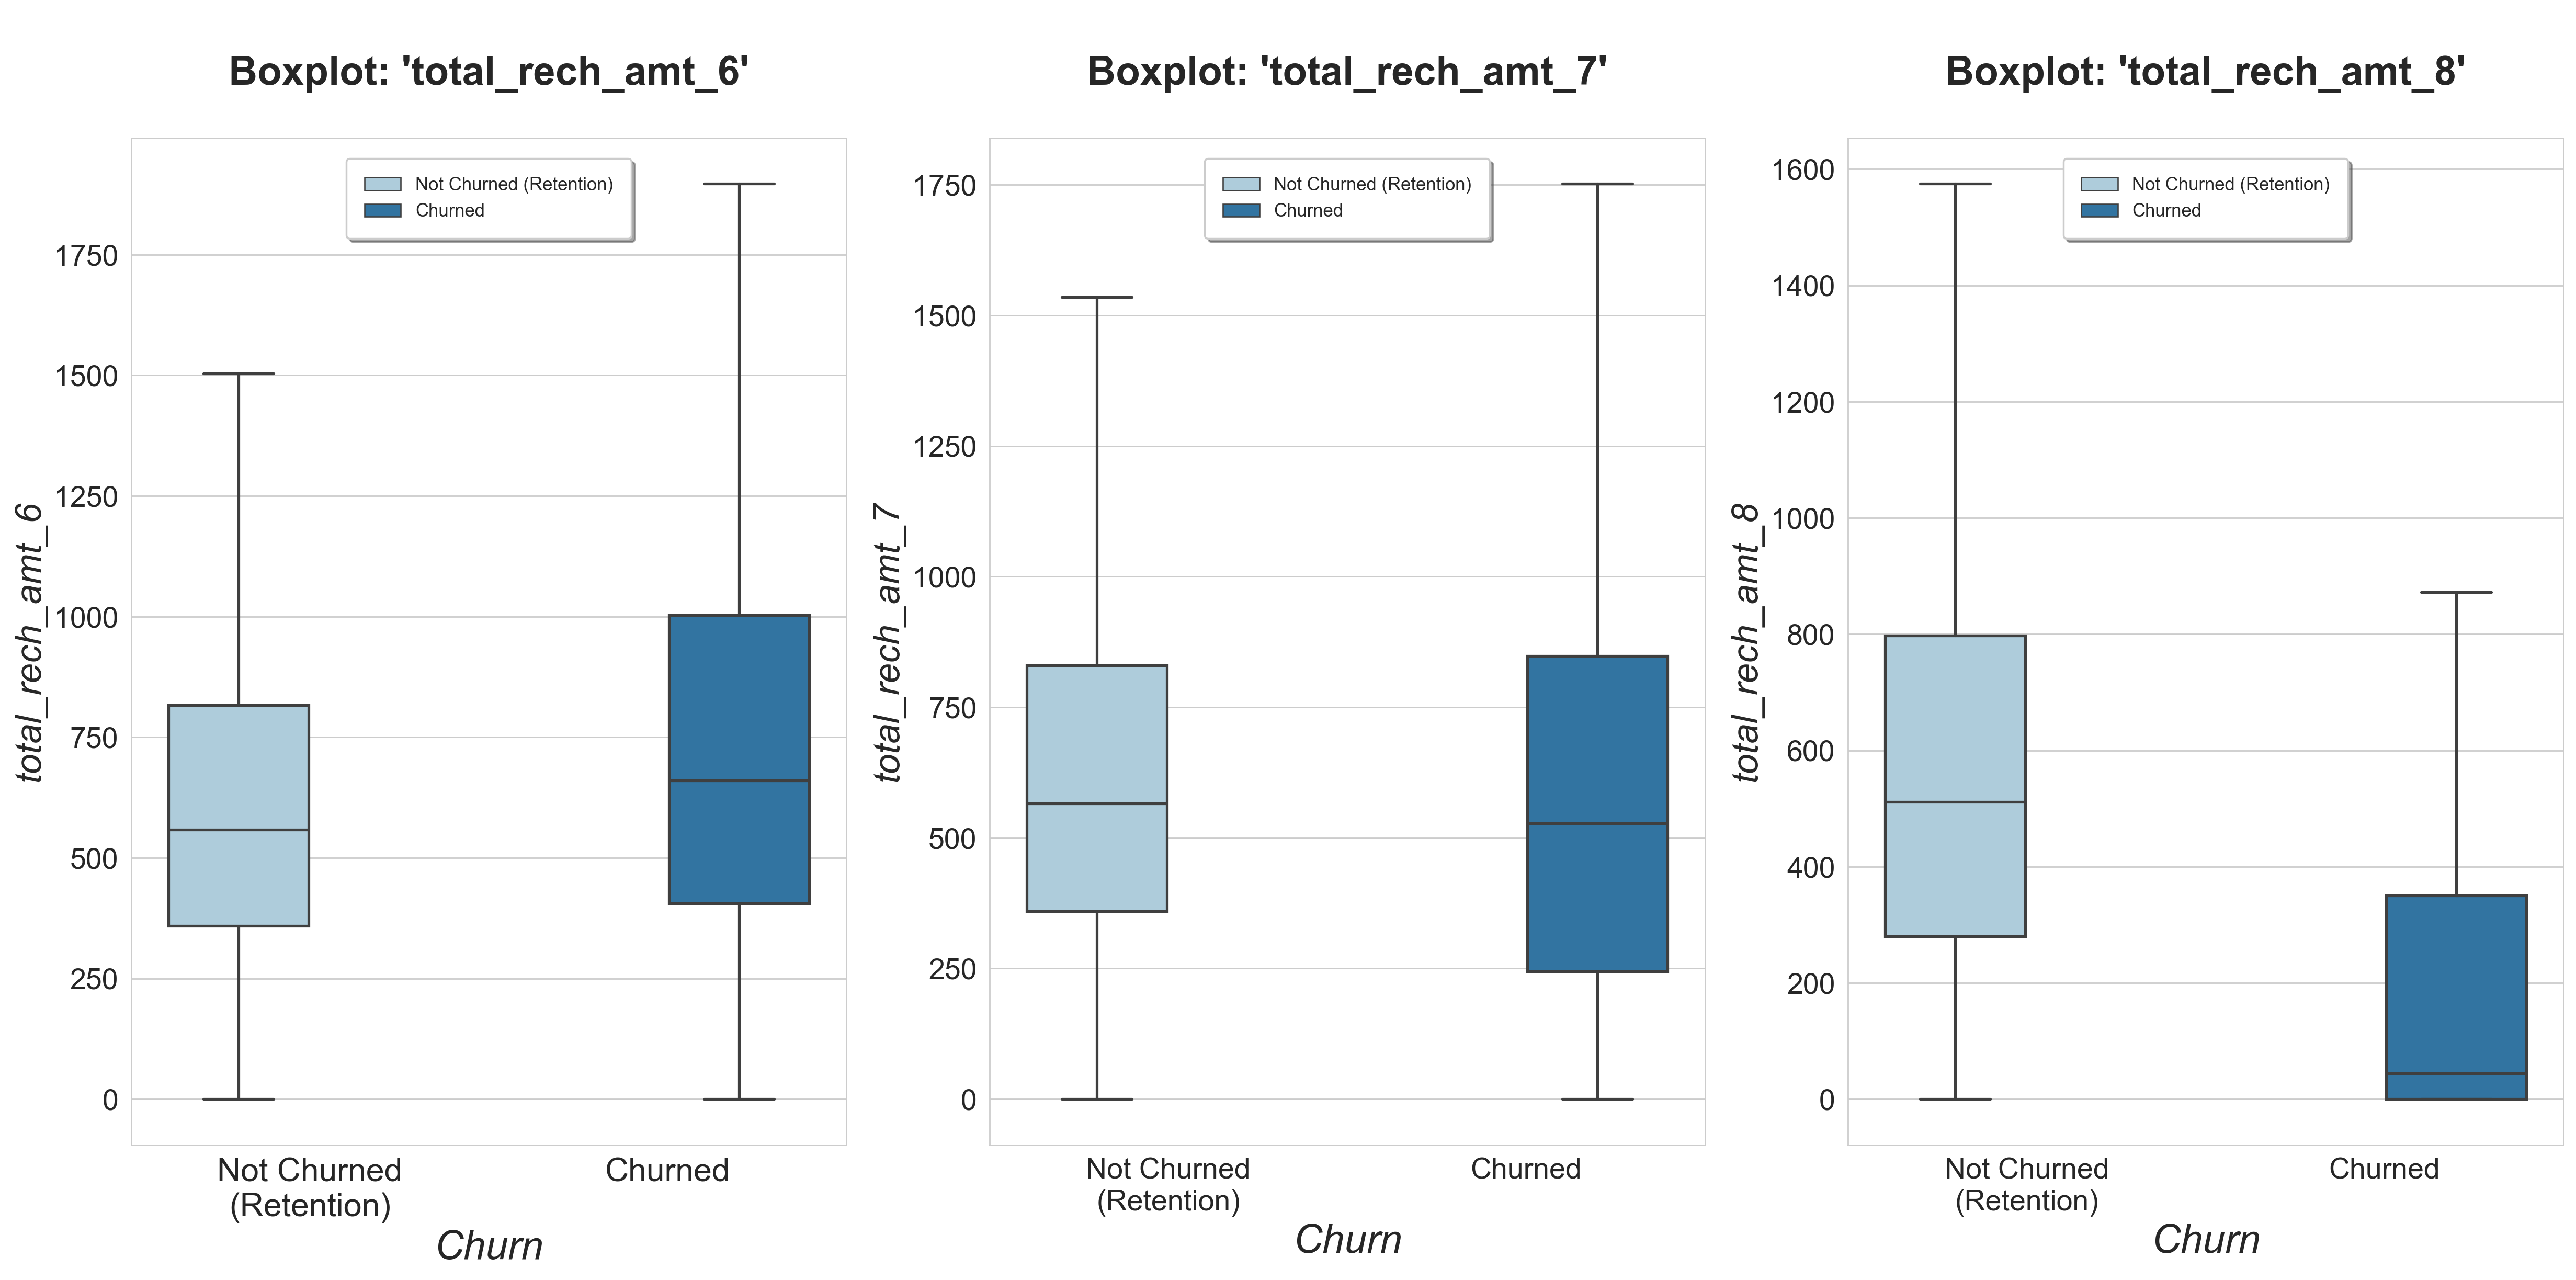

In [39]:
# Plot boxplots for 'total_rech_amt' (calling plan recharges) for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('total_rech_amt')


**Observation:**  We can see a drop in the `total recharge amount` for churned customers in the 8th Month (Action Phase).

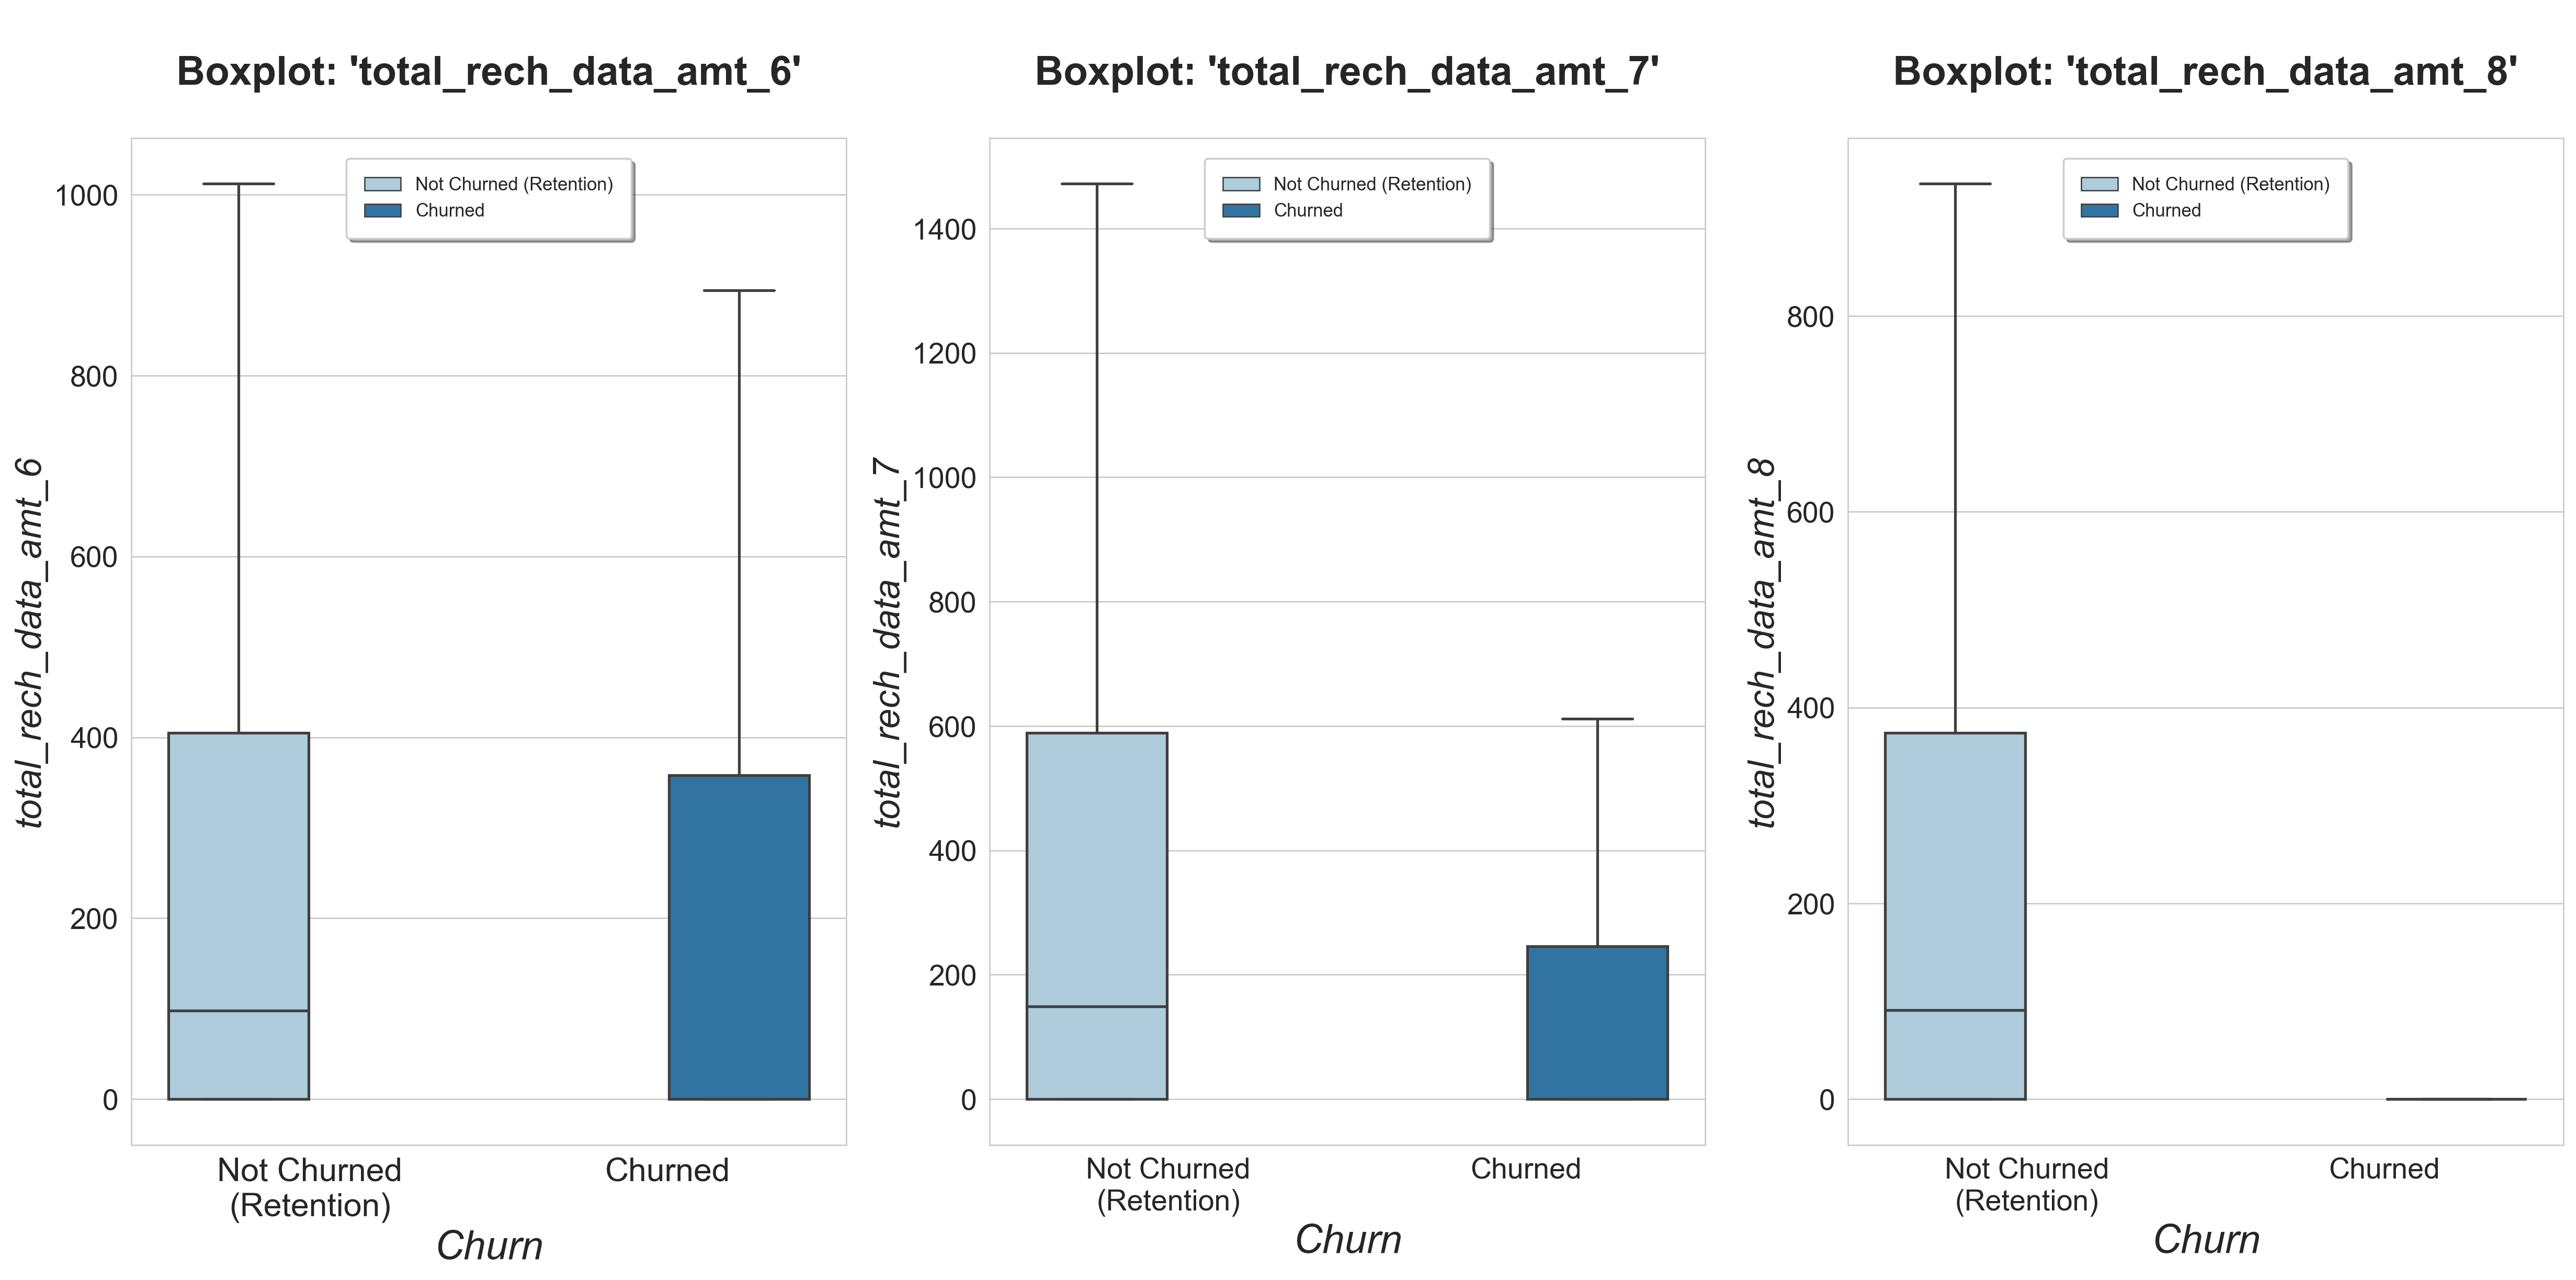

In [40]:
# Plot boxplots for 'total_rech_data_amt' (data plan recharges) for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('total_rech_data_amt')

**Observation:**  Again, a significant drop in the `total data recharge amount` is seen for churned customers in the 8th Month (Action Phase).

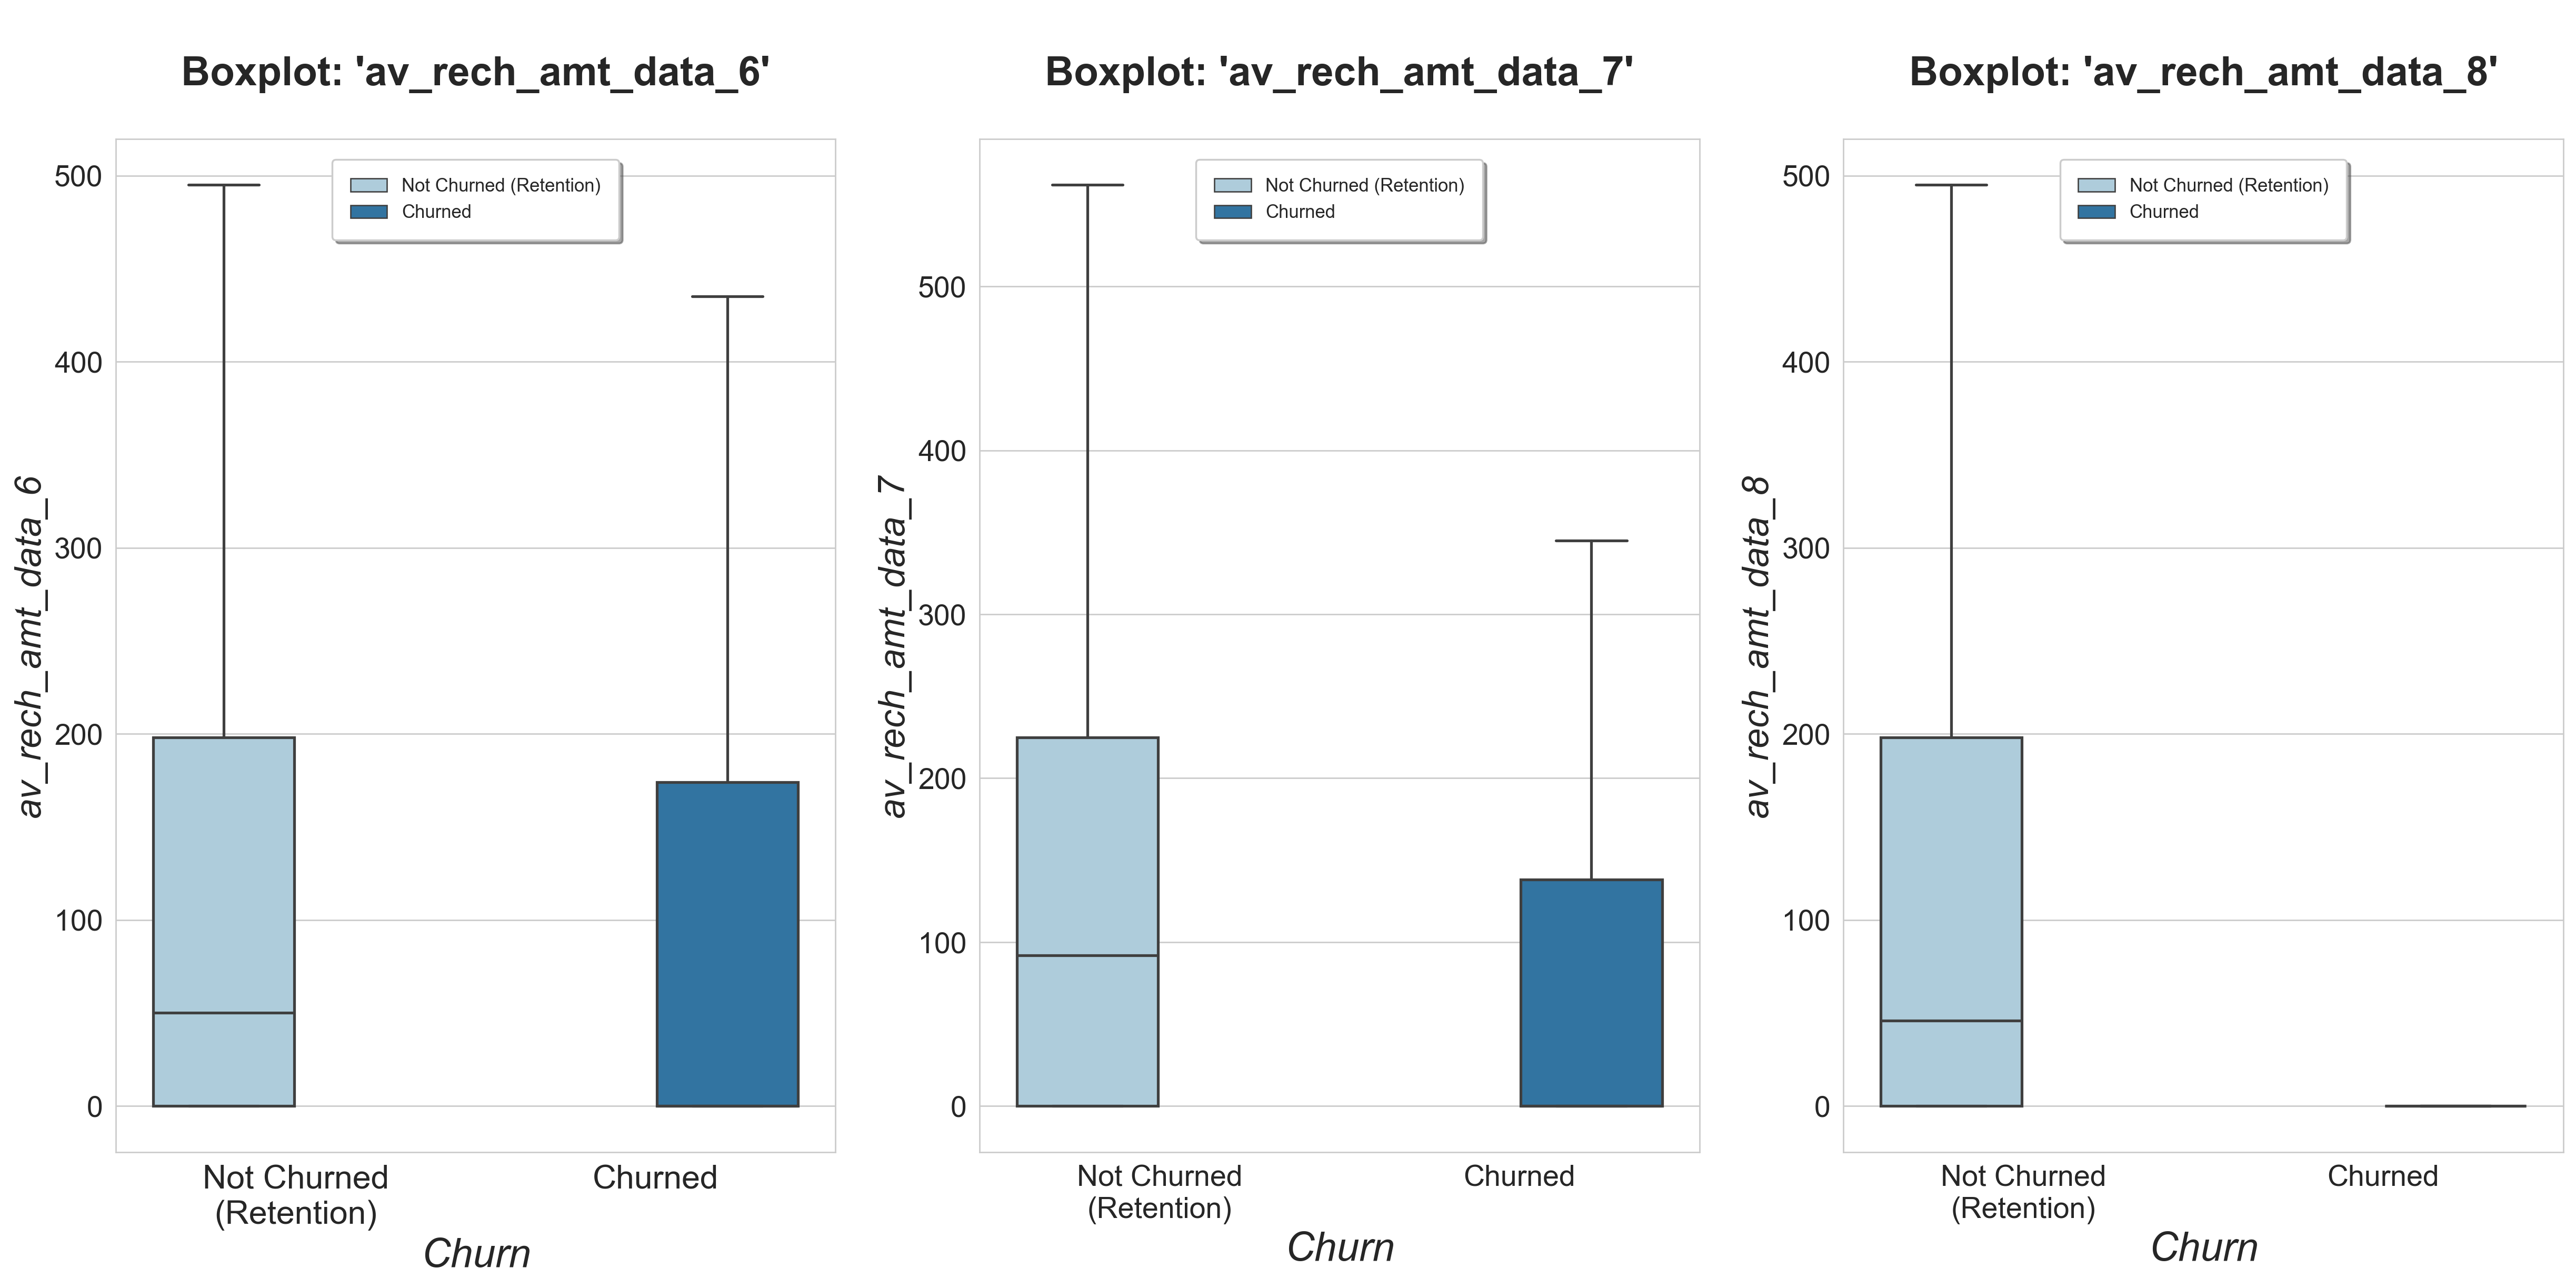

In [41]:
# Plot boxplots for 'av_rech_amt_data' (average recharge amount for data plans) for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('av_rech_amt_data')

**Observation:**  Again, a significant drop in the `average data recharge amount` is seen for churned customers in the 8th Month (Action Phase). Also, it makes sense as the total_rech_data_amt_* drops too.

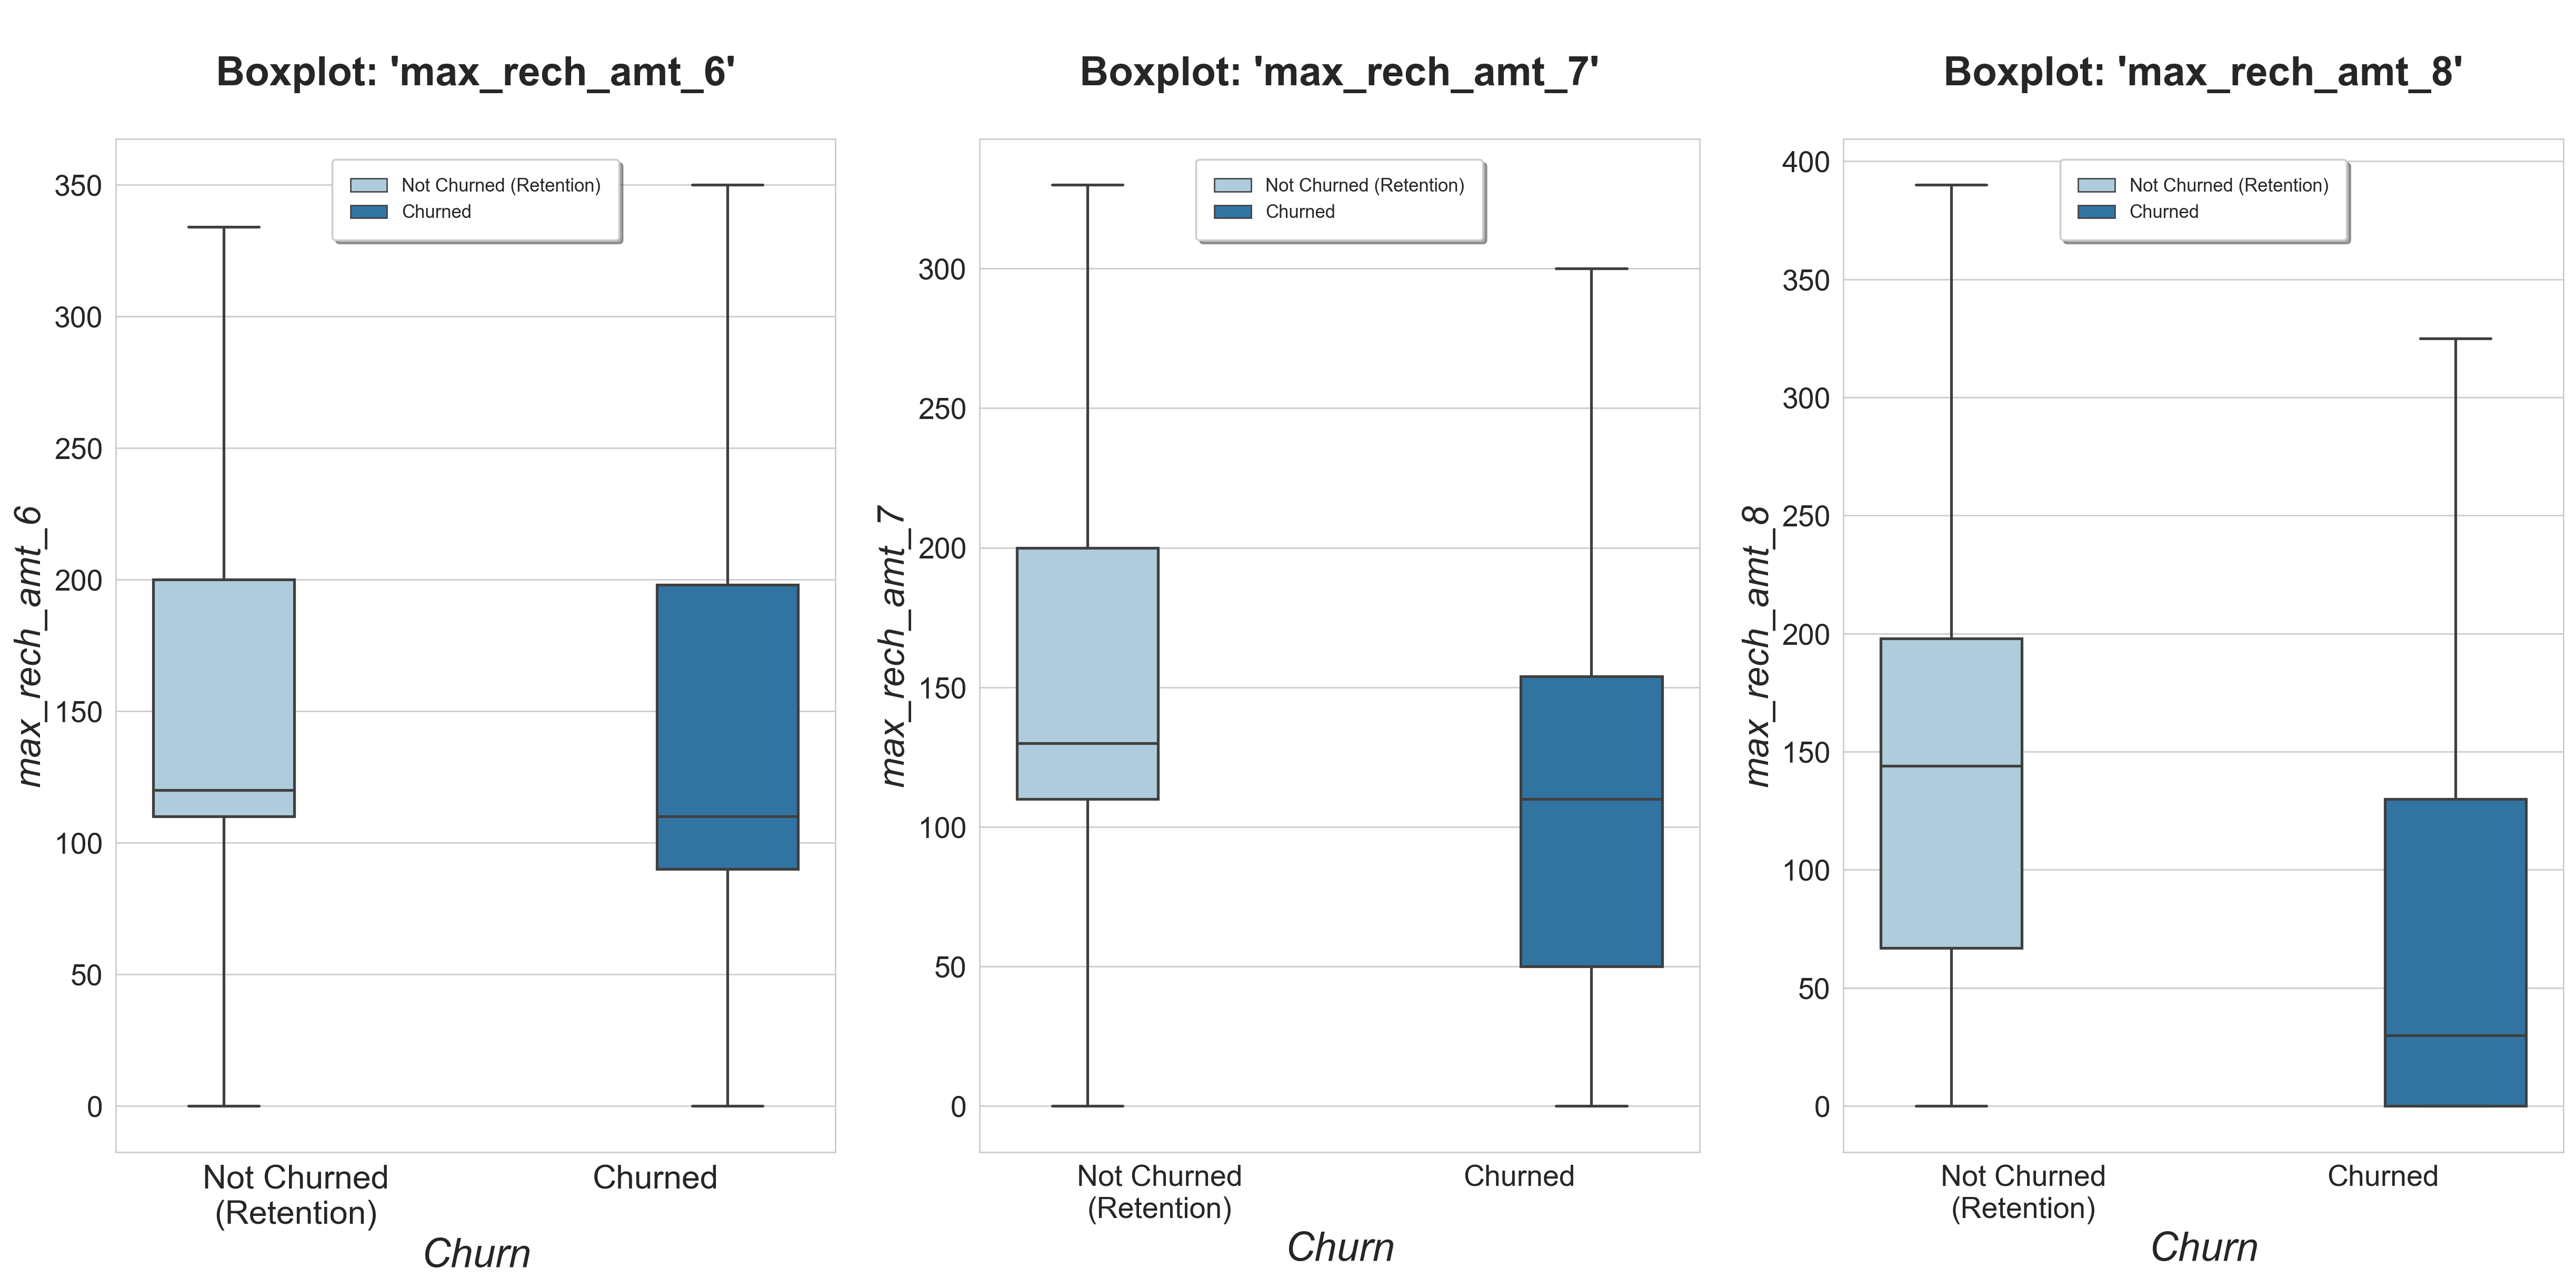

In [42]:
# Plot boxplots for 'max_rech_amt' (maximum recharge amount) for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('max_rech_amt')


**Observation:** A noticeable drop in the `maximum recharge amount` is seen in the 8th month (action phase) for churned customers.

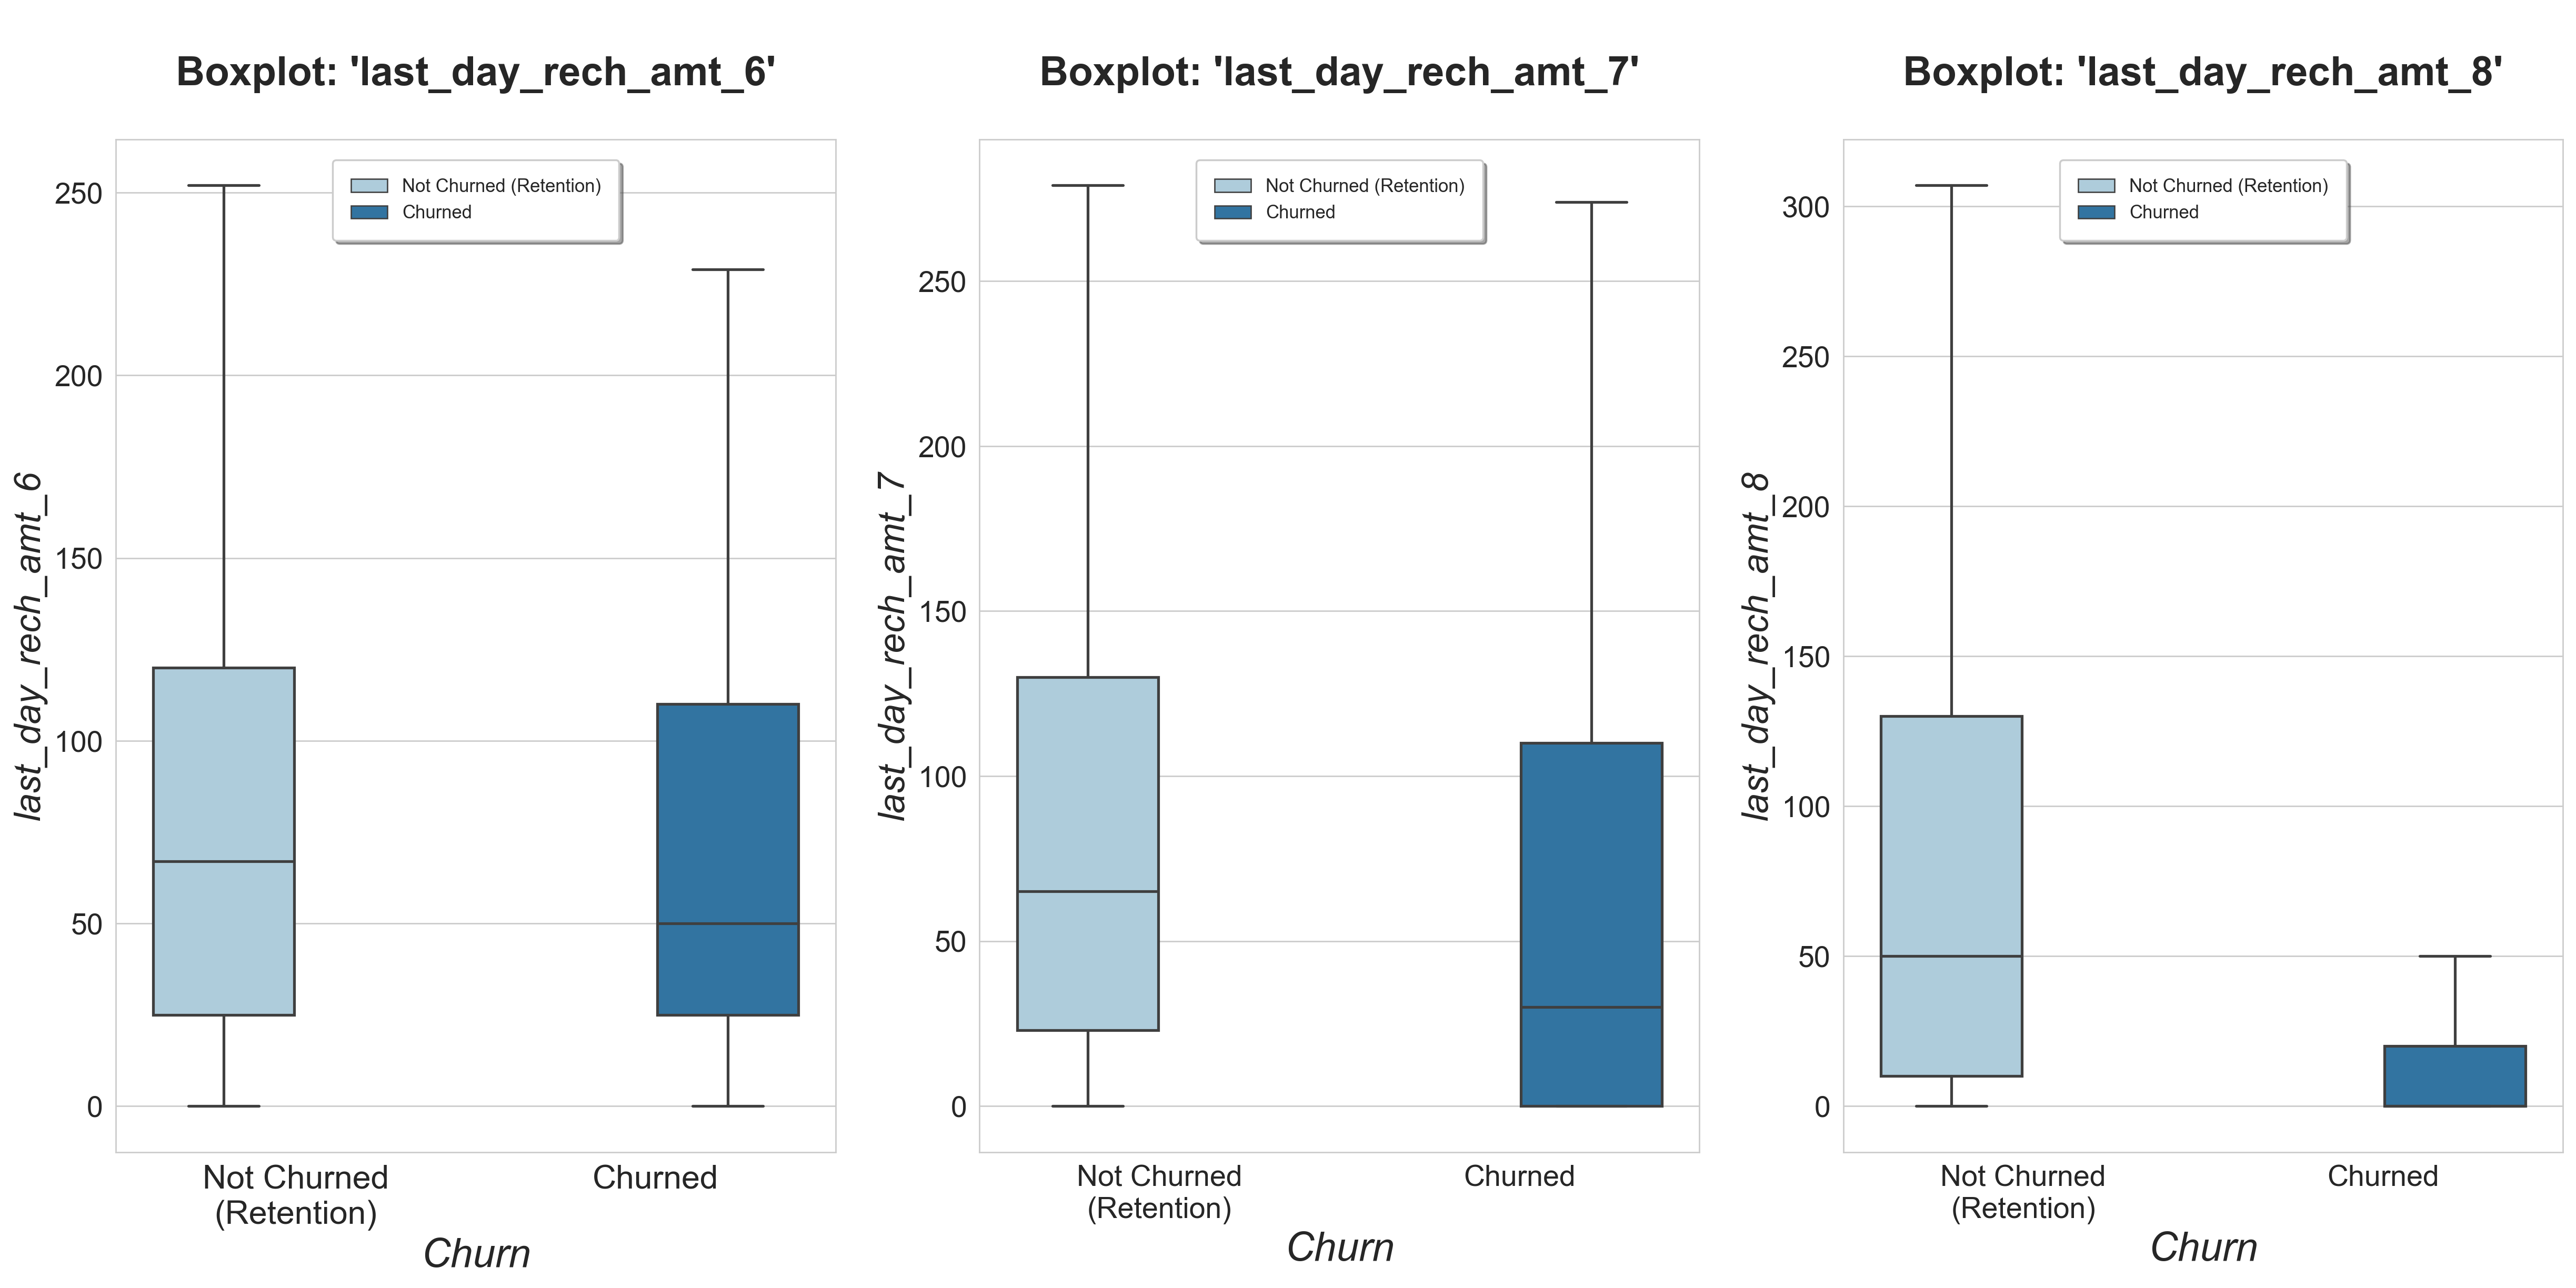

In [43]:
# Plot boxplots for 'last_day_rech_amt' (recharge amount on the last day) for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('last_day_rech_amt')

**Observation:** We do see a noteworthy drop in the `last day recharge amount` in the 8th month (action phase) for churned customers.

In [44]:
# List columns related to 'rech_num' (recharge numbers) and 'max_rech_data' (maximum data recharge) variables
other_rech = telecom_hv.columns[telecom_hv.columns.str.contains('rech_num|max_rech_data', regex=True)]
other_rech

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [45]:
# Check for missing values in 'total_rech_num' and 'max_rech_data' features
other_rech_df = telecom_hv[other_rech]
null_prcnt_df(other_rech_df)

`'total_rech_num'` feature has no missing values whereas `'max_rech_data'` feature still has missing values, around 43-46% for all the 3 months. Let's check the range of values for these features.

In [46]:
# Display summary statistics for 'max_rech_data' features for months 6, 7, and 8
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16740.000000     17038.000000     15935.000000
mean        139.804002       140.444712       136.353373
std         118.892926       120.295284       119.571138
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

**Observation:** We see that the minimum value is 1, median is 152 (for all) and also the maximum value is 1555 across all 3 months which indicate that the missing values imply no recharges. Thus, imputing the missing values for such records with 0; meaning no recharges of data plans for the respective missing records.

In [47]:
# Impute 'max_rech_data_*' columns with 0 for months 6, 7, and 8
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_hv[['max_rech_data_6','max_rech_data_7', 'max_rech_data_8']].replace(np.nan, 0)

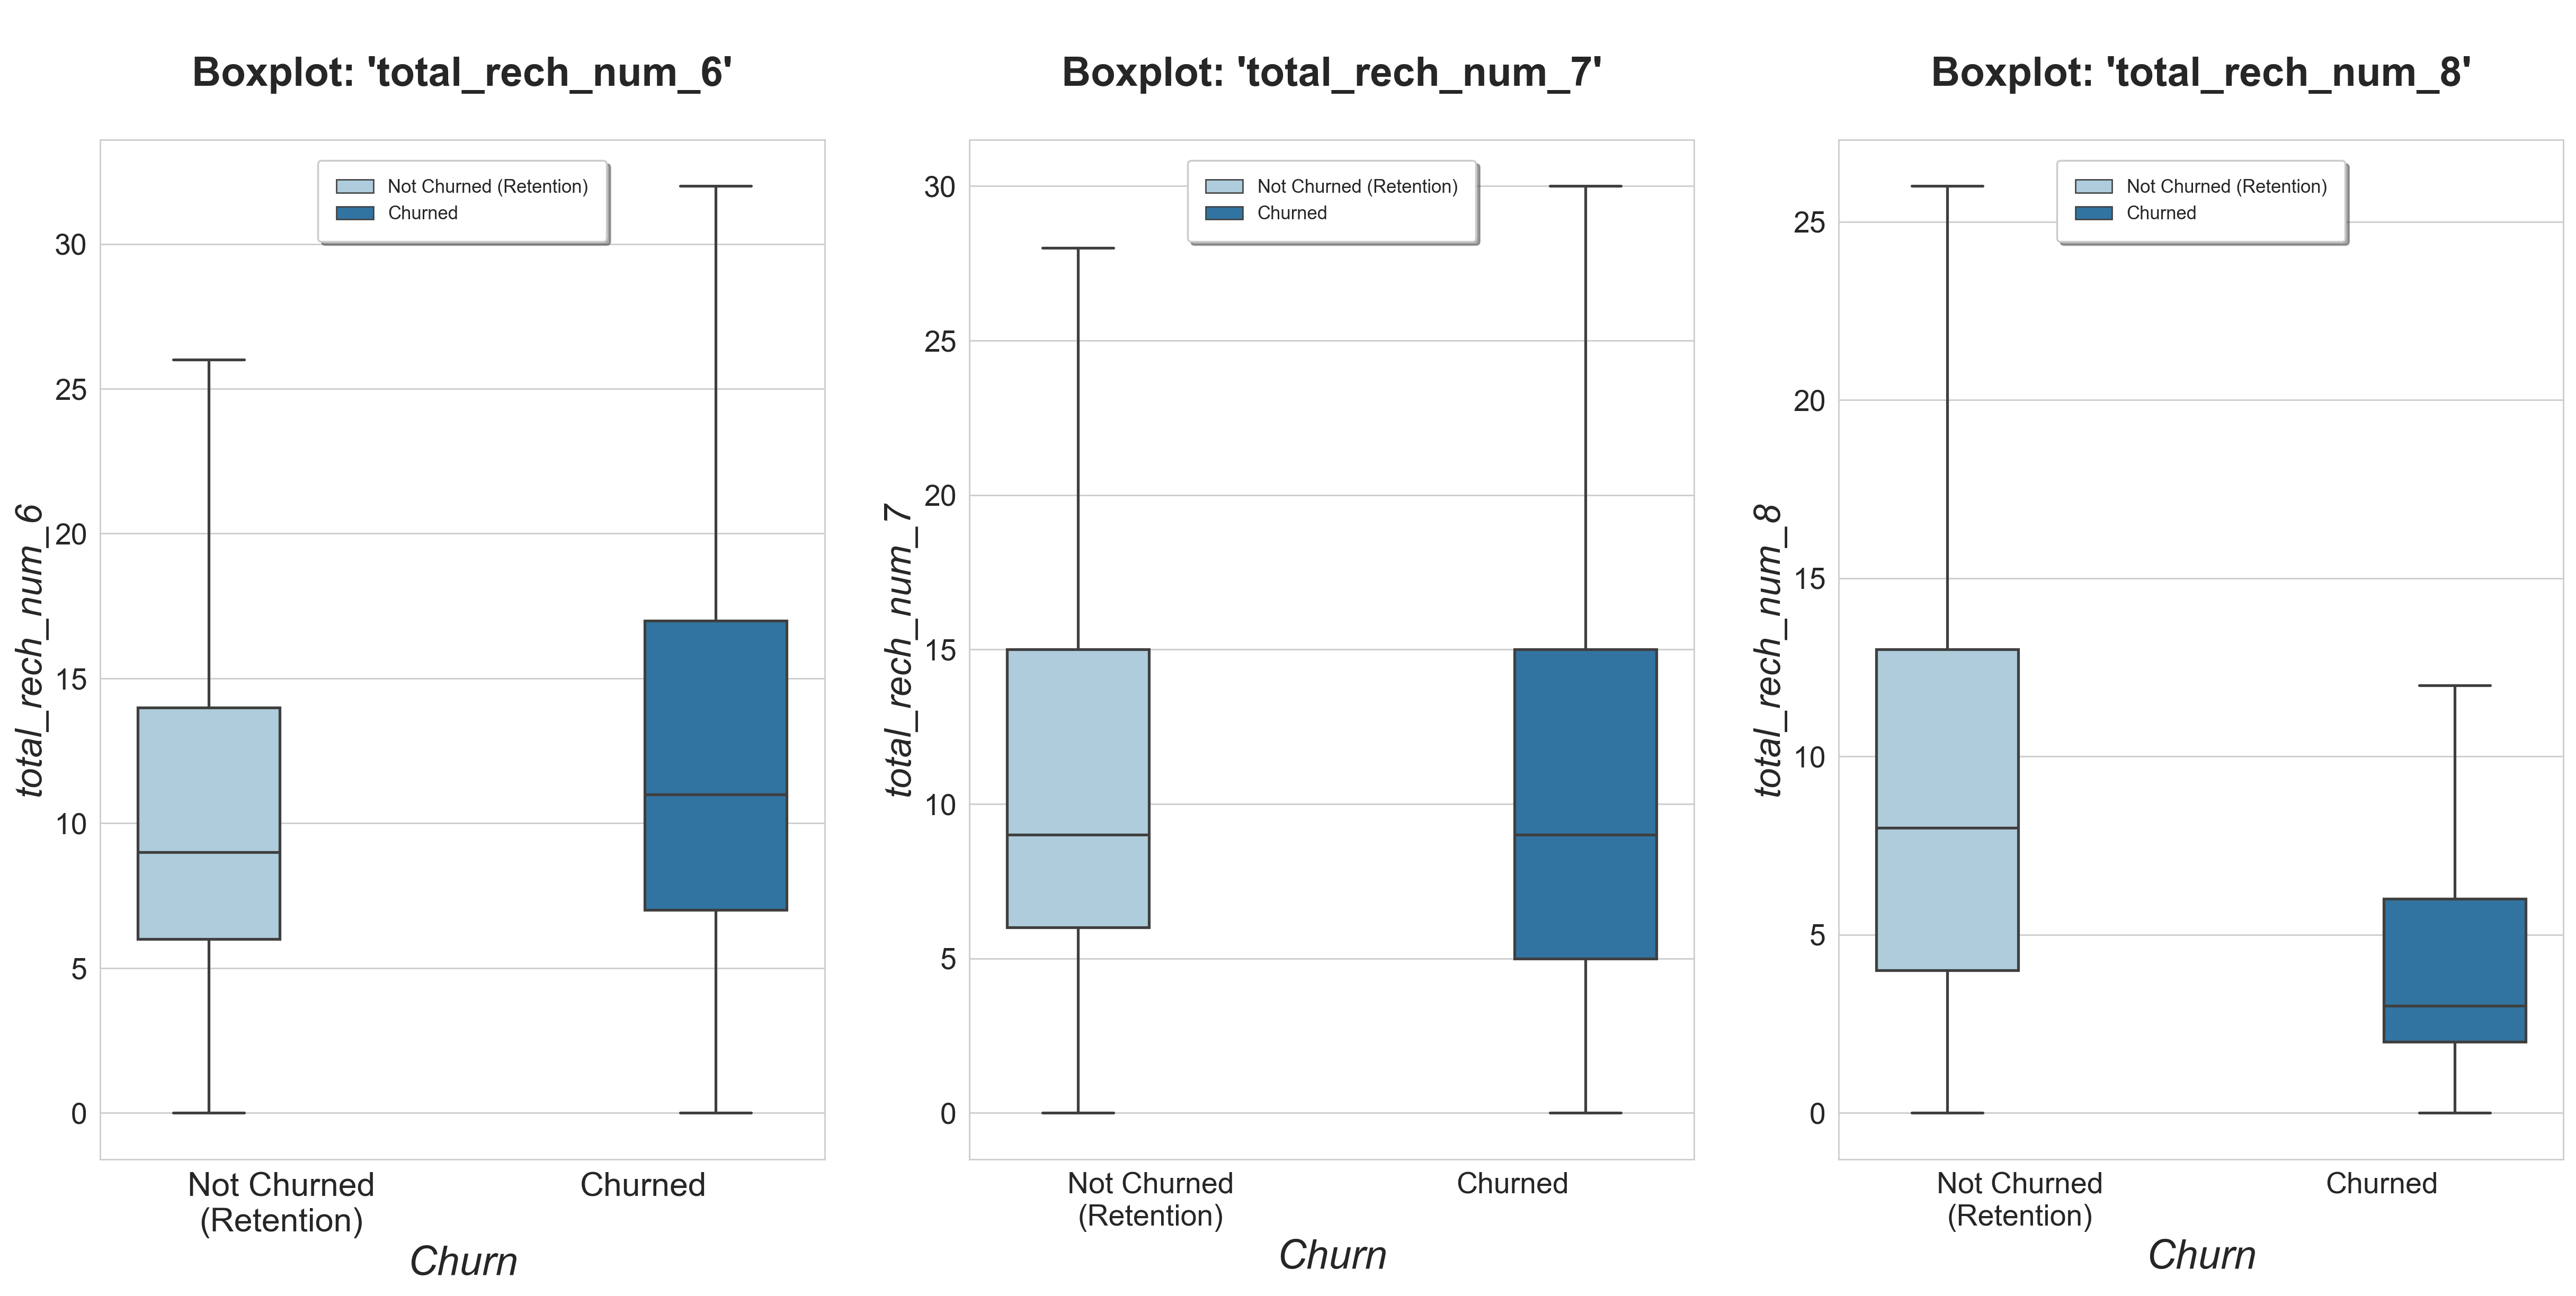

In [48]:
# Plot boxplots for 'total_rech_num' (total number of recharges) for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('total_rech_num')

**Observation:** A noticeable drop in the `total number of recharges` is seen in the 8th month (action phase) for churned customers.

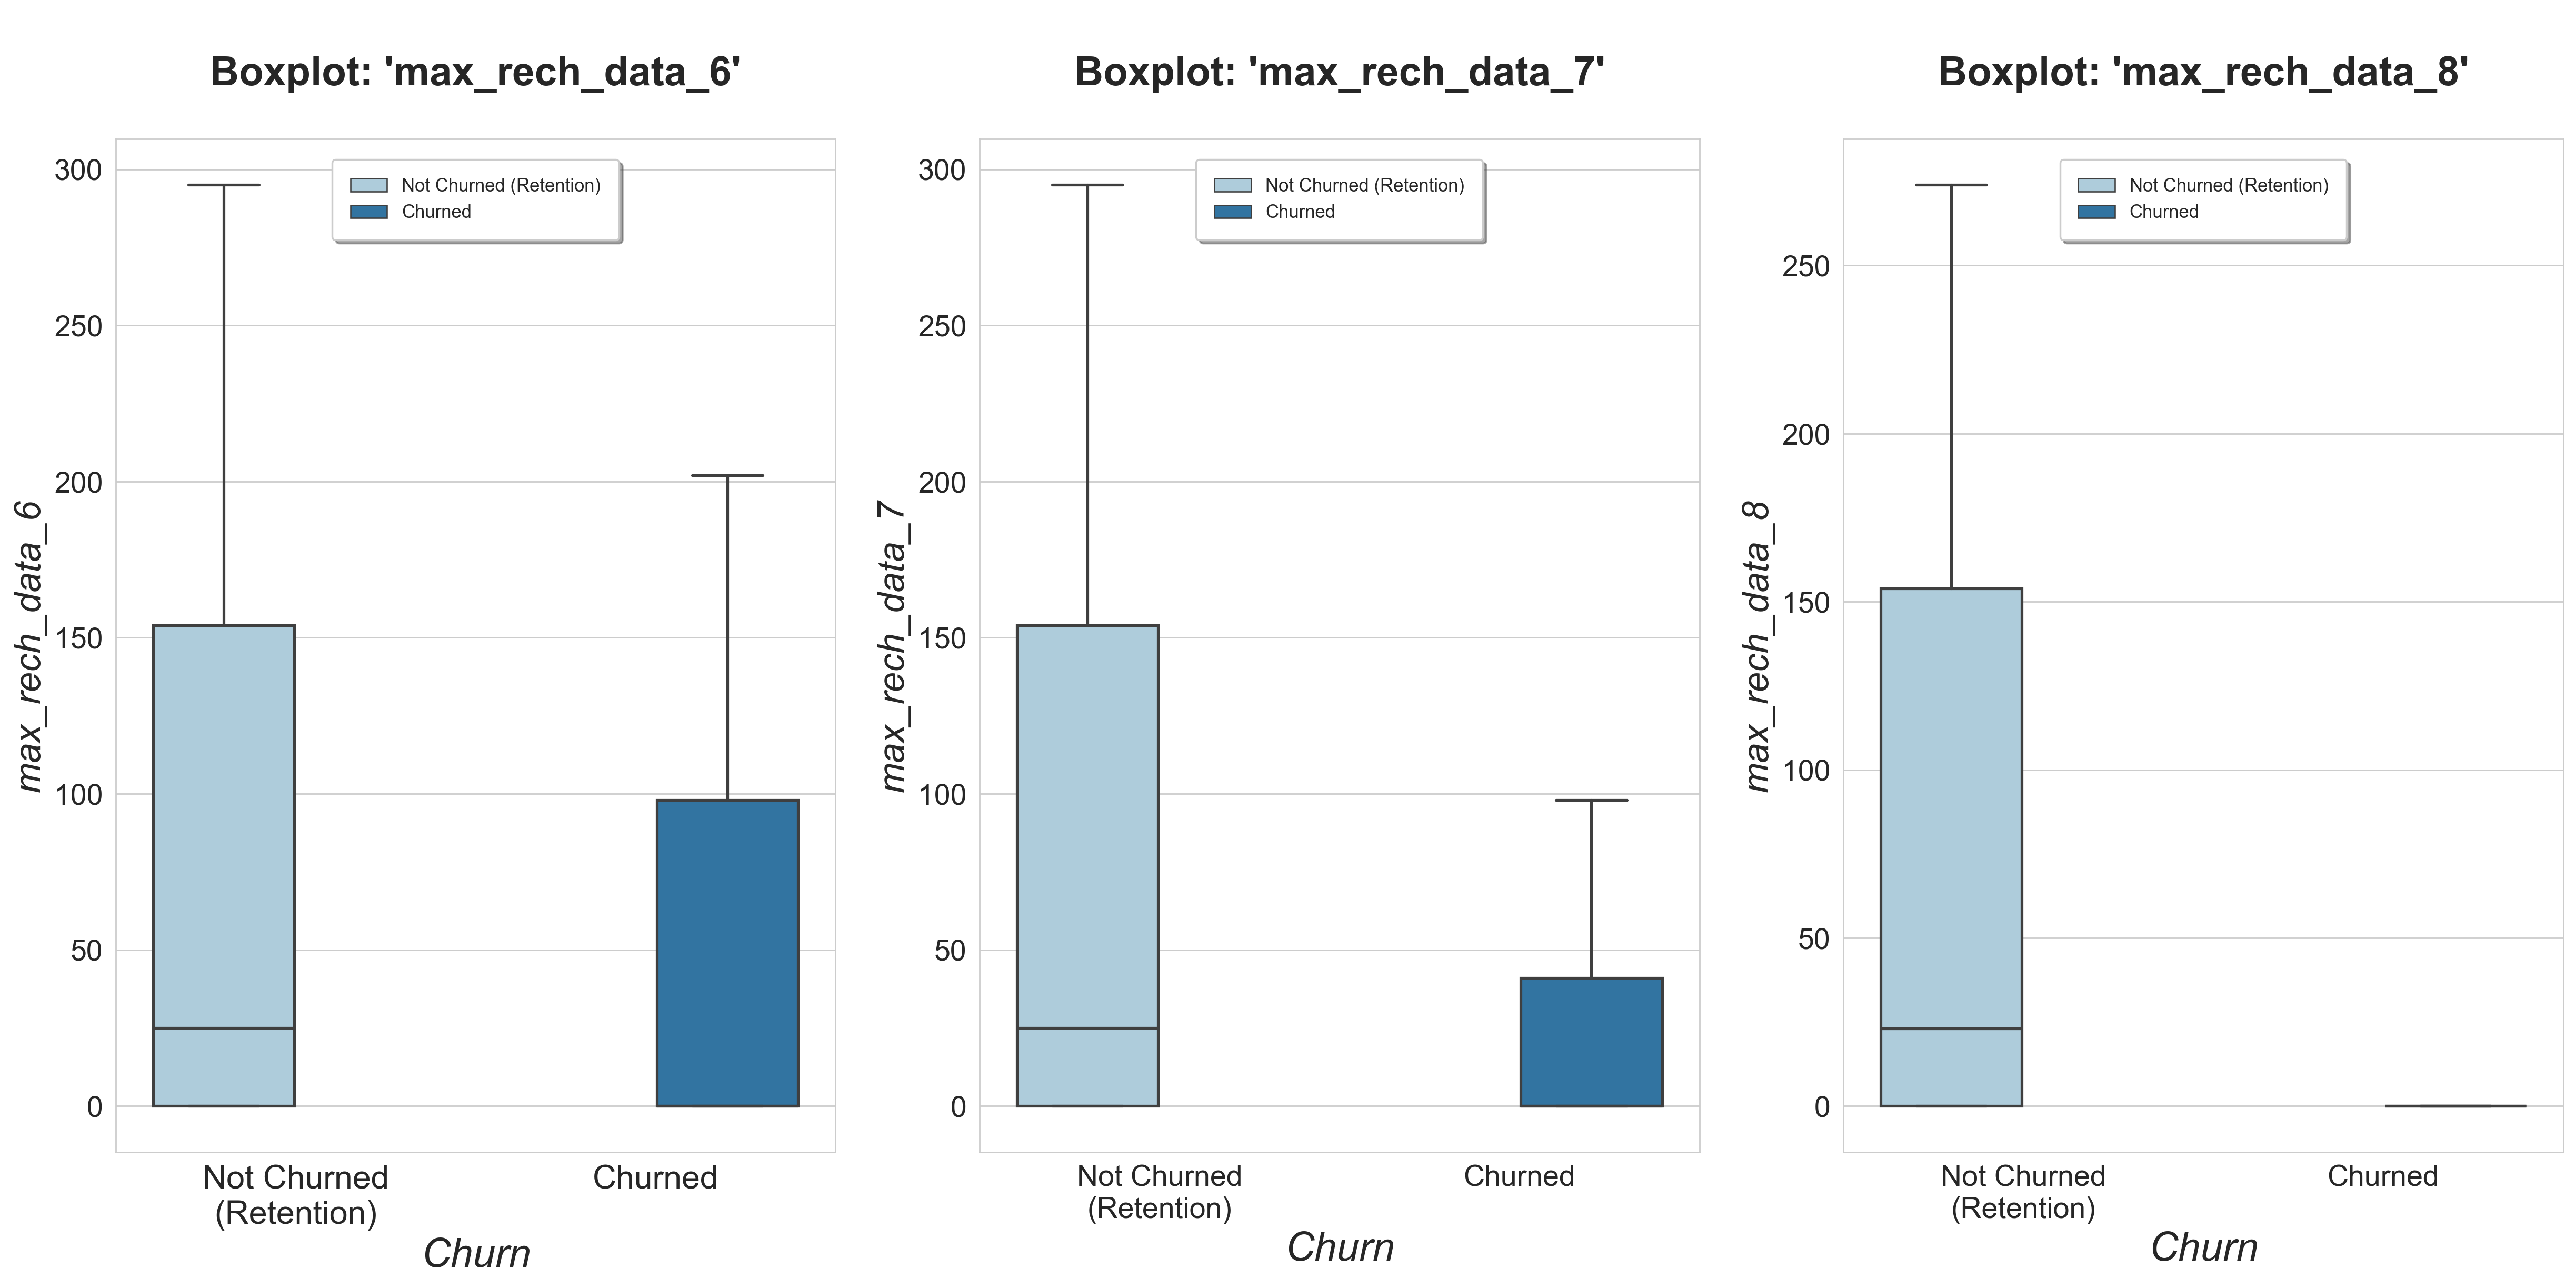

In [49]:
# Plot boxplots for 'max_rech_data' (maximum data recharge amount) for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('max_rech_data')


**Observation:** A significant drop in the `max_rech_data` is seen in the 8th month (action phase) for churned customers.

In [50]:
# Recheck for missing values in 'recharge' plans for calling and data features
# (Includes features related to recharge amounts, data amounts, recharge numbers, and maximum recharge data, excluding 2G/3G)
all_rech_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt|rech_num|max_rech_data')])
all_rech = telecom_hv[all_rech_vars]
null_prcnt_df(all_rech)

**(b) Visualizing 2G and 3G based usage attributes**

In [51]:
# List columns related to 2G and 3G usage
usage_2g_3g_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('2g|3g', regex=True)])
usage_2g_3g_vars

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [52]:
# Check for missing values in 2G and 3G usage features
usage_2g_3g = telecom_hv[usage_2g_3g_vars]
null_prcnt_df(usage_2g_3g)

**Observations:** More than 40% missing values exist in `'arpu_2g', 'arpu_3g', 'count_rech_2g' and 'count_rech_3g'` features for all the 3 months. These are revenue based features counting towards 2G and 3G. Moreover, there are more than 46% missing values. Hence, we drop these columns .

In [53]:
# Drop features related to 2G and 3G revenue and recharge counts (e.g., 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g')
drop_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('arpu_2g|arpu_3g|count_rech_2g_|count_rech_3g')])
telecom_hv.drop(drop_vars, axis=1, inplace=True)

Now there are no more missing values associated with the 2G and 3G usage-based features

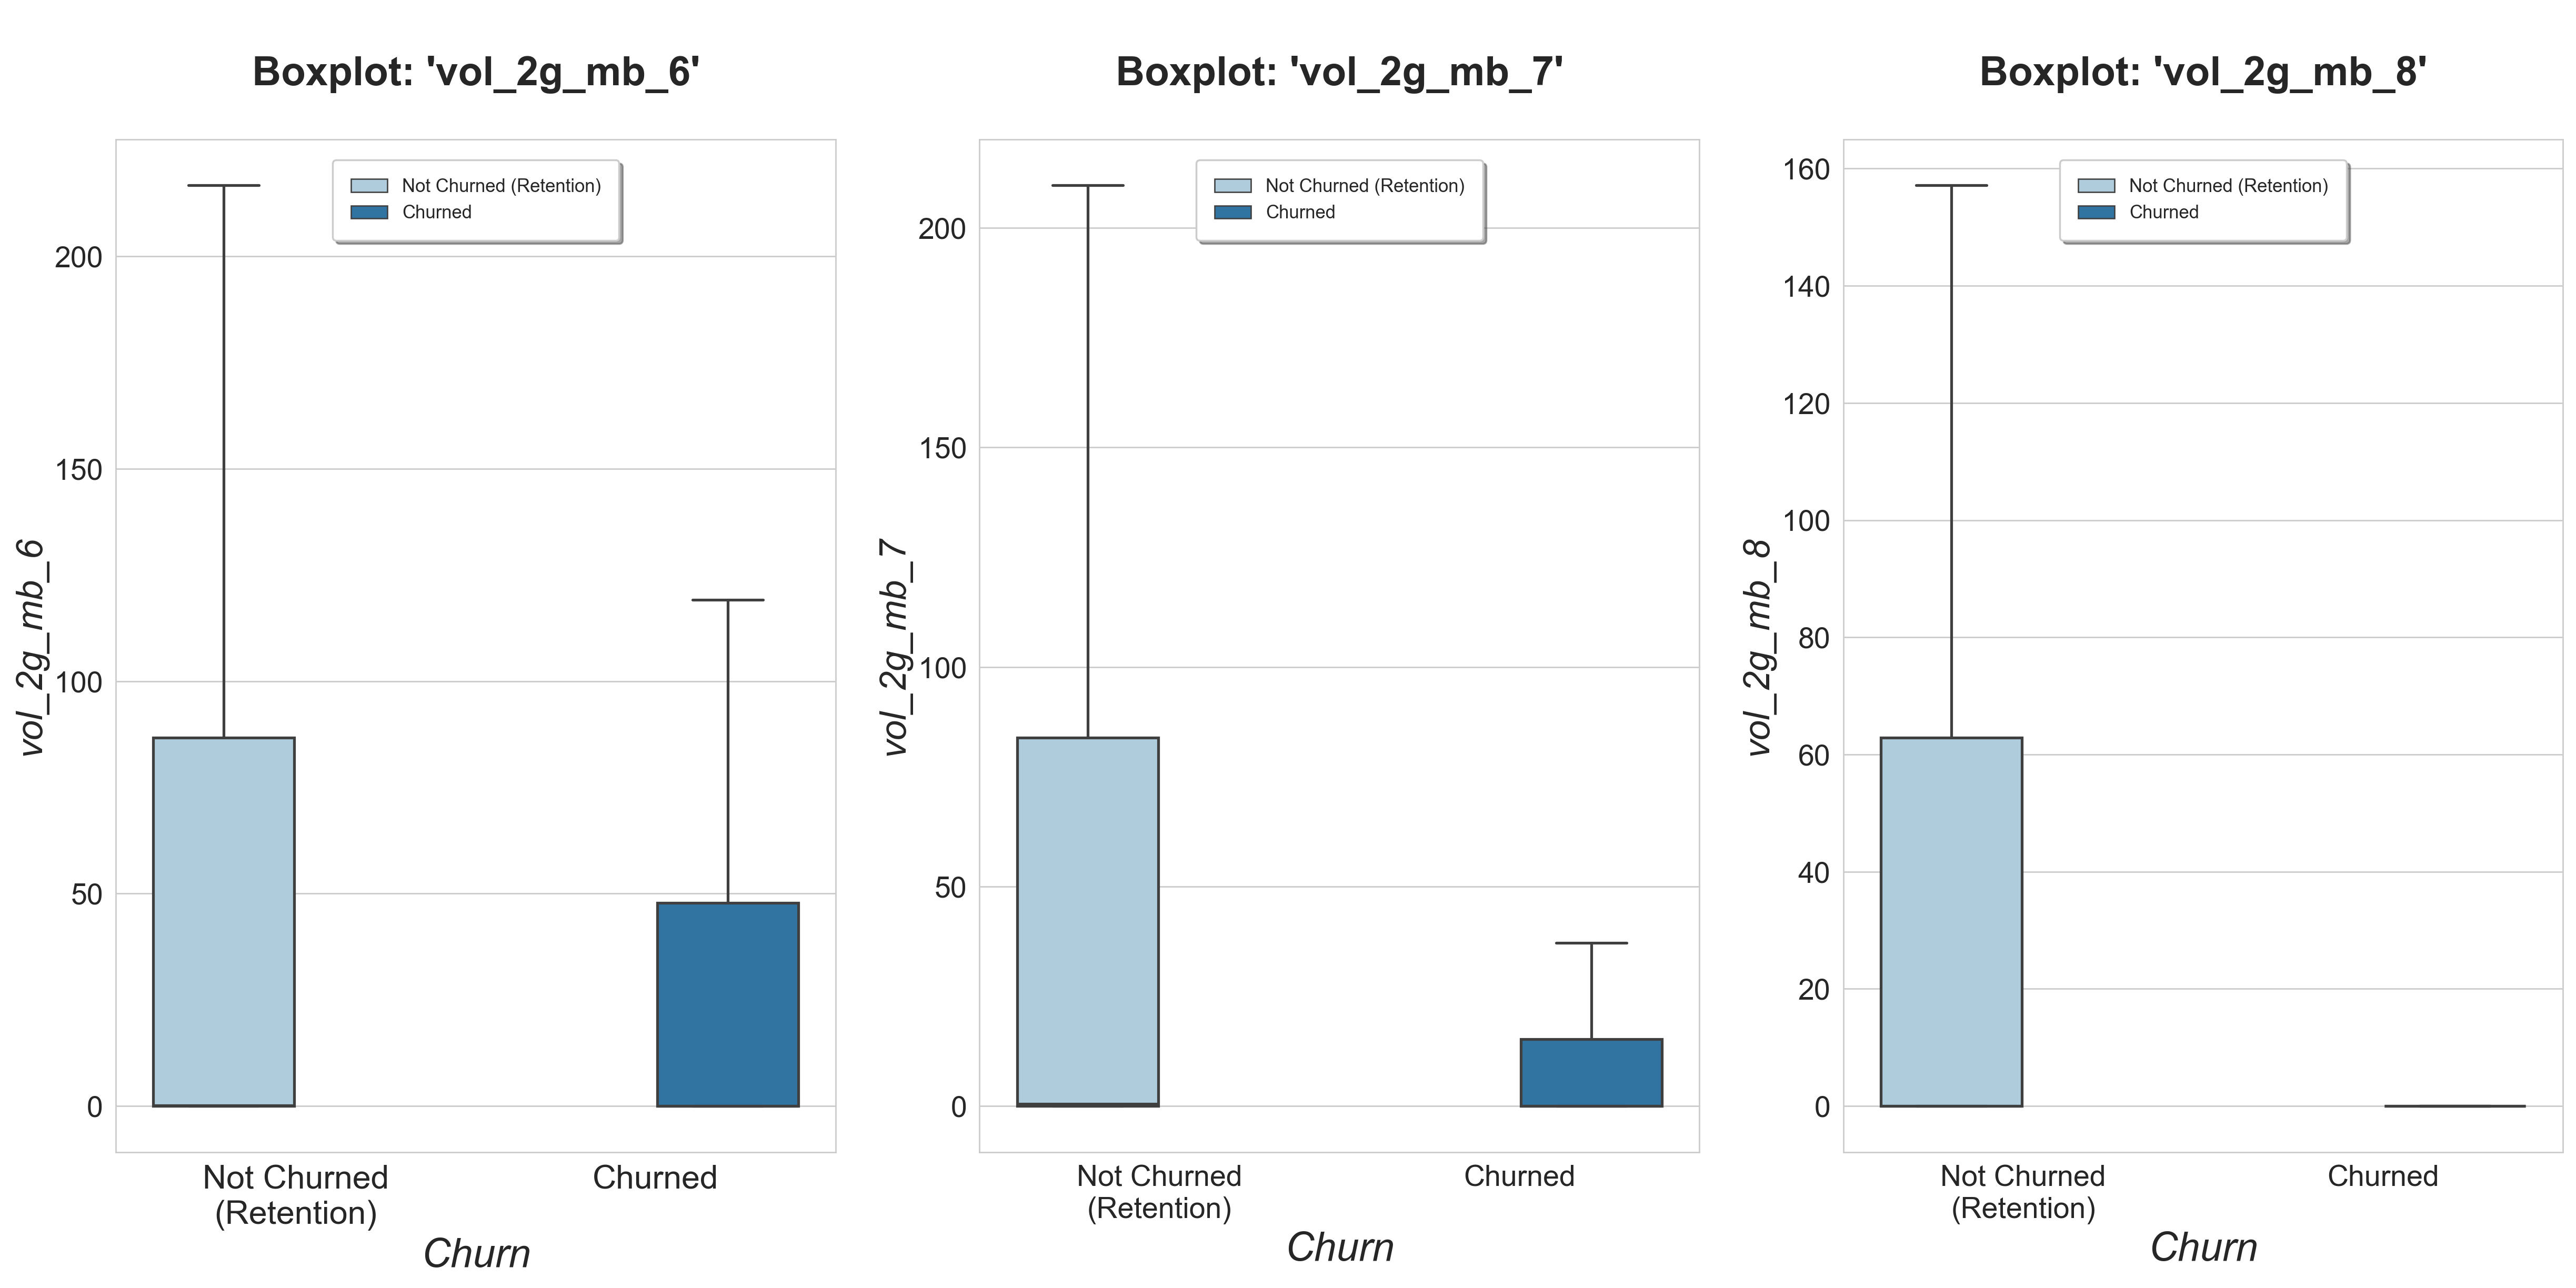

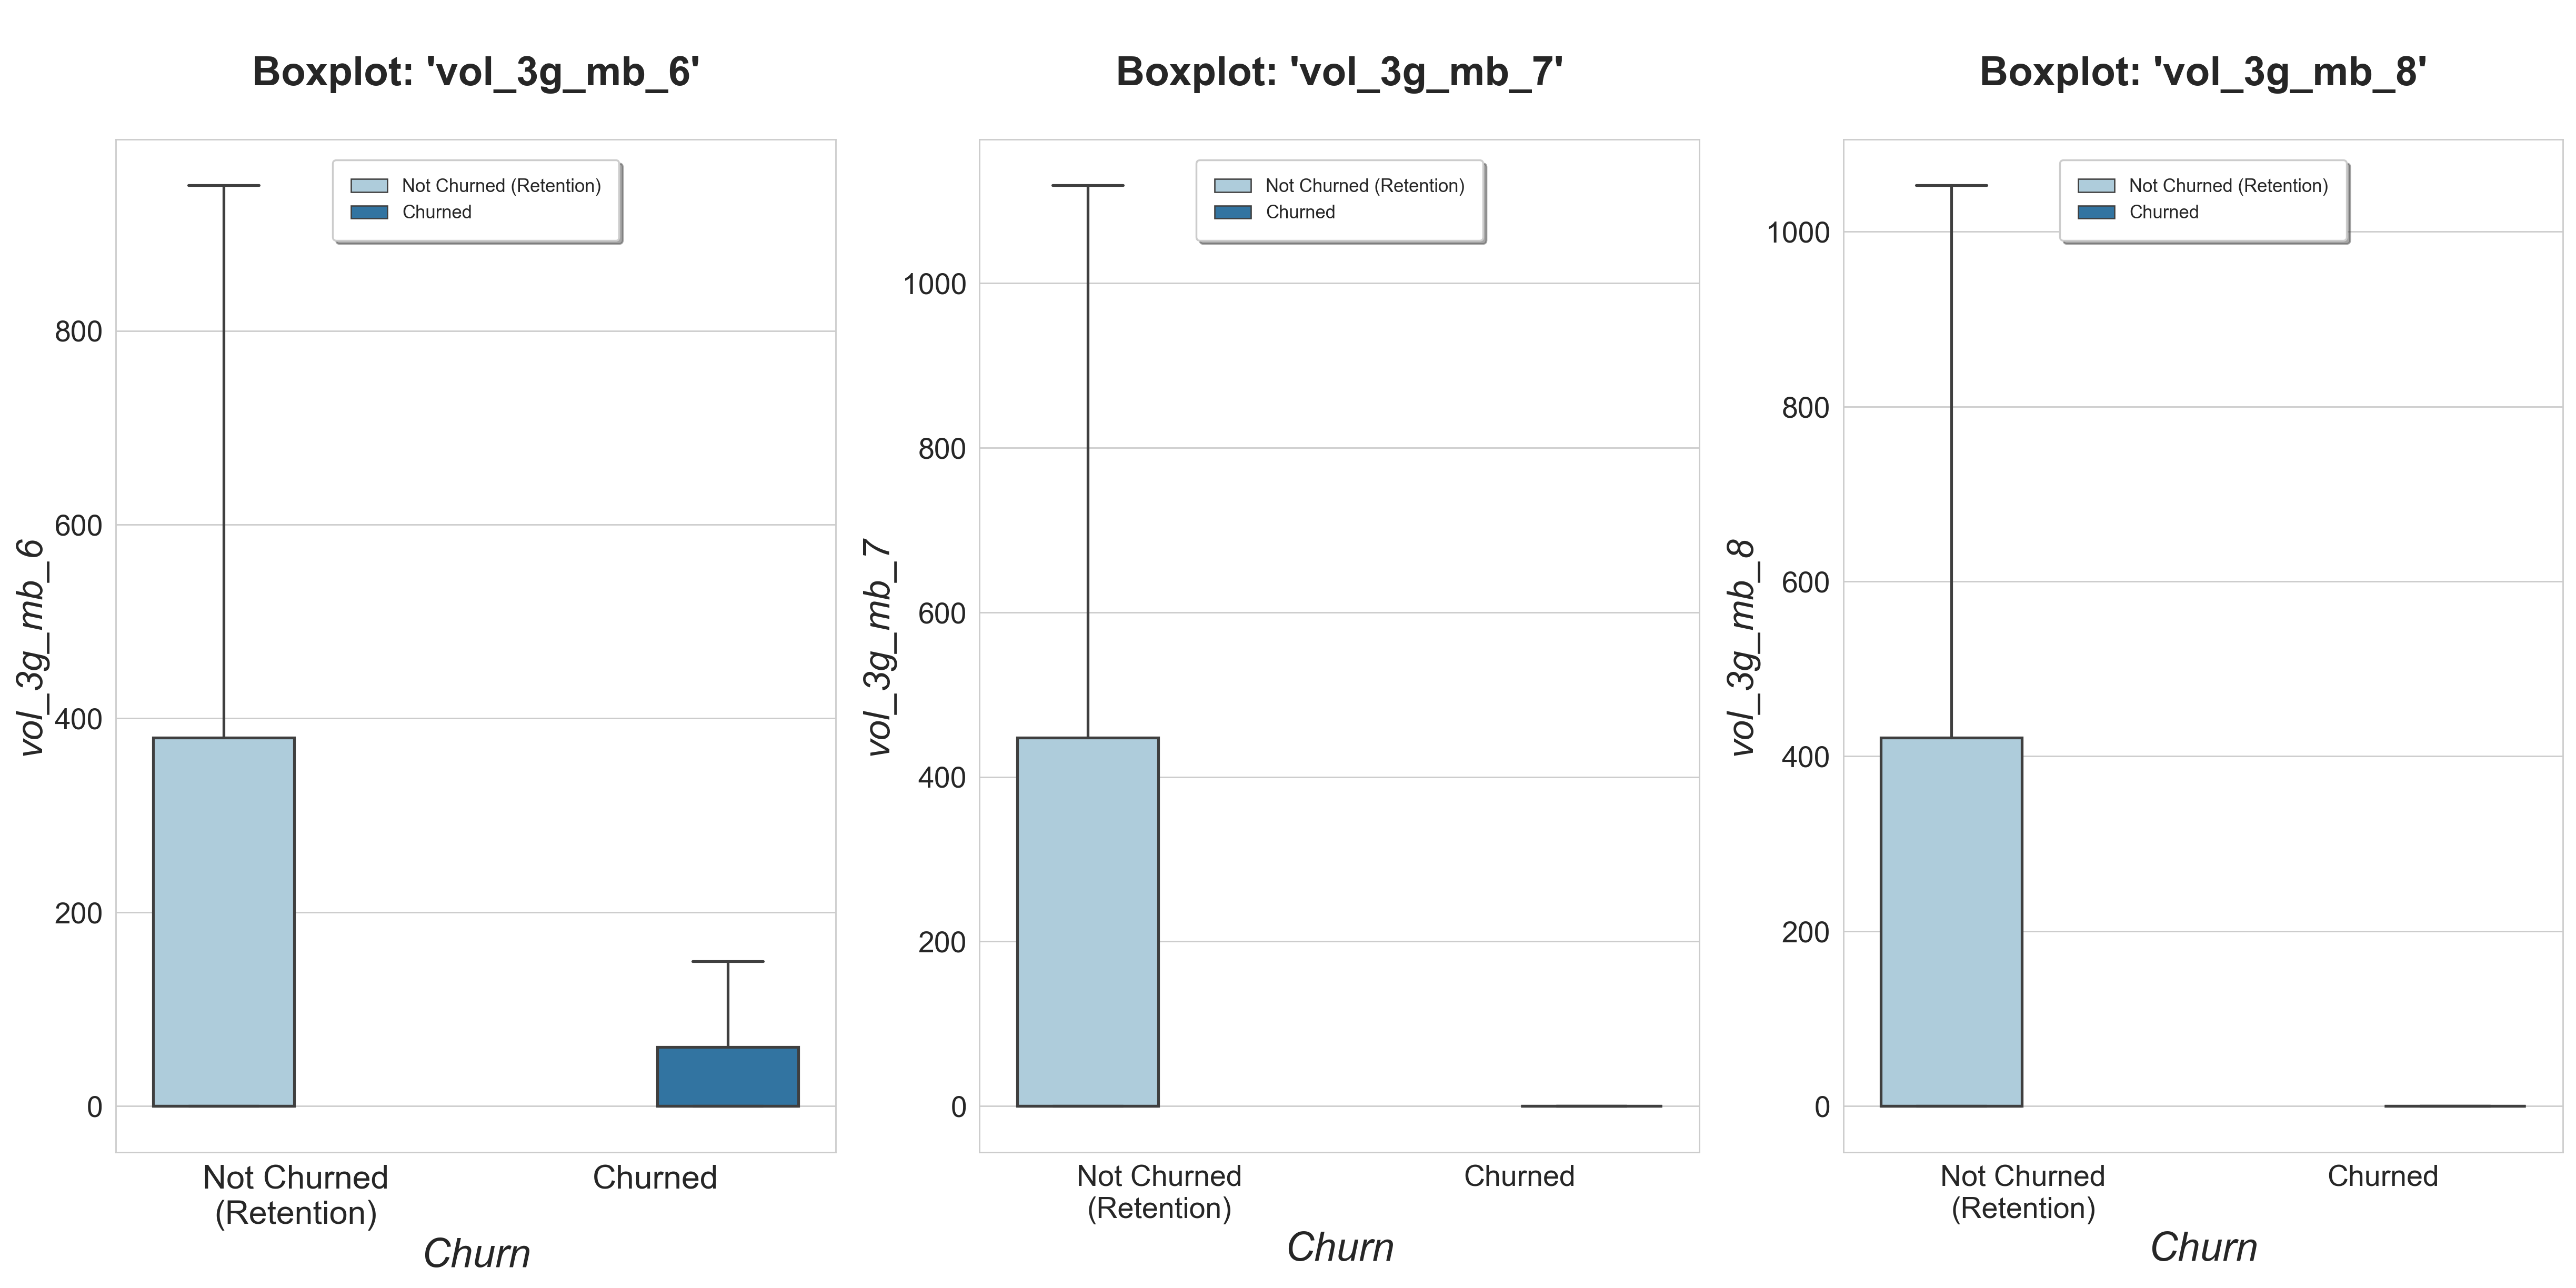

In [54]:
# Plot boxplots for volume of 2G data usage features for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('vol_2g_mb')

# Plot boxplots for volume of 3G data usage features for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('vol_3g_mb')

**Observations:**<br>(i) The `volume of 2G and 3G data usage` substantially drops in the 8th month(action phase) for churned customers.<br>(ii) Also, we see the `usage of 3G data` is comparatively `lesser than that of 2G data`, though the drop seems to follow similar pattern. 

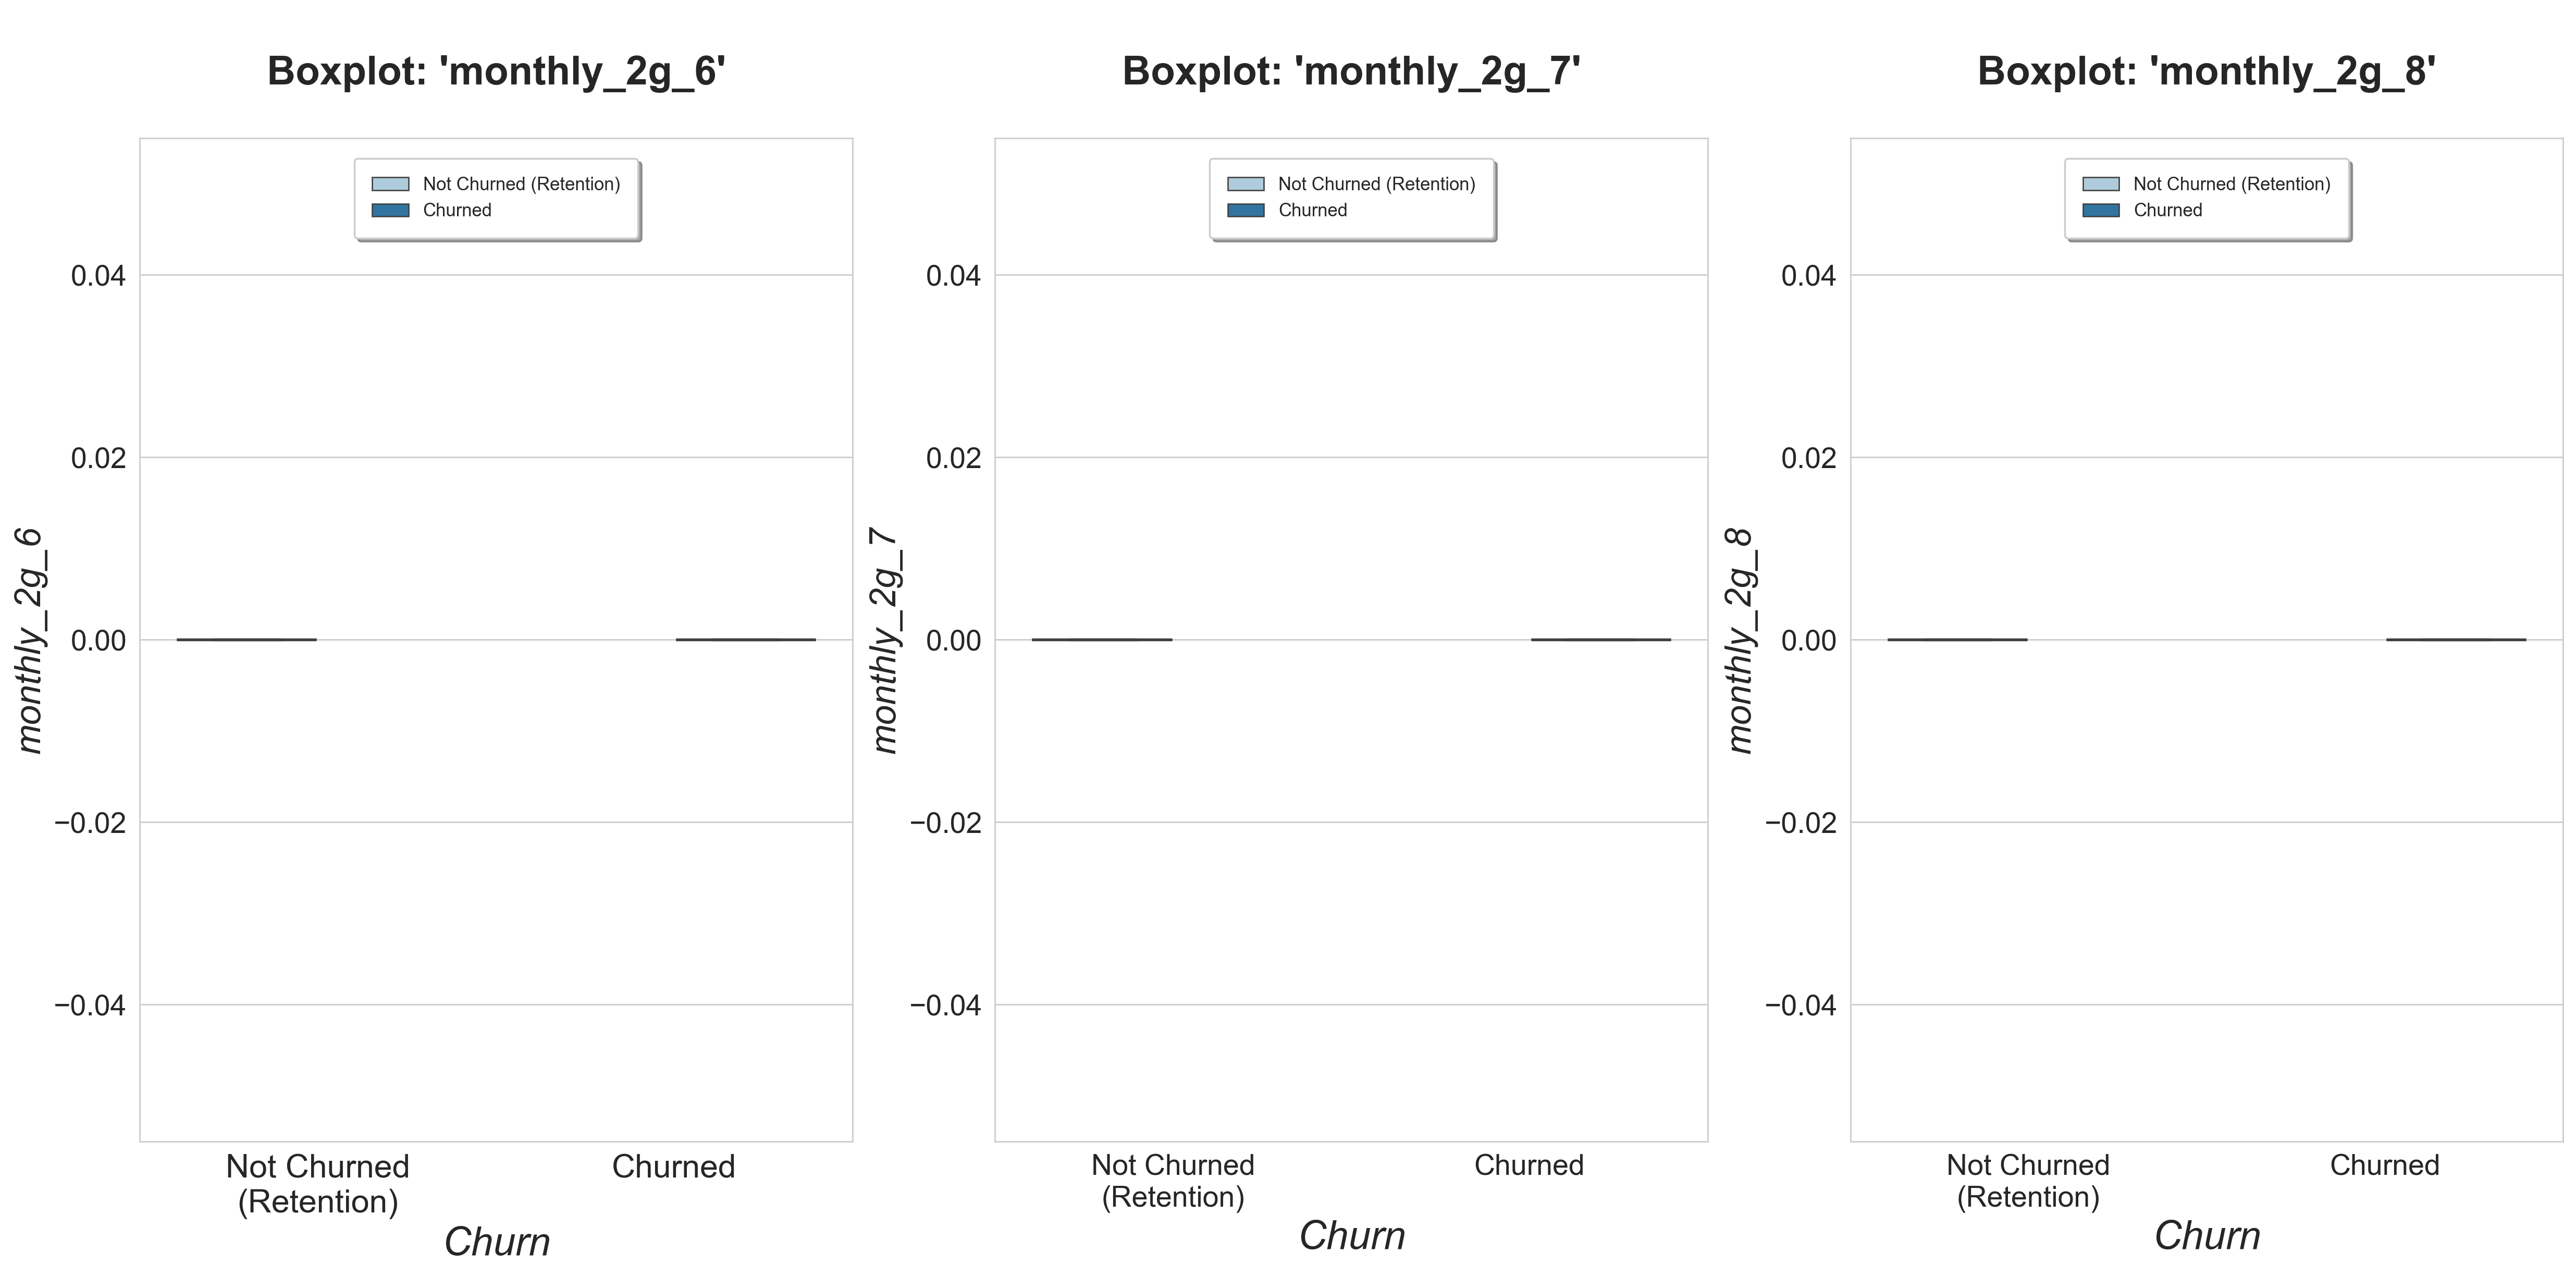

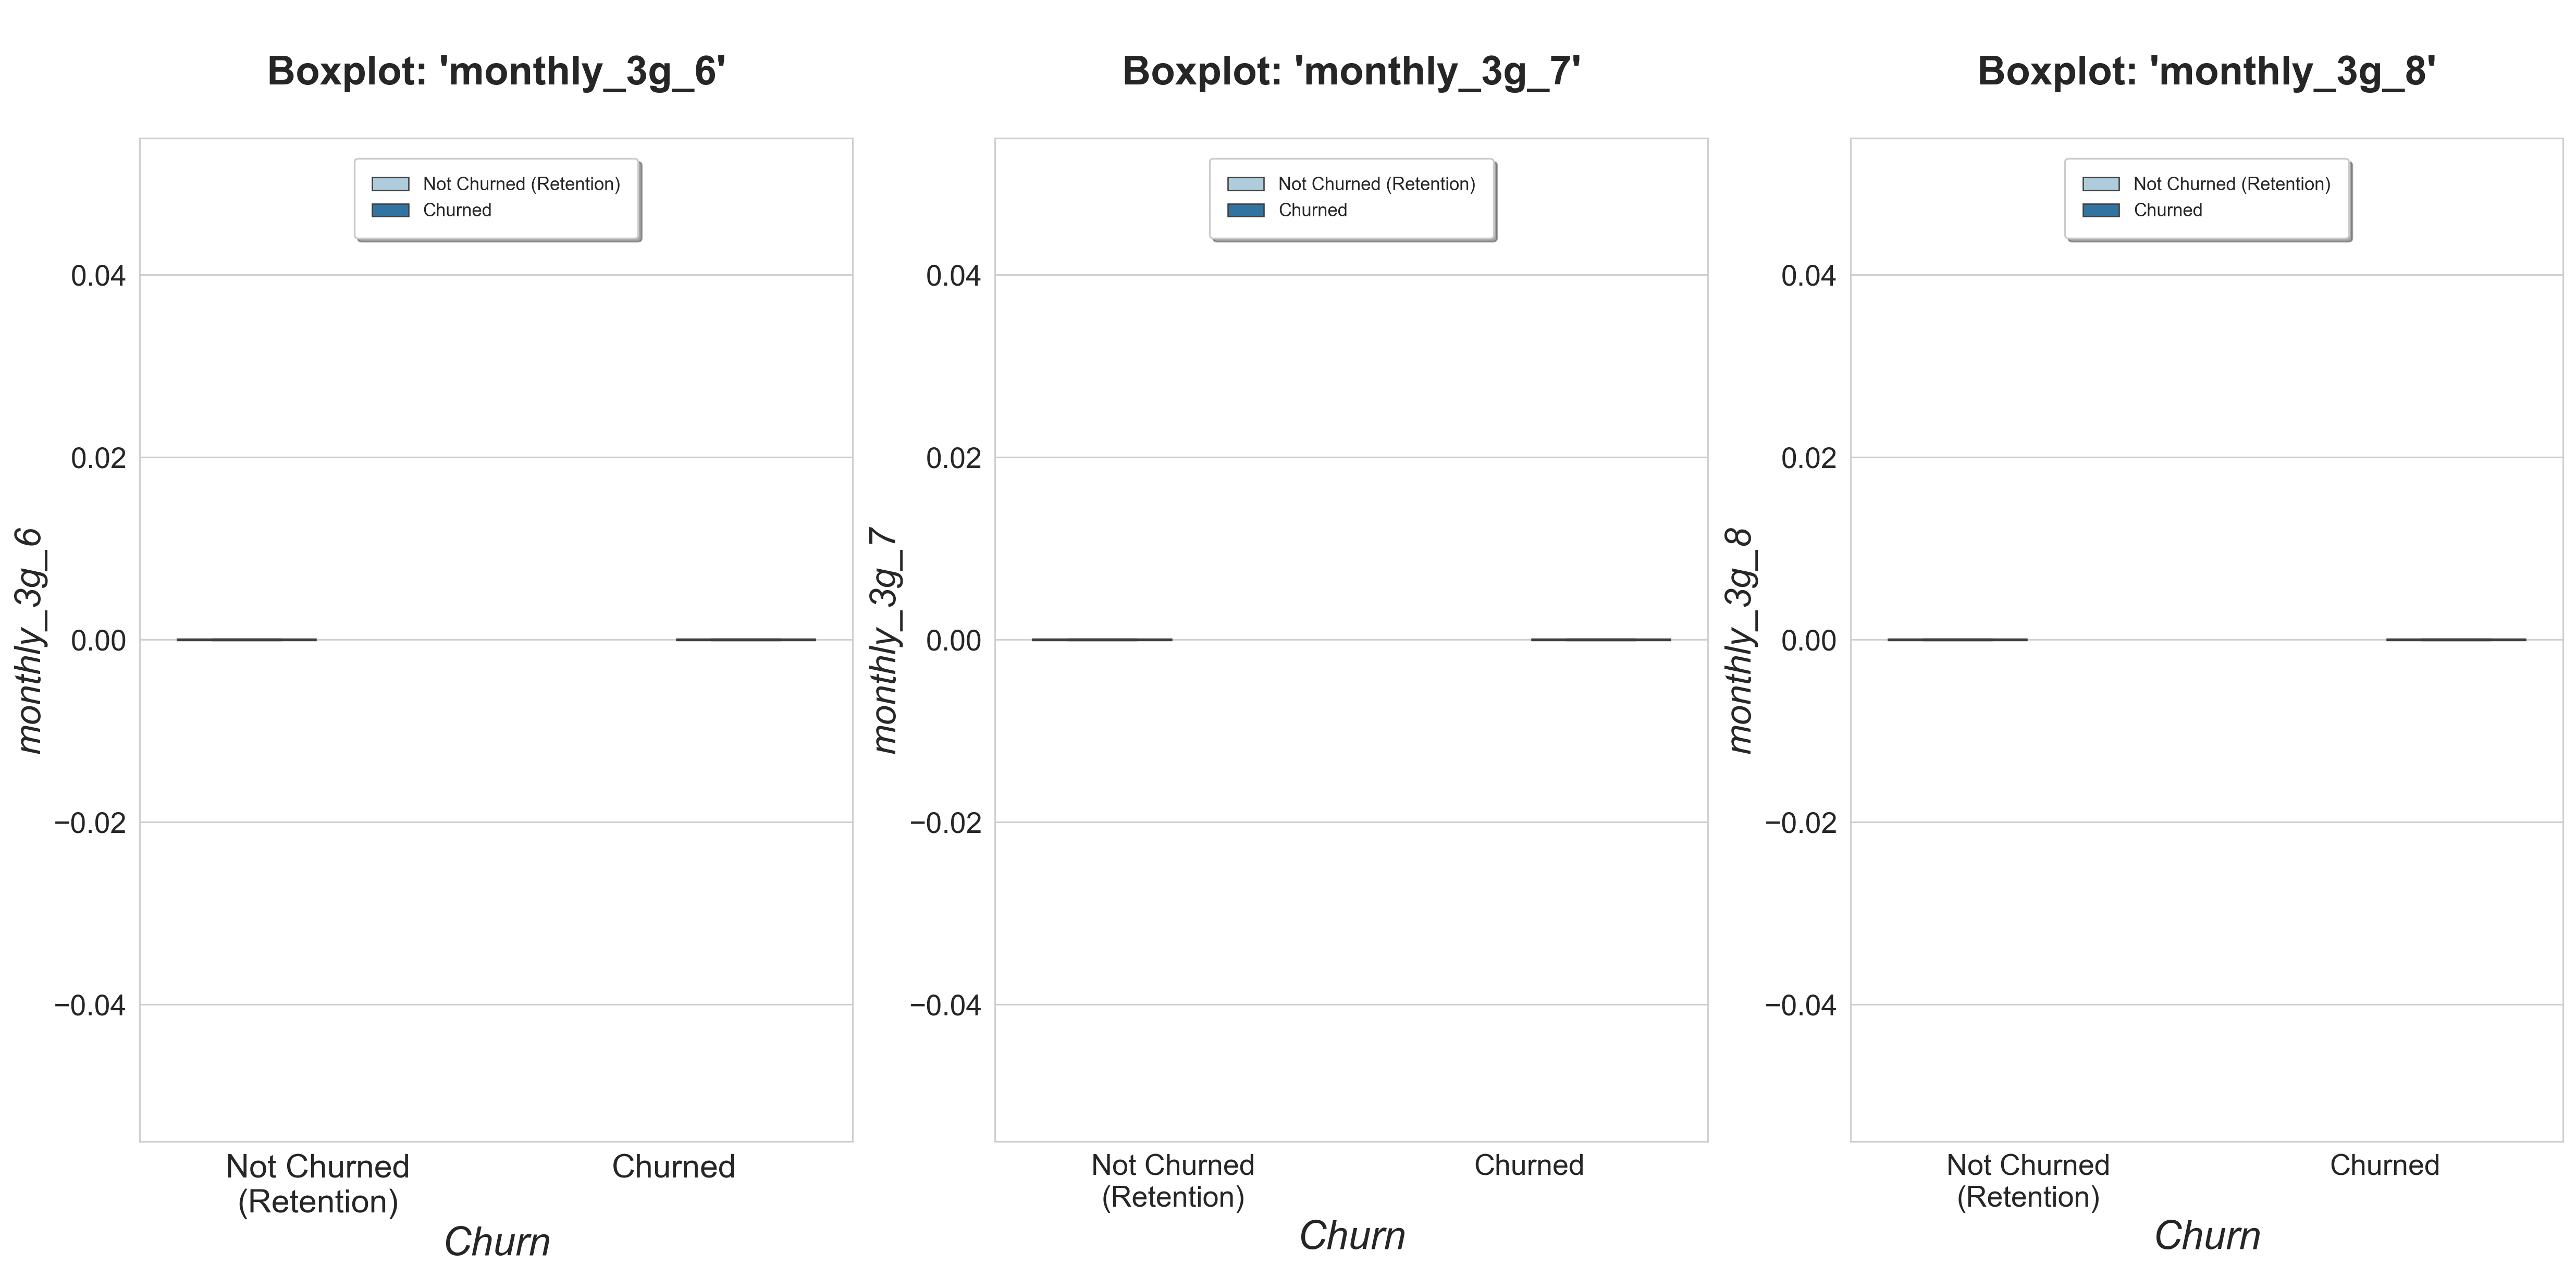

In [55]:
# Check data trends in monthly service schemes for 2G and 3G data
# Plot boxplots for 'monthly_2g' feature for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('monthly_2g')

# Plot boxplots for 'monthly_3g' feature for months 6, 7, and 8, differentiated by churn status
plot_boxplots_6_7_8('monthly_3g')

In [56]:
def plot_barplots_6_7_8(feature):
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()

    # Convert 'churn' to categorical with explicit labels (if not already done)
    df['churn'] = df['churn'].astype('category')
    df['churn'] = df['churn'].cat.rename_categories({0: 'Not Churned (Retention)', 1: 'Churned'})

    plt.subplot(1,3,1)
    ax_11 = sns.barplot(data=df, y=feature+"_6", x=df["churn"], hue="churn", palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)

    # Remove the automatic legend generated by Seaborn
    ax_11.get_legend().remove()

    # Manually create the legend with the desired labels
    handles = ax_11.patches[:2]  # Get the first two patches (representing the two churn categories)
    labels = ['Not Churned (Retention)', 'Churned']
    ax_11.legend(handles, labels)

    plt.subplot(1,3,2)
    ax_22 = sns.barplot(data=df, y=feature+"_7", x=df["churn"], hue="churn", palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Remove the automatic legend generated by Seaborn
    ax_22.get_legend().remove()

    # Manually create the legend with the desired labels
    handles = ax_22.patches[:2] 
    labels = ['Not Churned (Retention)', 'Churned']
    ax_22.legend(handles, labels)

    plt.subplot(1,3,3)
    ax_33 = sns.barplot(data=df, y=feature+"_8", x=df["churn"], hue="churn", palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Remove the automatic legend generated by Seaborn
    ax_33.get_legend().remove()

    # Manually create the legend with the desired labels
    handles = ax_33.patches[:2]
    labels = ['Not Churned (Retention)', 'Churned']
    ax_33.legend(handles, labels)

    plt.show()



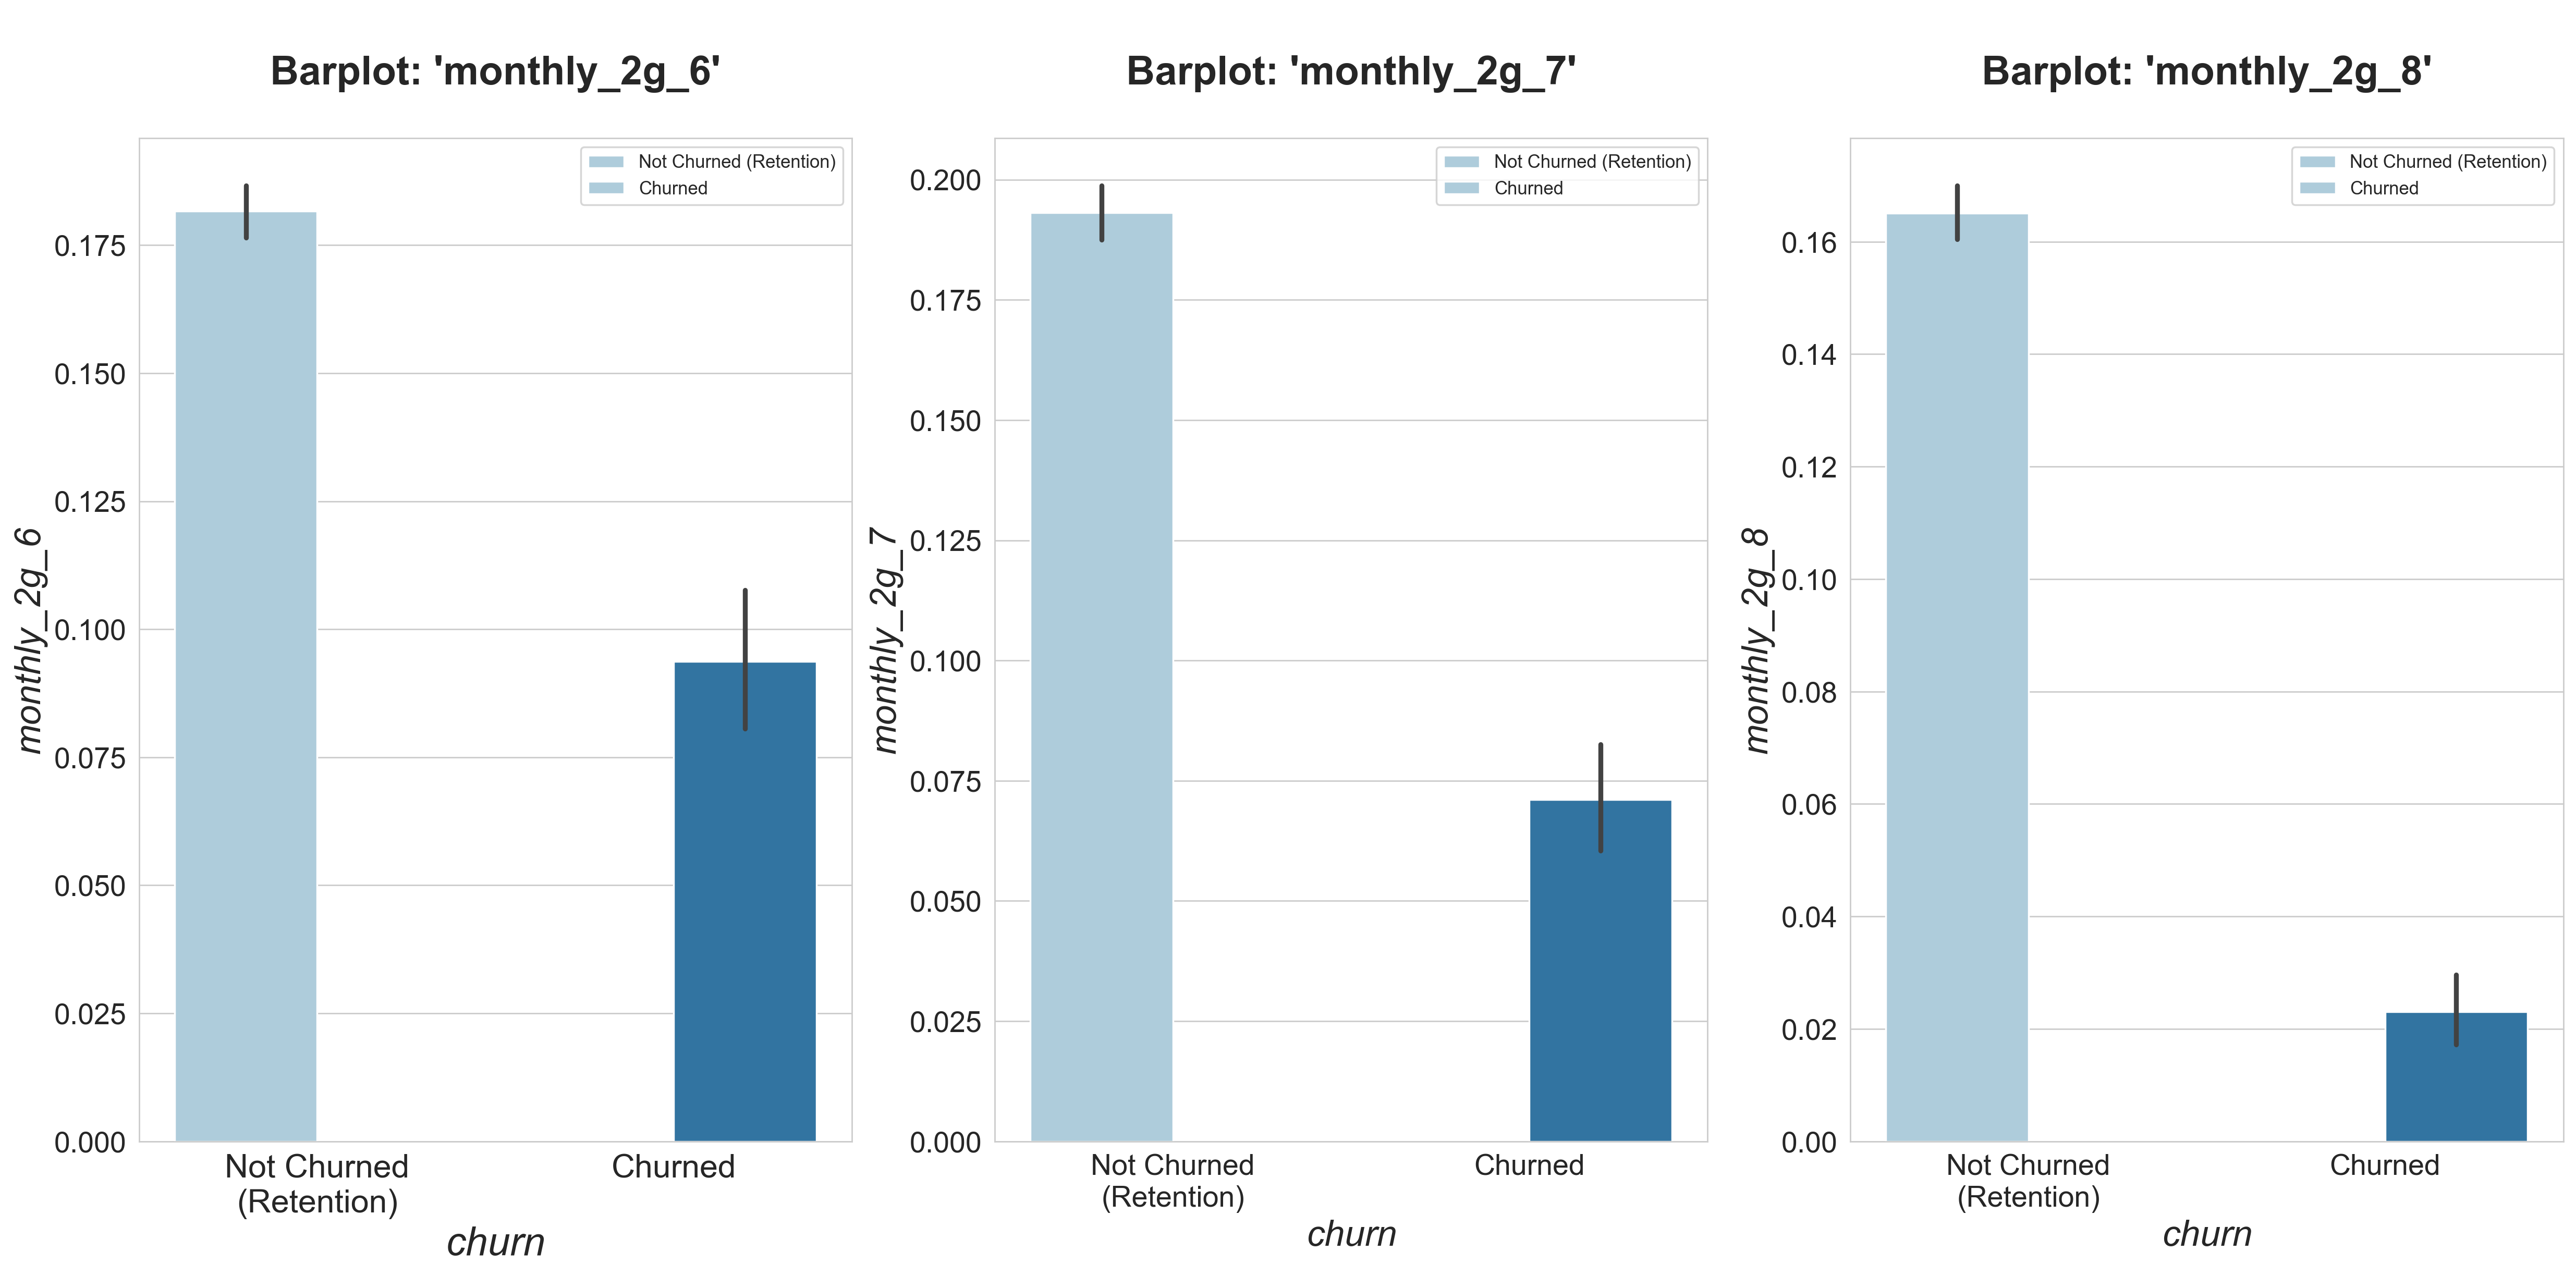

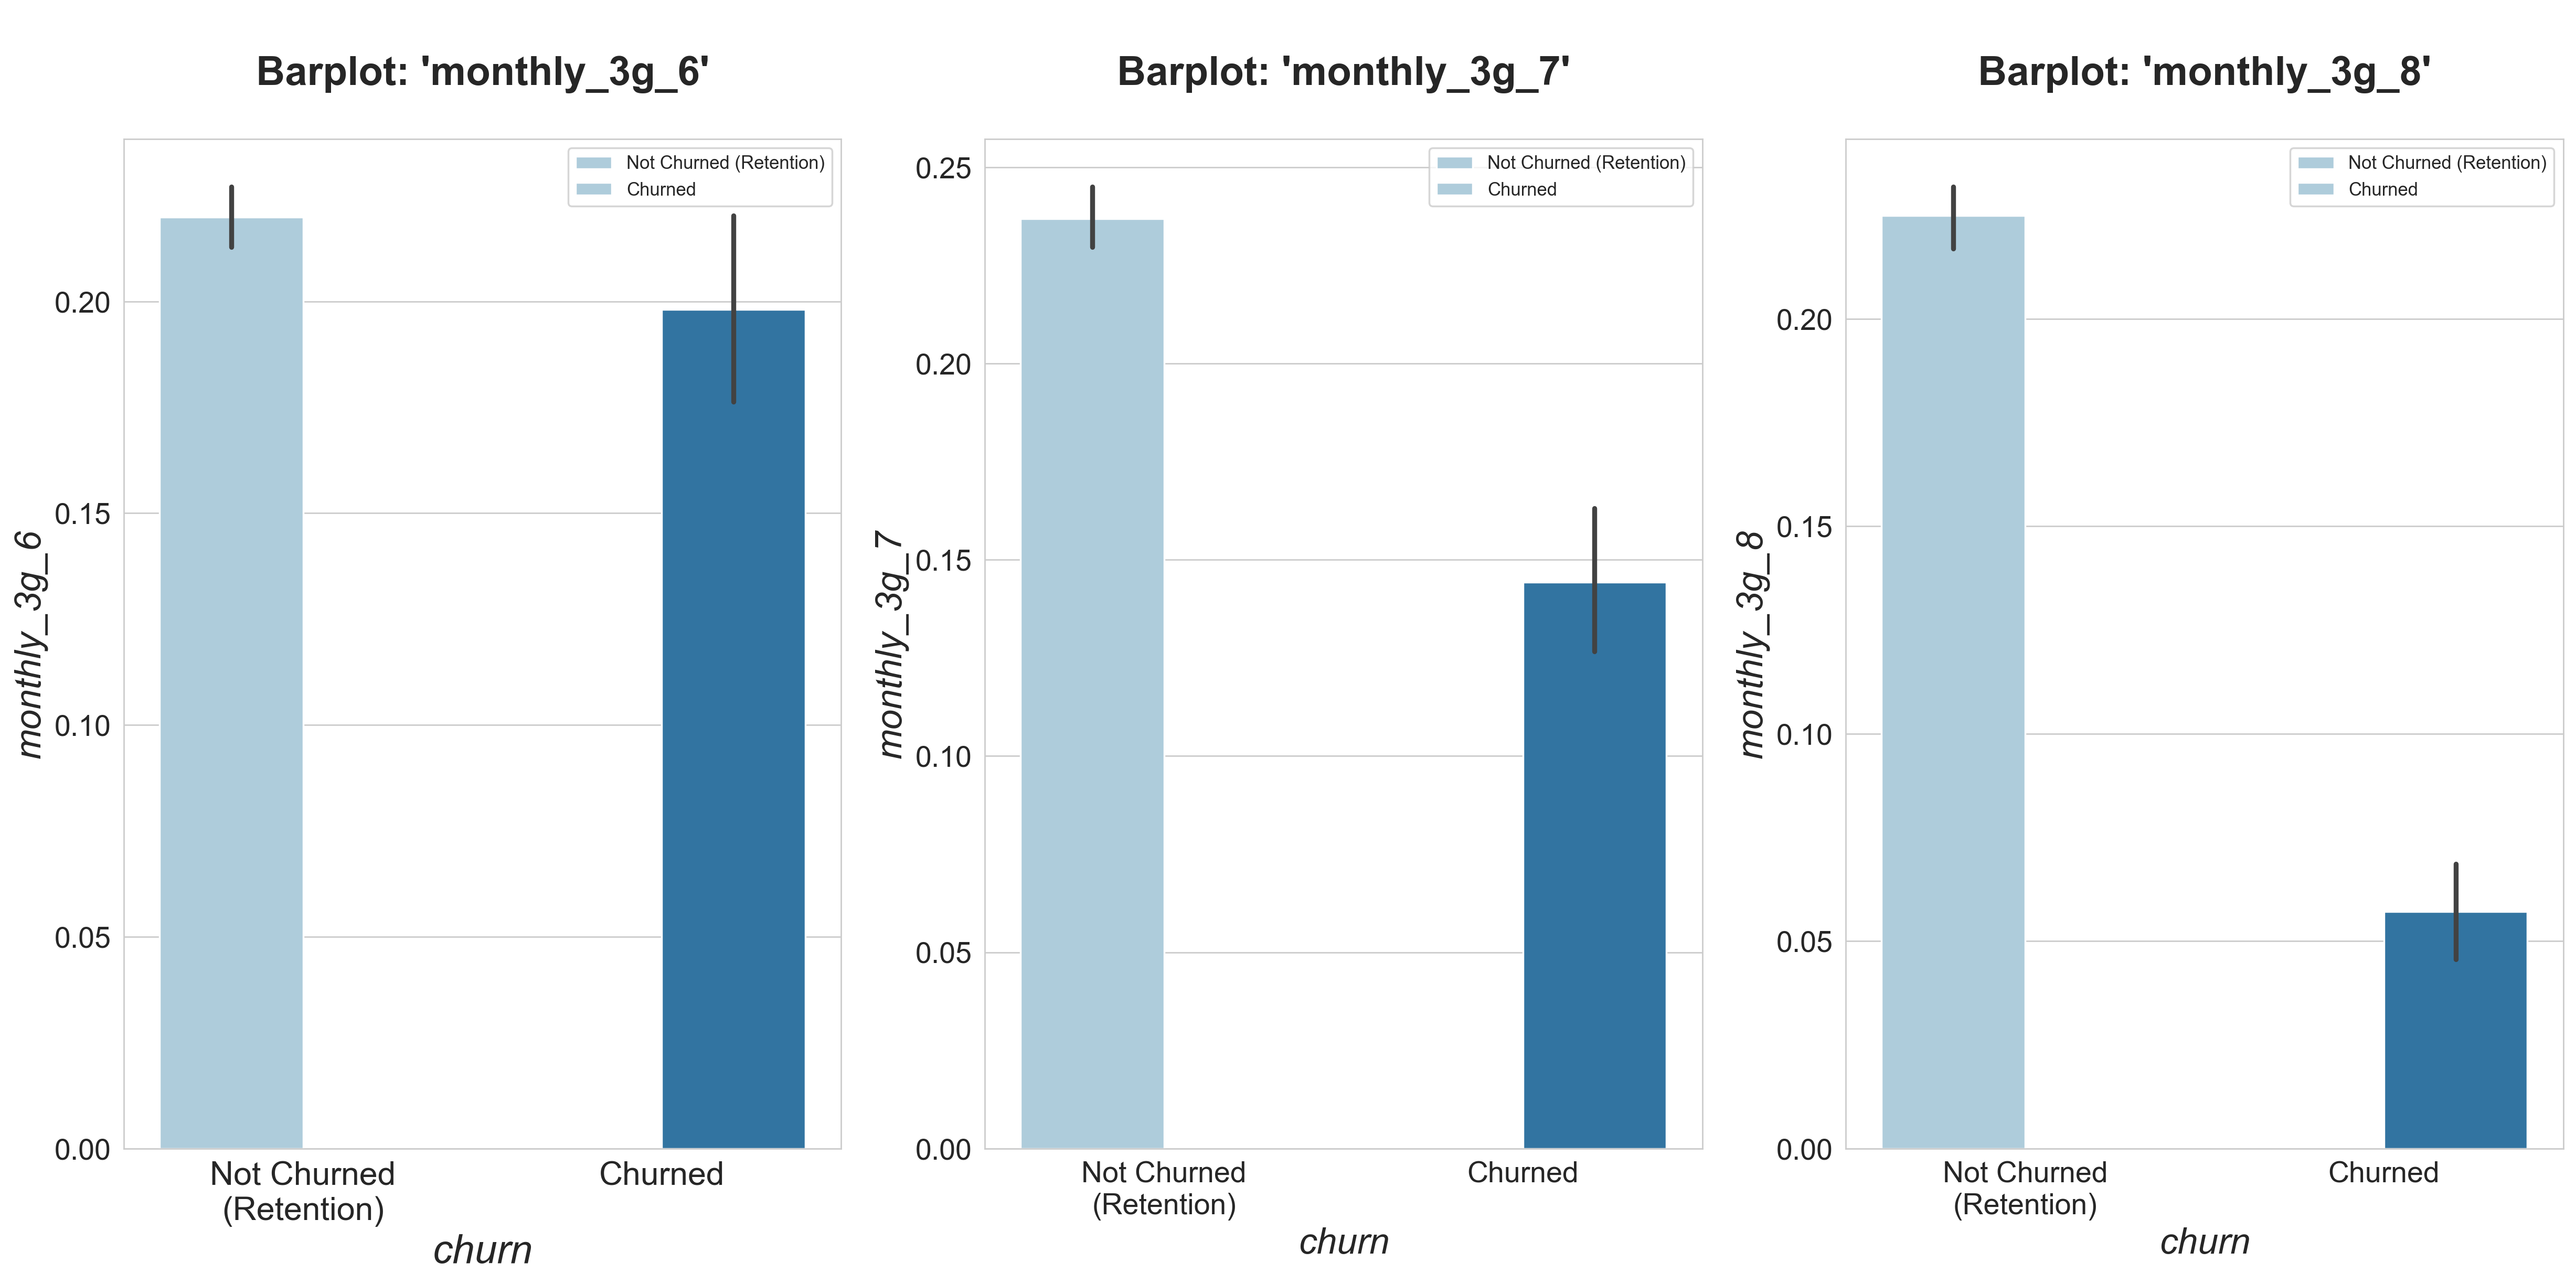

In [57]:
#Barplots for 'monthly_2g' and 'monthly_3g' usage check
plot_barplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_barplots_6_7_8('monthly_3g')   #monthly_3g for all 3 months

**Observation:** Again we can see a drop in` monthly 2G and 3G subscriptions` for churned customers in 8th Month(action phase)

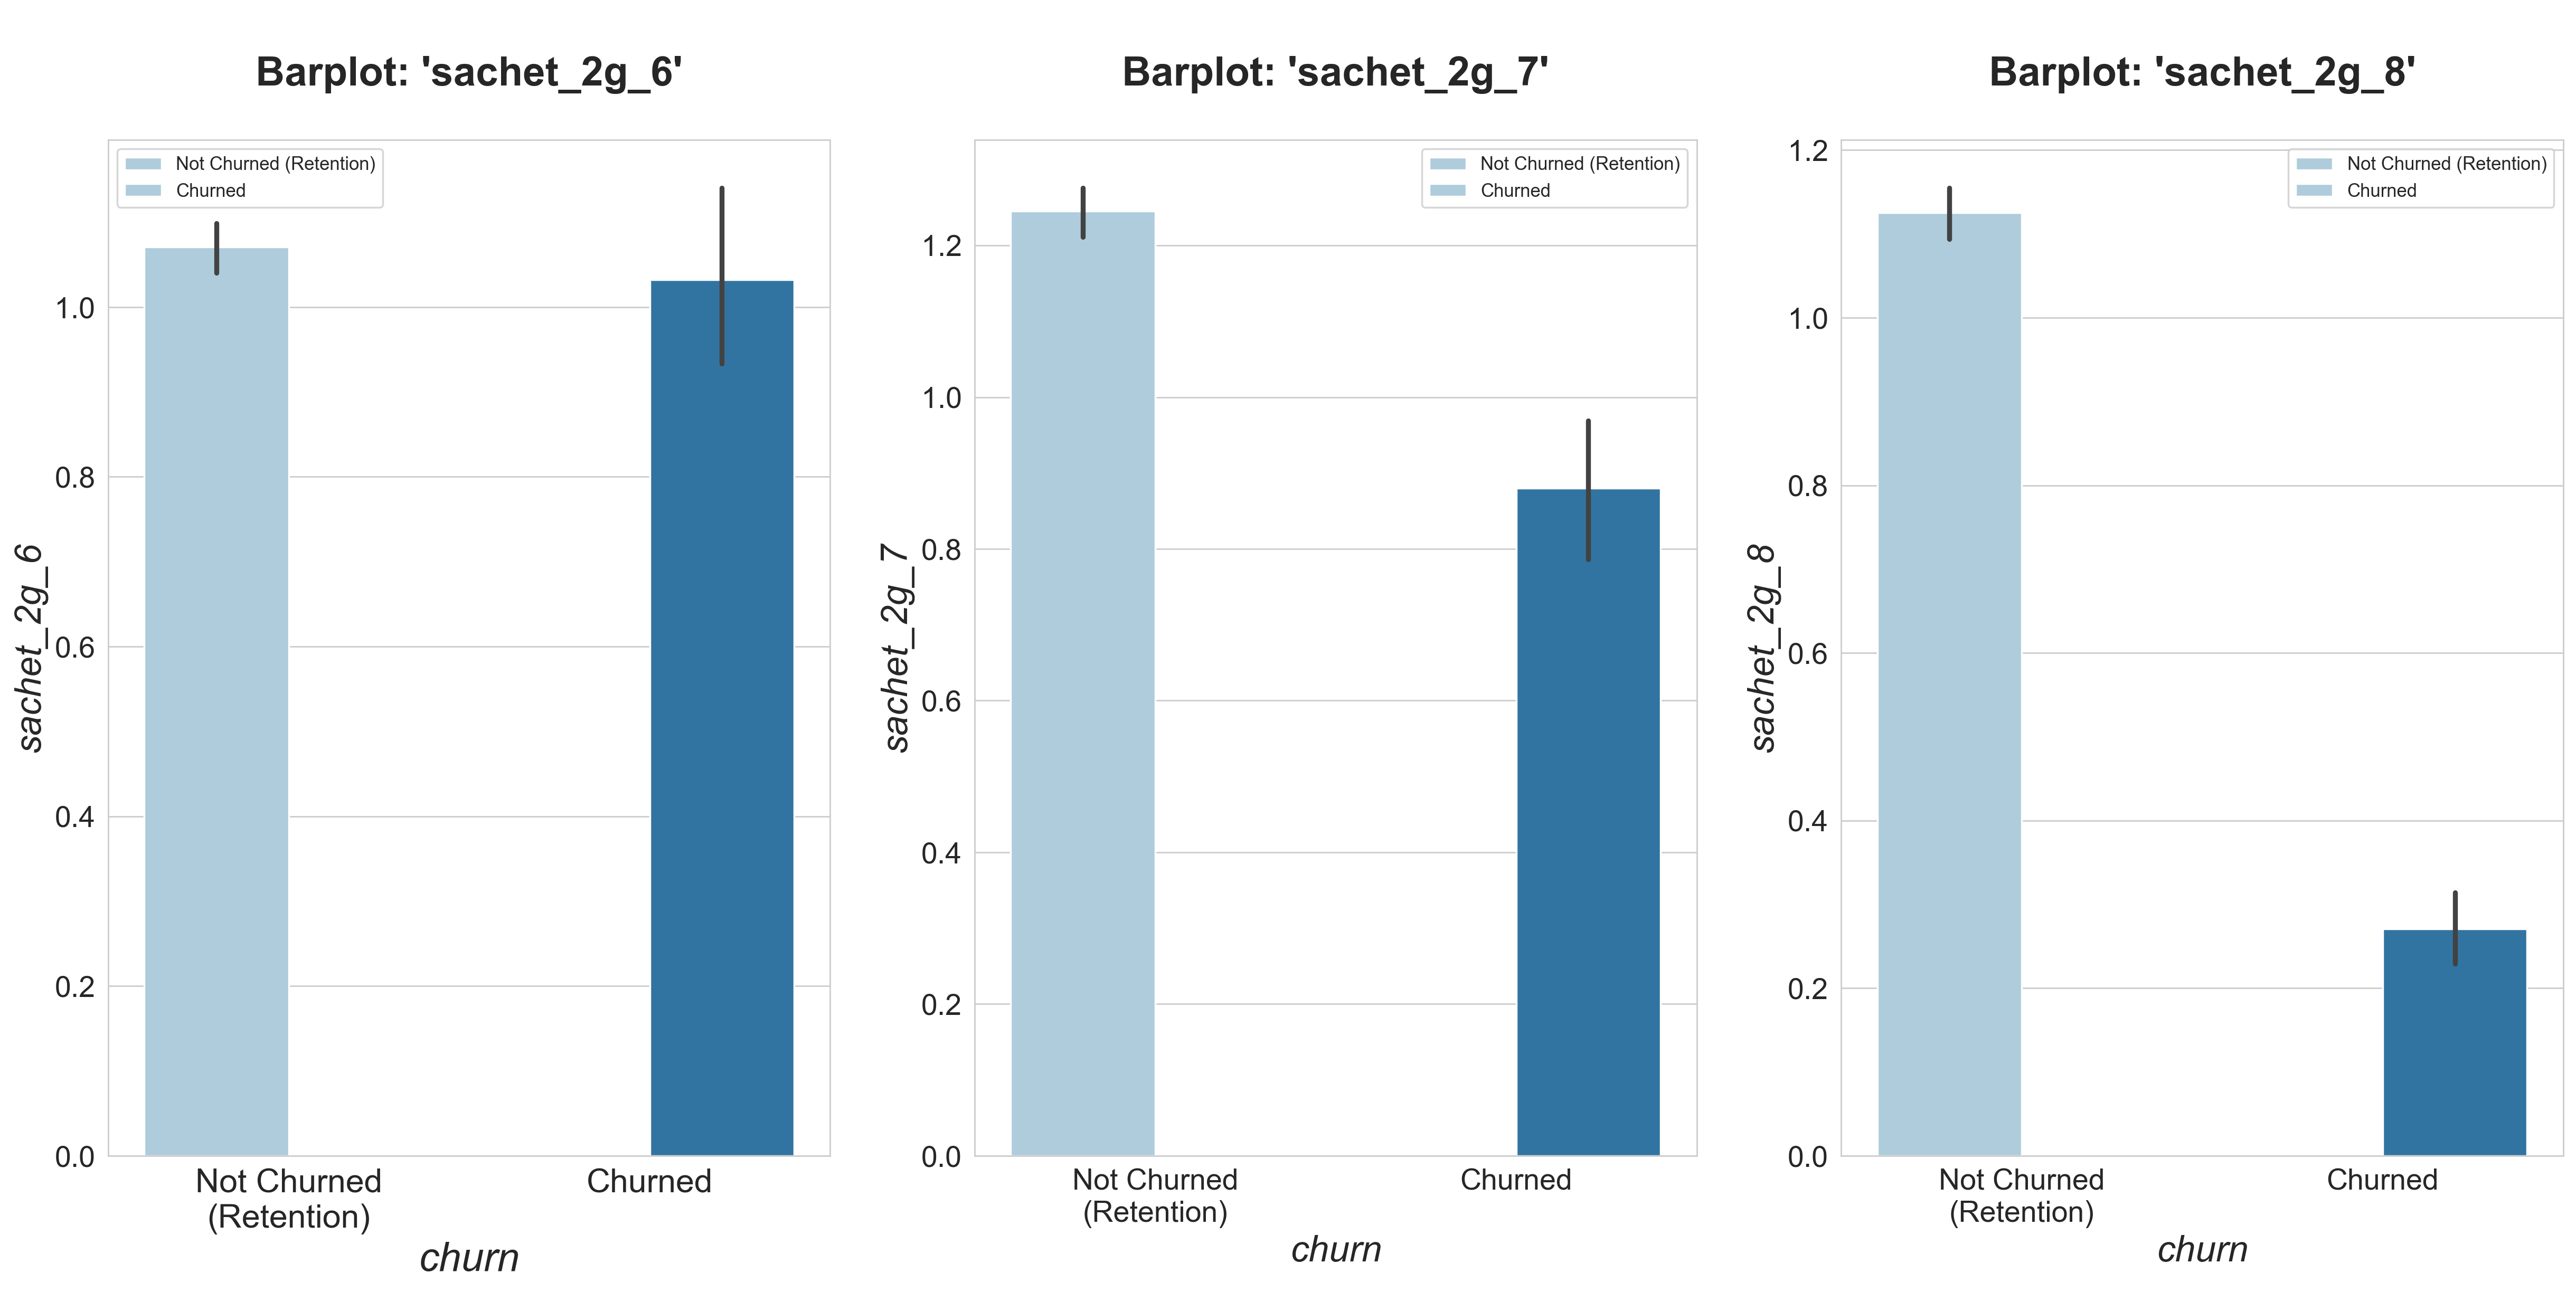

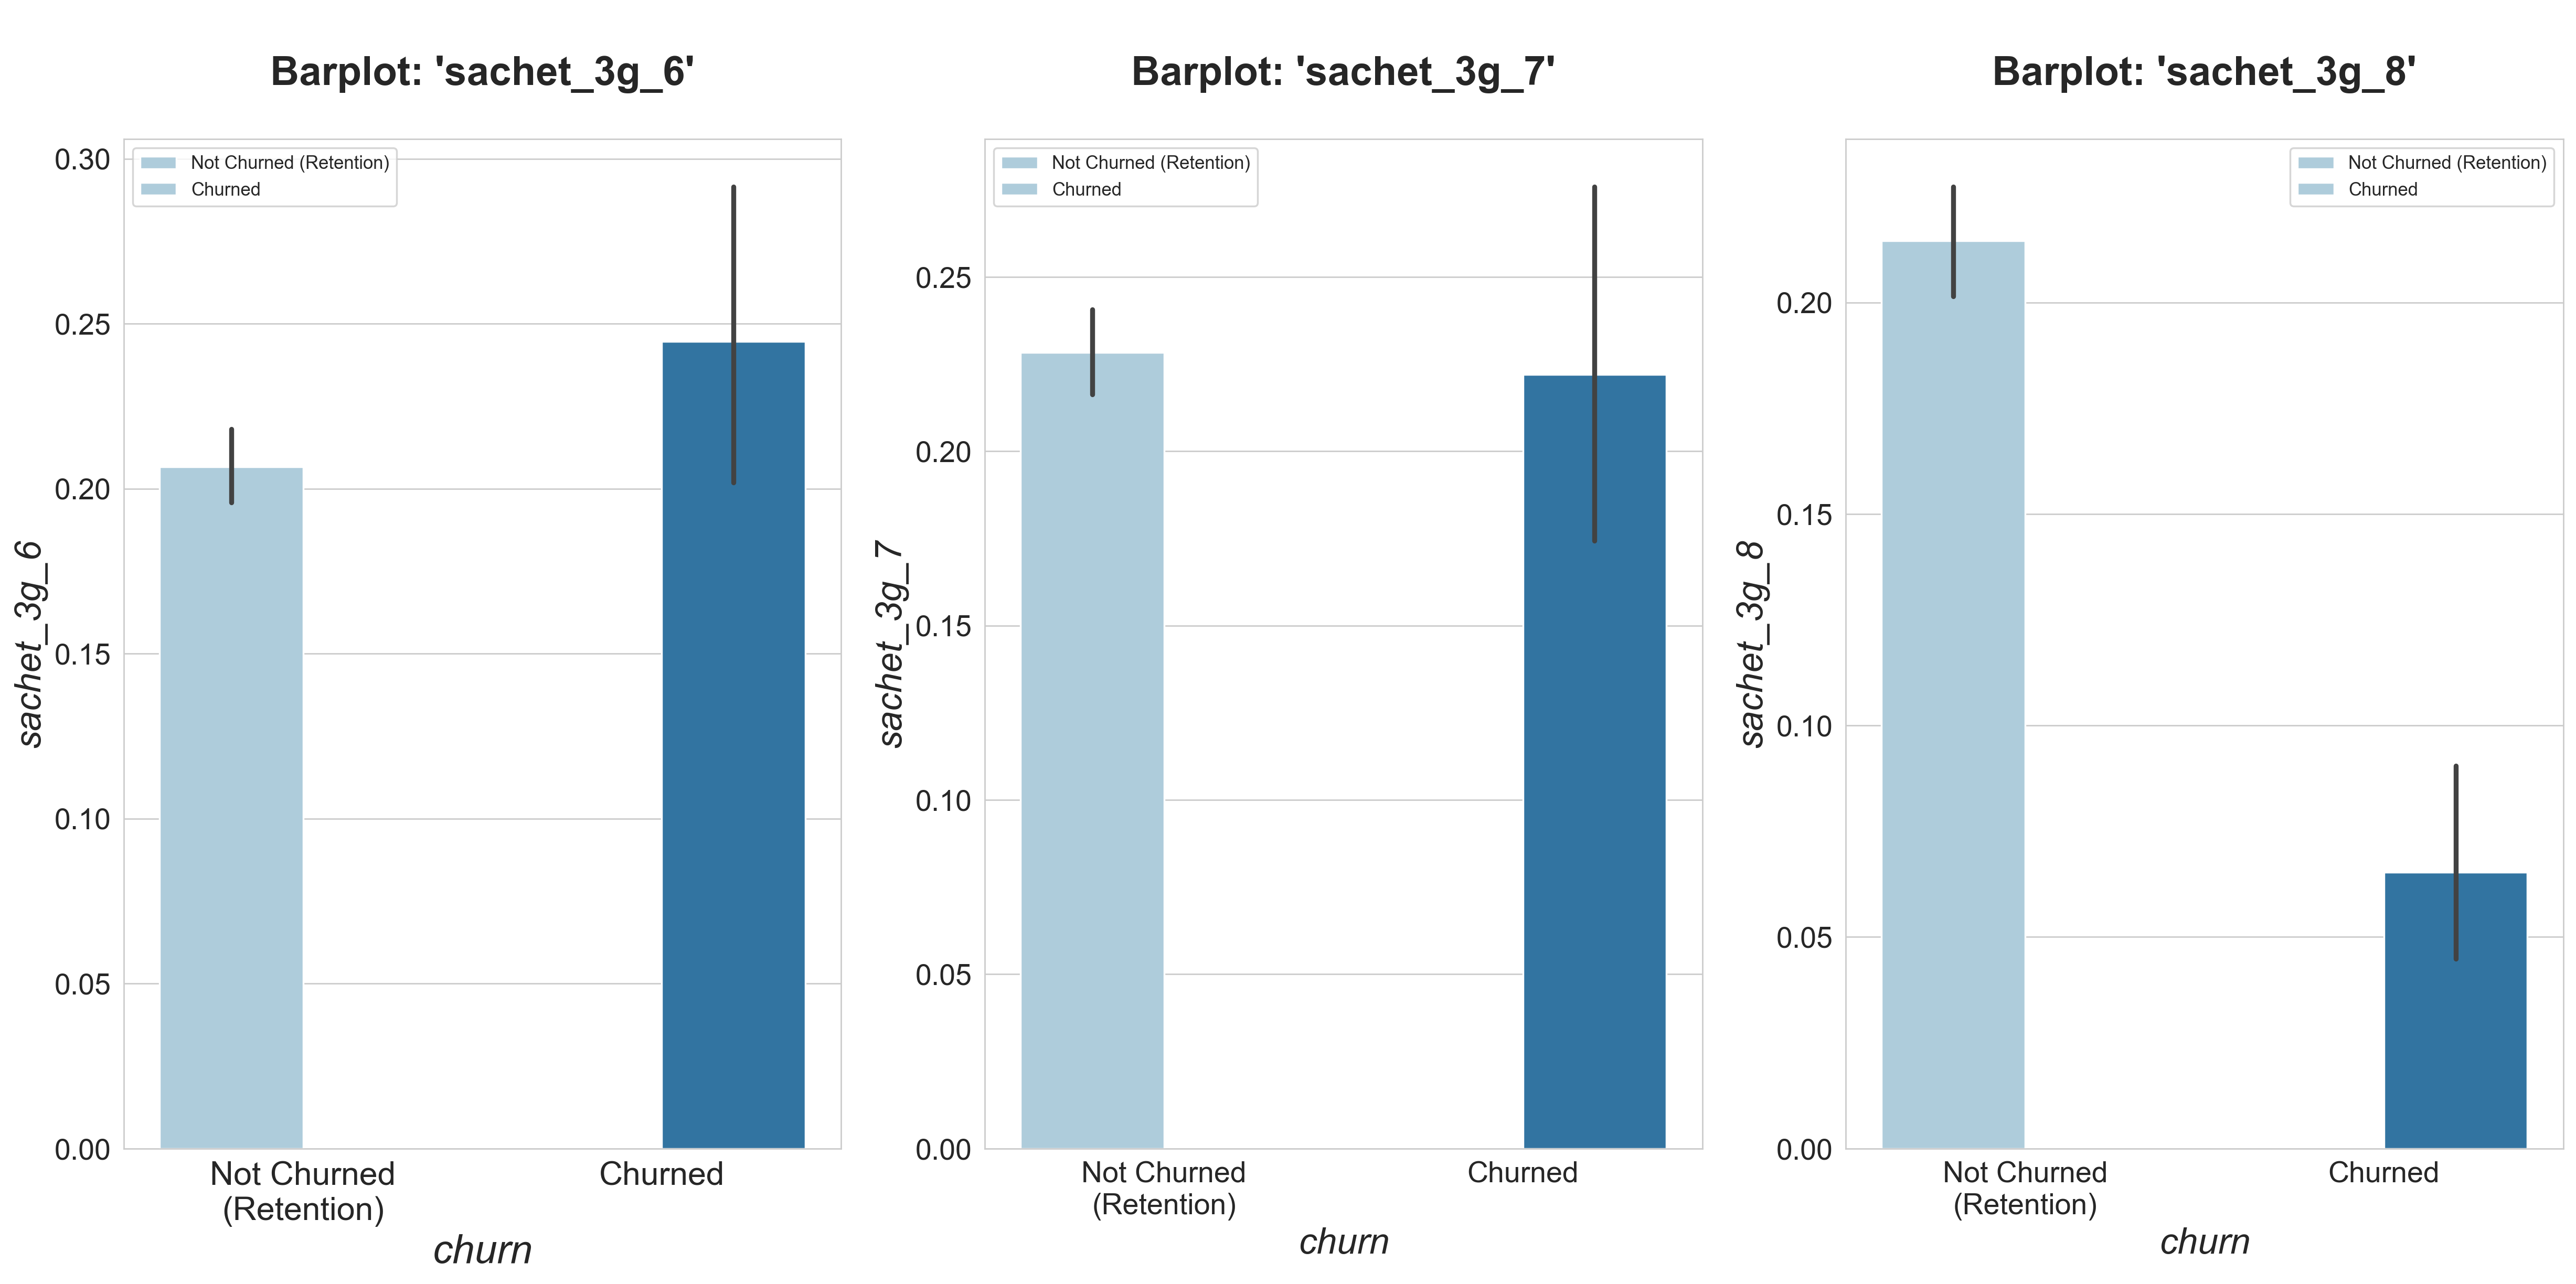

In [58]:
## Plotting bar charts for service schemes with validity less than a month for 2G ('sachet_2g') and 3G ('sachet_3g') features

plot_barplots_6_7_8('sachet_2g')  # Bar chart for 2G service schemes with validity less than a month across all three months
plot_barplots_6_7_8('sachet_3g')  # Bar chart for 3G service schemes with validity less than a month across all three months

**Observations:** We see that the `'sachet_2g'` and `'sachet_3g'` schemes we largely used in the first and second months of good phase i.e. month (6) and (7) and then the trend shows a sudden drop in the usage as we approach the 8th month (action phase) for churned customers.

**Check for Volume Based Cost (vbc)**

In [59]:
# Volume Based Cost (vbc) related features
vbc_cols_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('vbc')])
vbc_cols_list

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [60]:
# Rename volume-based cost features to the desired format, appending the month number
telecom_hv.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

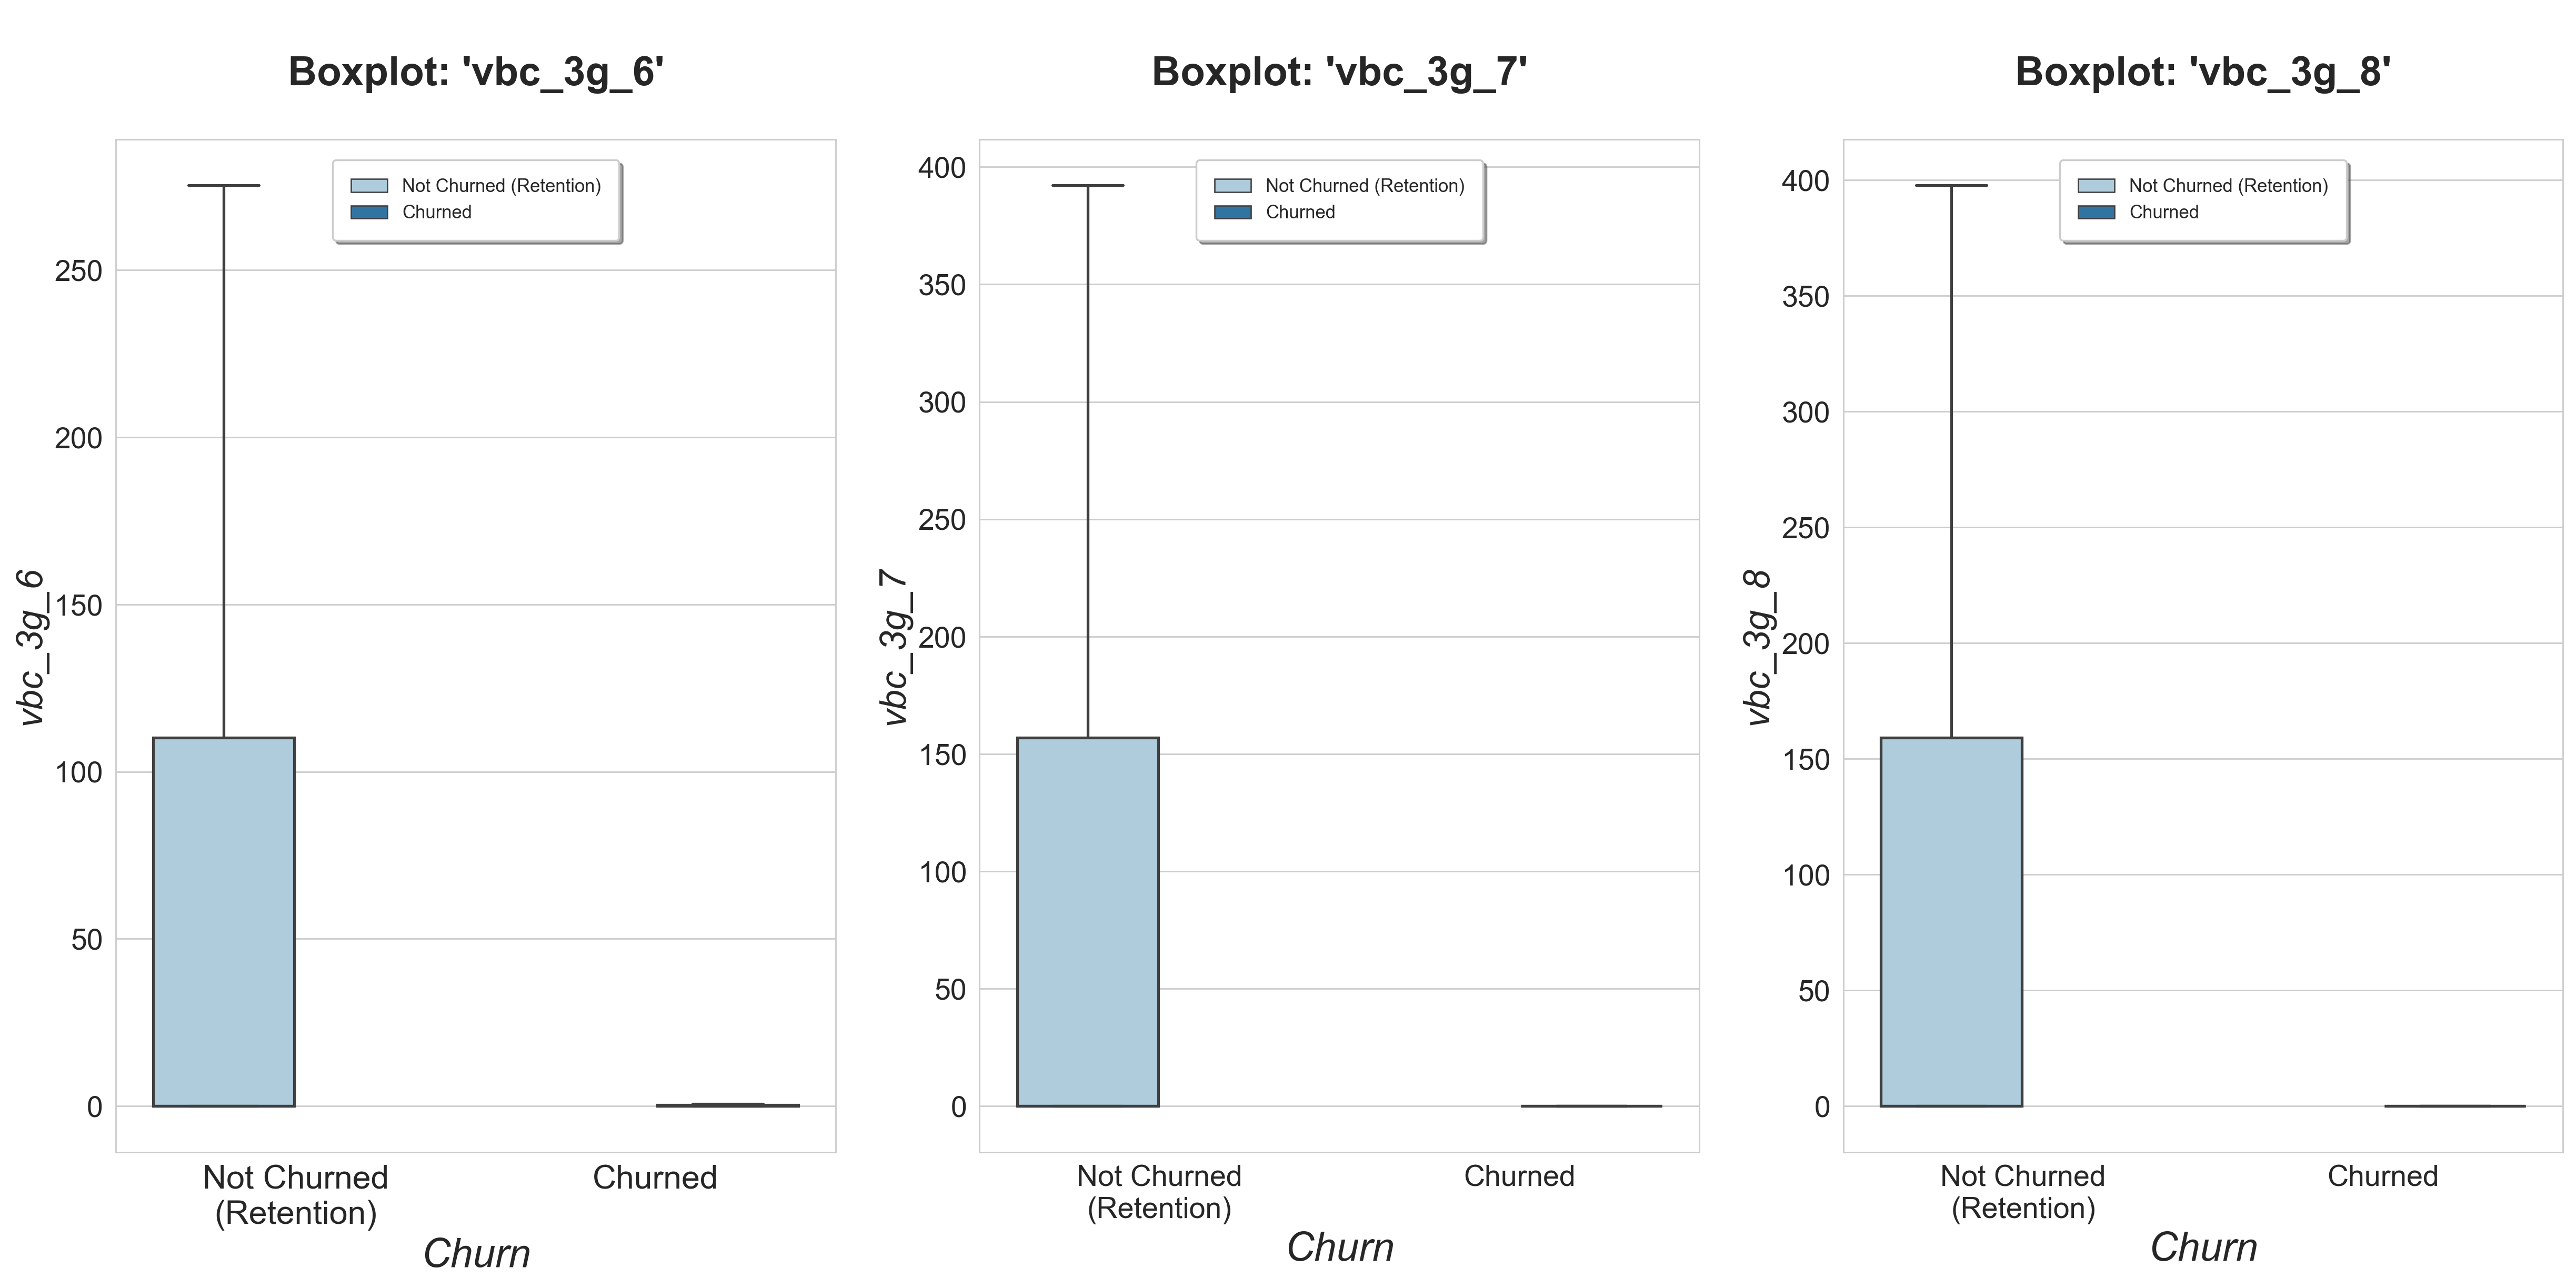

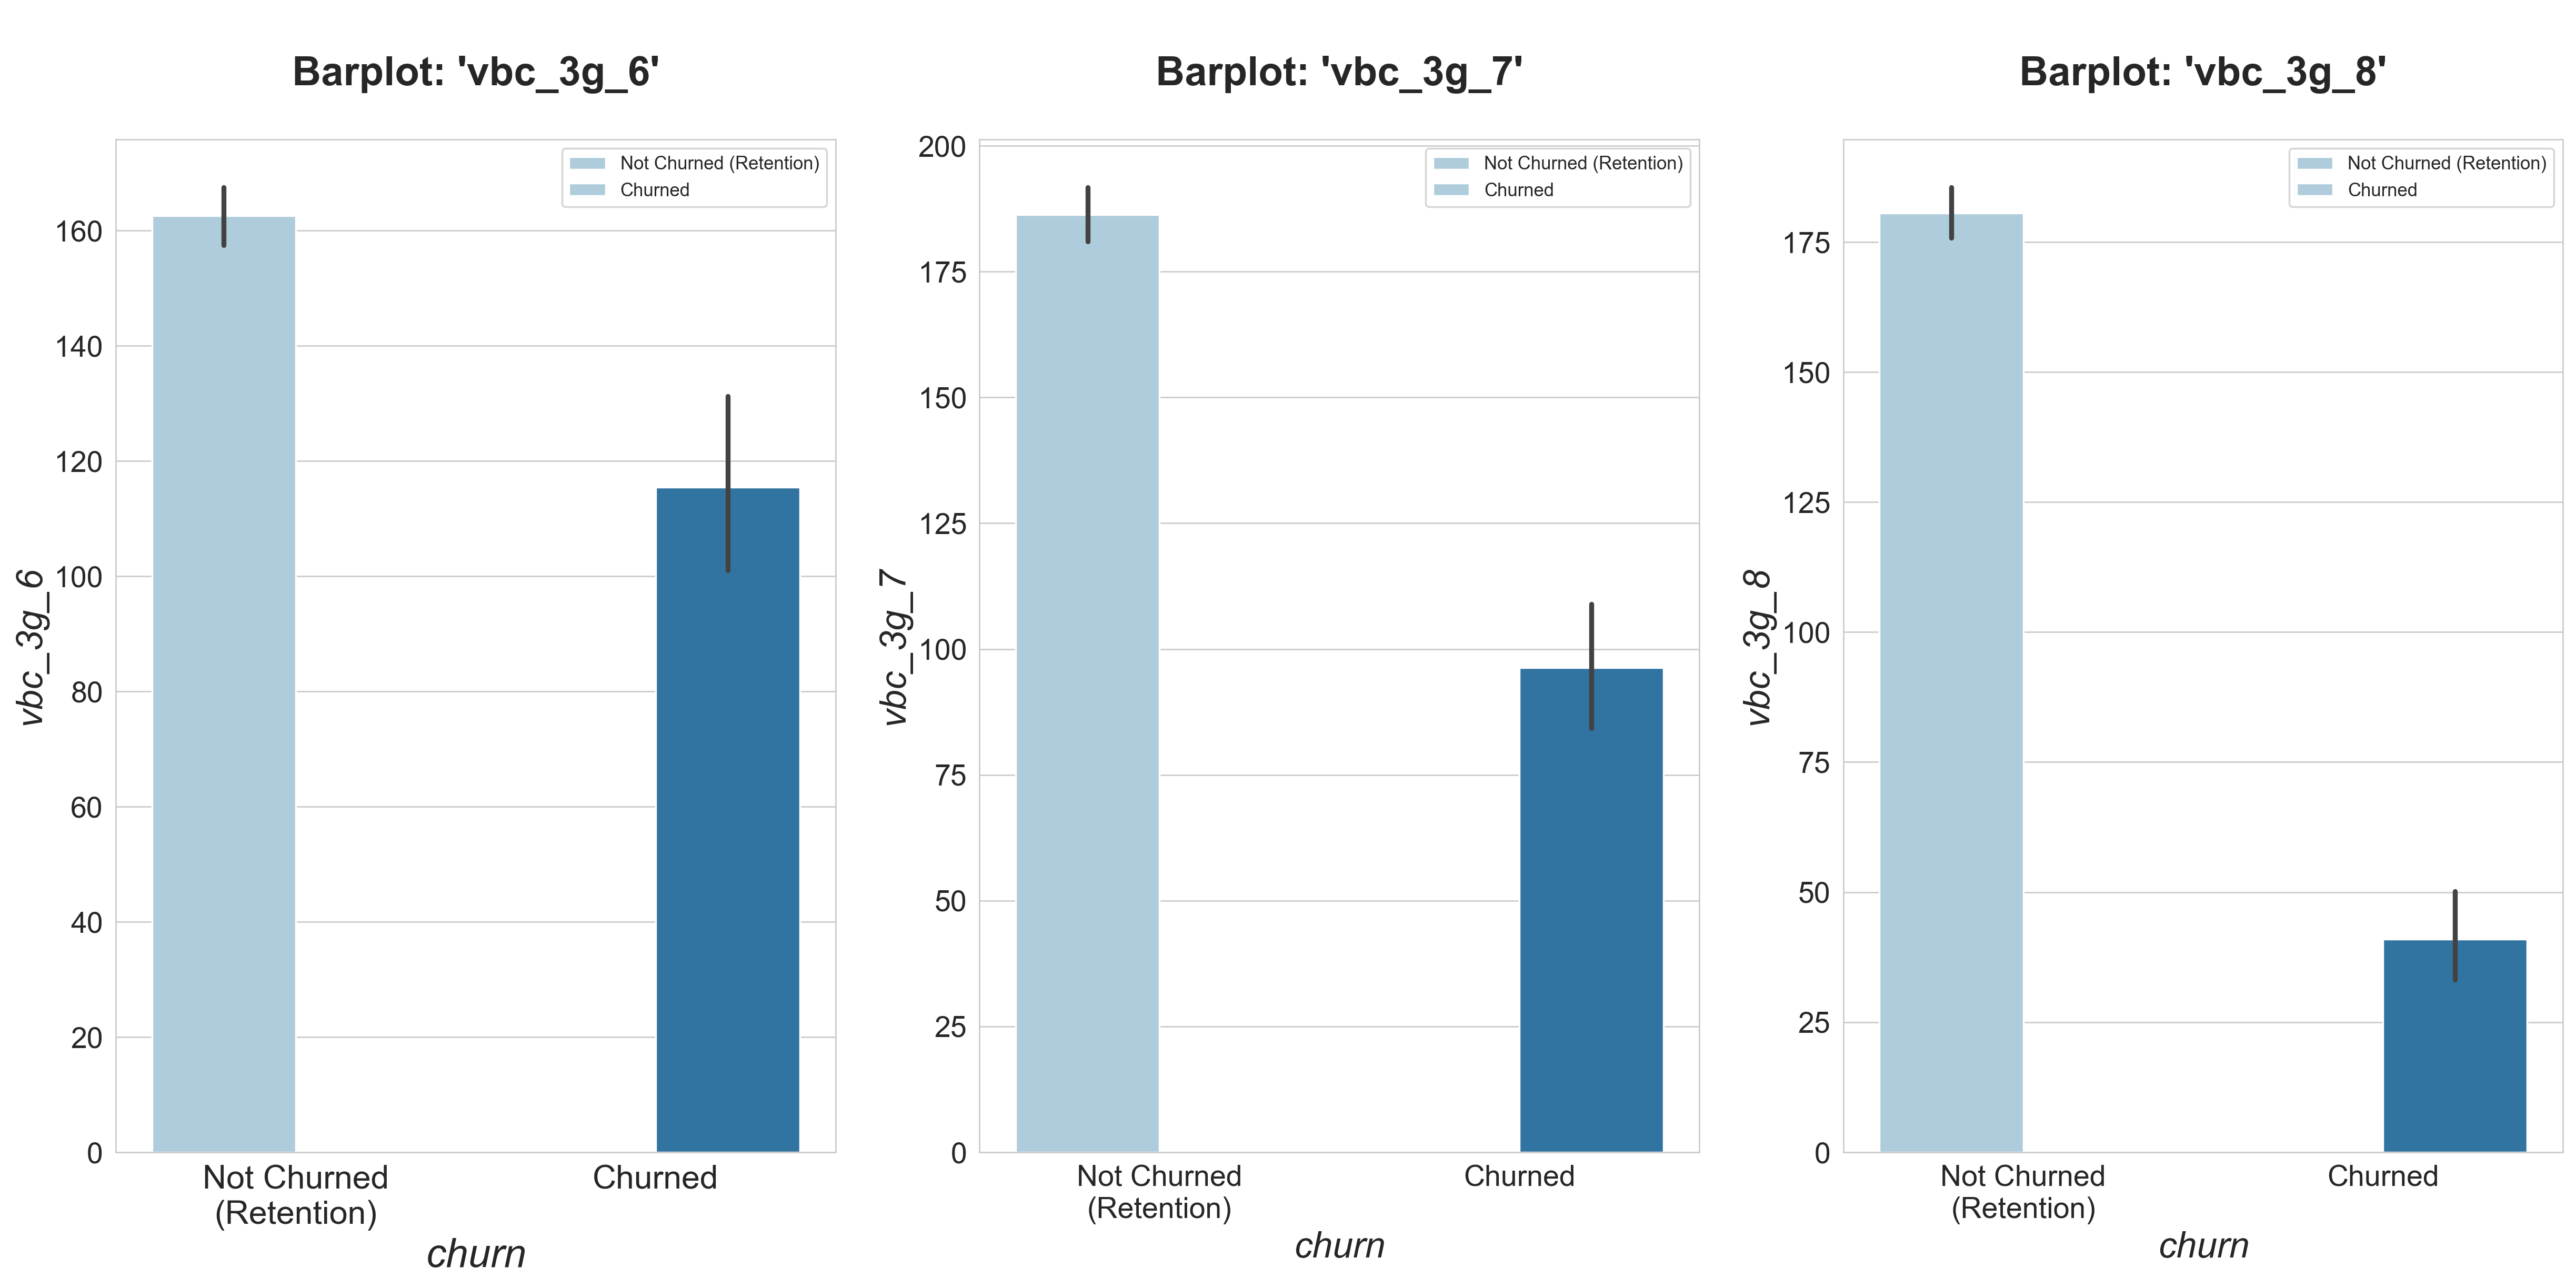

In [61]:
# Plotting box plots and bar charts for volume-based cost (vbc) features
plot_boxplots_6_7_8('vbc_3g')
plot_barplots_6_7_8('vbc_3g')

**Observations:**<br>(i) The `volume based cost, vbc for 3G` is much lower for Churned customers than the non-churned customers. <br>(ii) Also, we see `a drop in the vbc` as we approach the 8th month(action phase) for churned customers.

**(d) Average Revenue Per User**

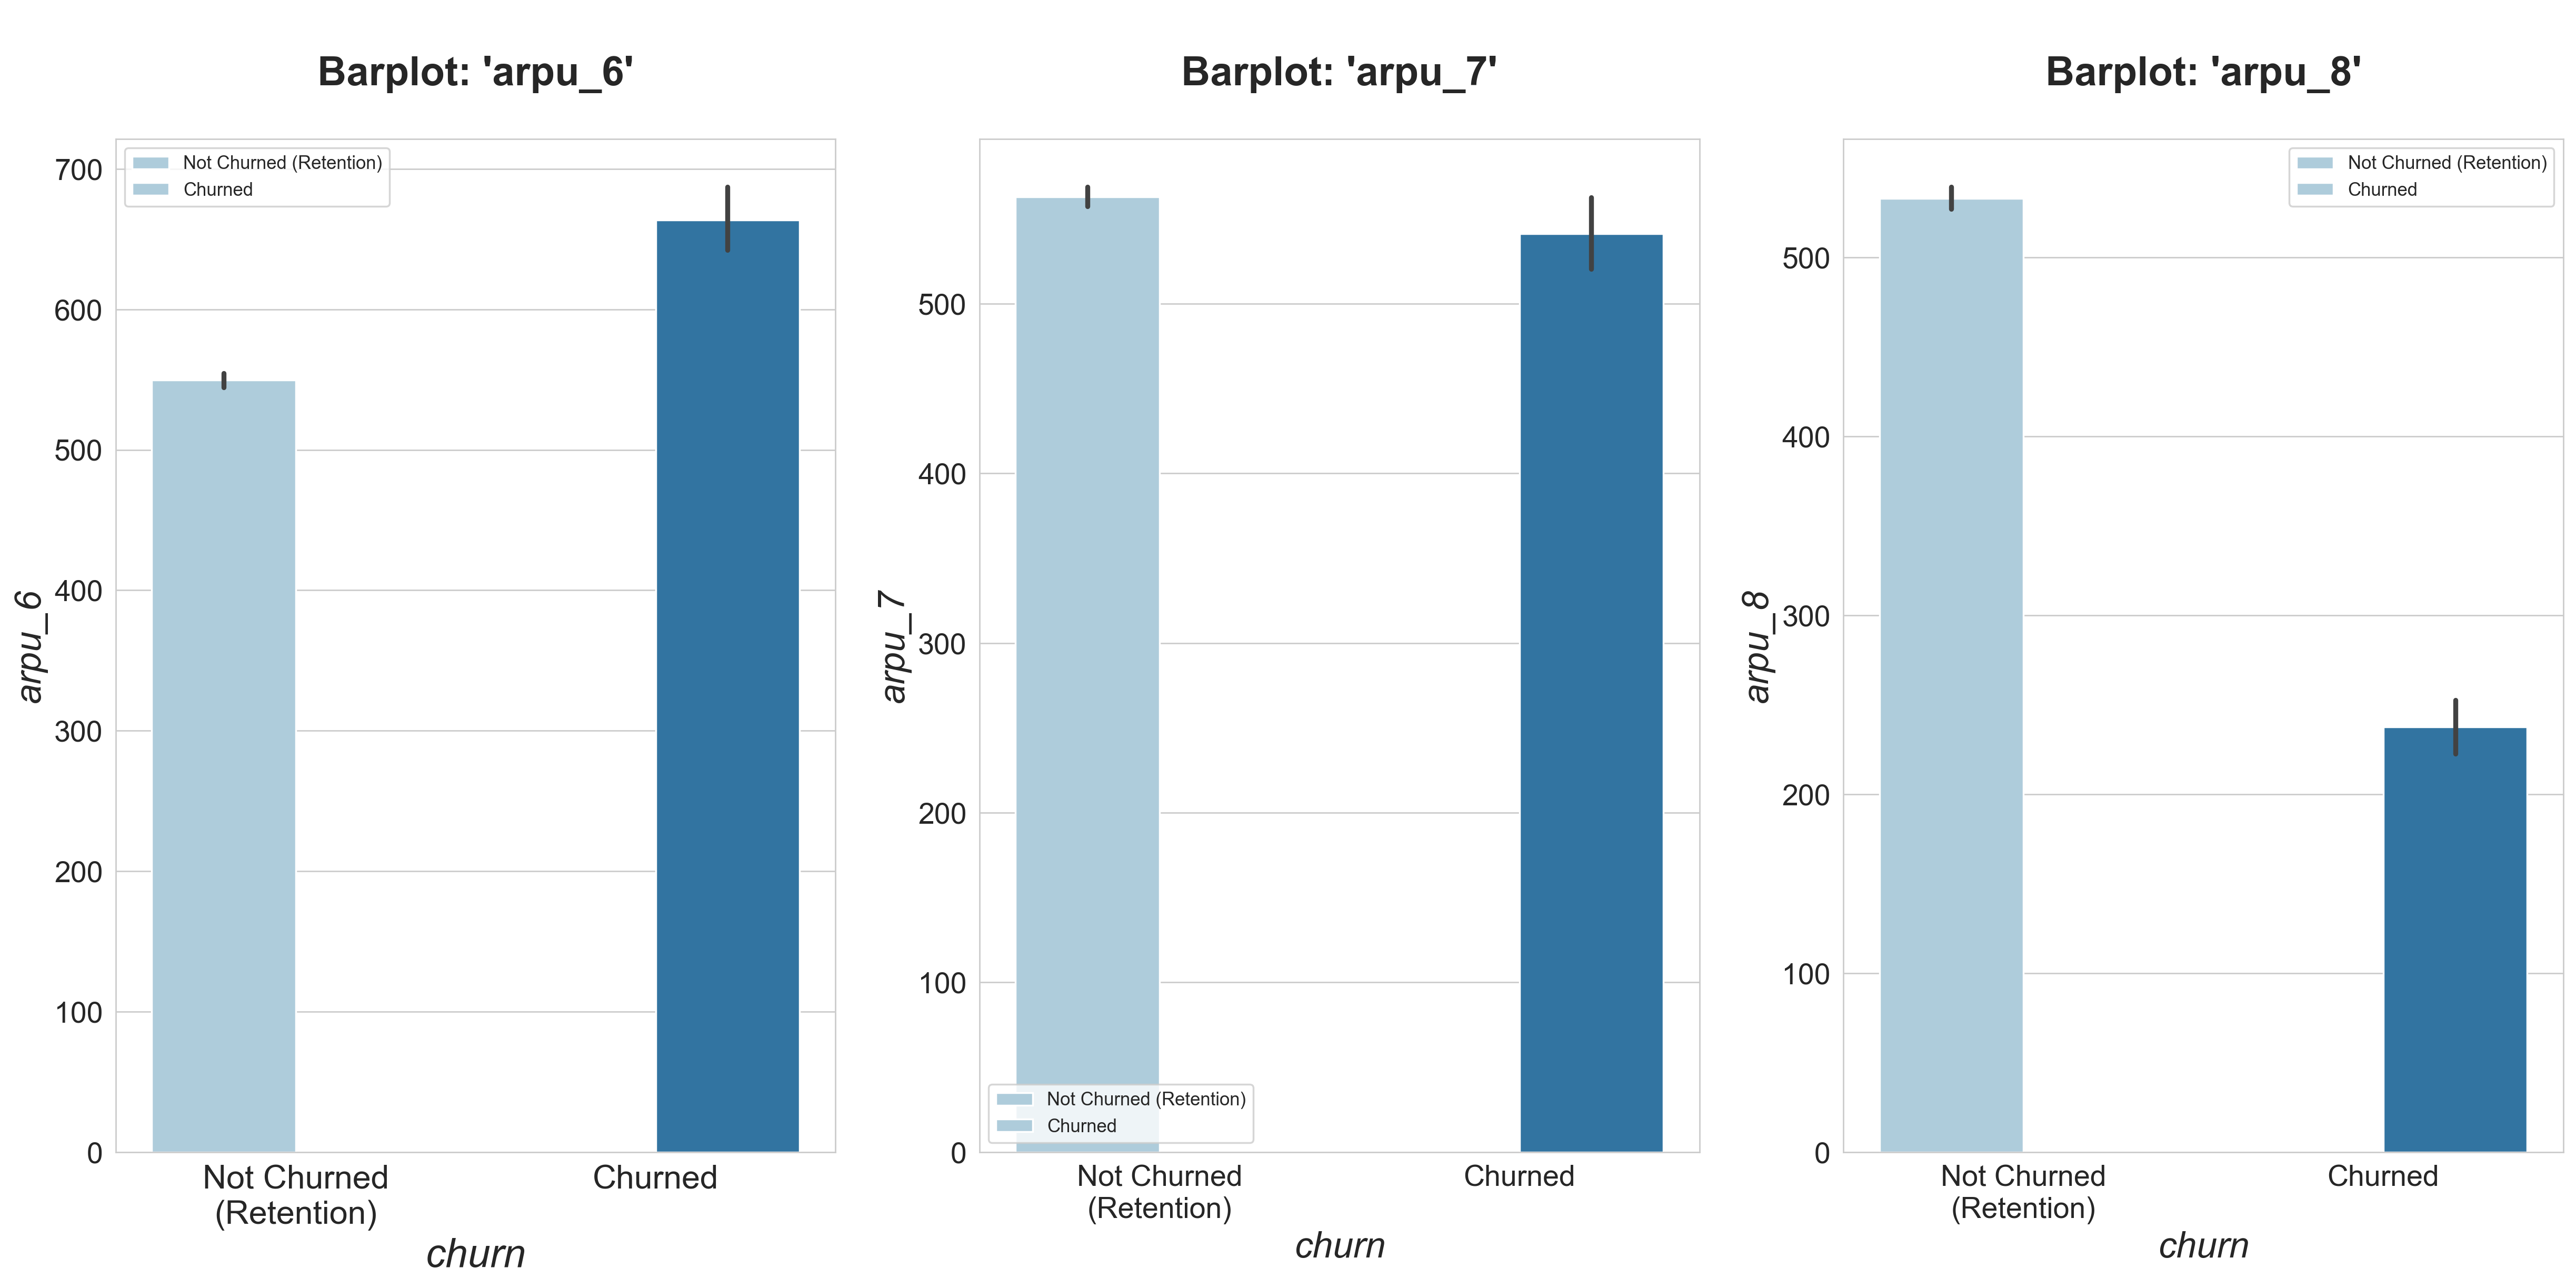

In [62]:
# Identify columns related to average revenue per user (ARPU)
arpu_cols = telecom_hv.columns[telecom_hv.columns.str.contains('arpu_')]

# Plot bar charts for ARPU features
plot_barplots_6_7_8('arpu')

**Observation:** We see a drop in the `average revenue per user` for churned customers as we approach month 8(action phase) from the good phase (i.e. months 6 and 7)

**(e) Minutes of usage (MOU): for voice calls**

In [63]:
# Identify columns related to minutes of usage (MOU)
mou_cols = telecom_hv.columns[telecom_hv.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [64]:
# Calculate and display the percentage of missing values for MOU-related columns
mou_cols_df = telecom_hv[mou_cols]
null_prcnt_df(mou_cols_df)

**Observation:** So for all minutes of usage (mou) attributes, the maximum missing % is 3.9128 , means that the customer has not used the respective minutes at all for that particular call type. For example, for the month (8) we see all the records have same missing value(%) i.e. 3.91% (maximum). Thus we can impute these missing values with 0.

In [65]:
# Recalculate and display the percentage of missing values for MOU-related columns after imputation
mou_cols_df = telecom_hv[mou_cols]
null_prcnt_df(mou_cols_df)

`No missing values` in `mou features` (including incoming, outgoing, offnet and onnet features)

**(e.1) Incoming Calls**

In [66]:
# Identify incoming (IC) MOU features for the 6th month
ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_ic_.*mou_6')])
ic_mou_features

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6']

In [67]:
# Display descriptive statistics for incoming MOU features for the 6th month
telecom_hv[ic_mou_features].describe()

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
count   29411.000000      29411.000000      29411.000000      29411.000000   
mean       16.421142         66.716145        153.247230         15.573525   
std        77.012820        165.114630        220.371043         46.157703   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.830000         30.600000          0.000000   
50%         0.000000         26.060000         86.780000          2.010000   
75%         0.000000         68.840000        191.935000         12.340000   
max      2613.310000       6351.440000       4693.860000       1678.410000   

       loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
count   29411.00000      29411.000000      29411.000000      29411.000000   
mean      235.54671         15.171358         29.750789          2.748564   
std       316.31175         78.436831         99.099988         19.286552   
min         0.00000          0.000000          0.000000          0.000000   
25%        51.33500          0.000000          0.000000          0.000000   
50%       138.73000          0.480000          5.340000          0.000000   
75%       302.32500          8.540000         24.240000          0.160000   
max      7454.63000       5459.560000       4630.230000       1351.110000   

       std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  
count  29411.000000    29953.000000  29411.000000  29411.000000  
mean      47.674363      290.121569      0.062172     11.000045  
std      138.711689      365.739944      0.189665     77.479850  
min        0.000000        0.000000      0.000000      0.000000  
25%        1.330000       72.890000      0.000000      0.000000  
50%       11.980000      183.780000      0.000000      0.000000  
75%       42.460000      372.160000      0.000000      0.000000  
max     5459.630000     7716.140000     19.760000   6789.410000

<Figure size 1440x1200 with 0 Axes>

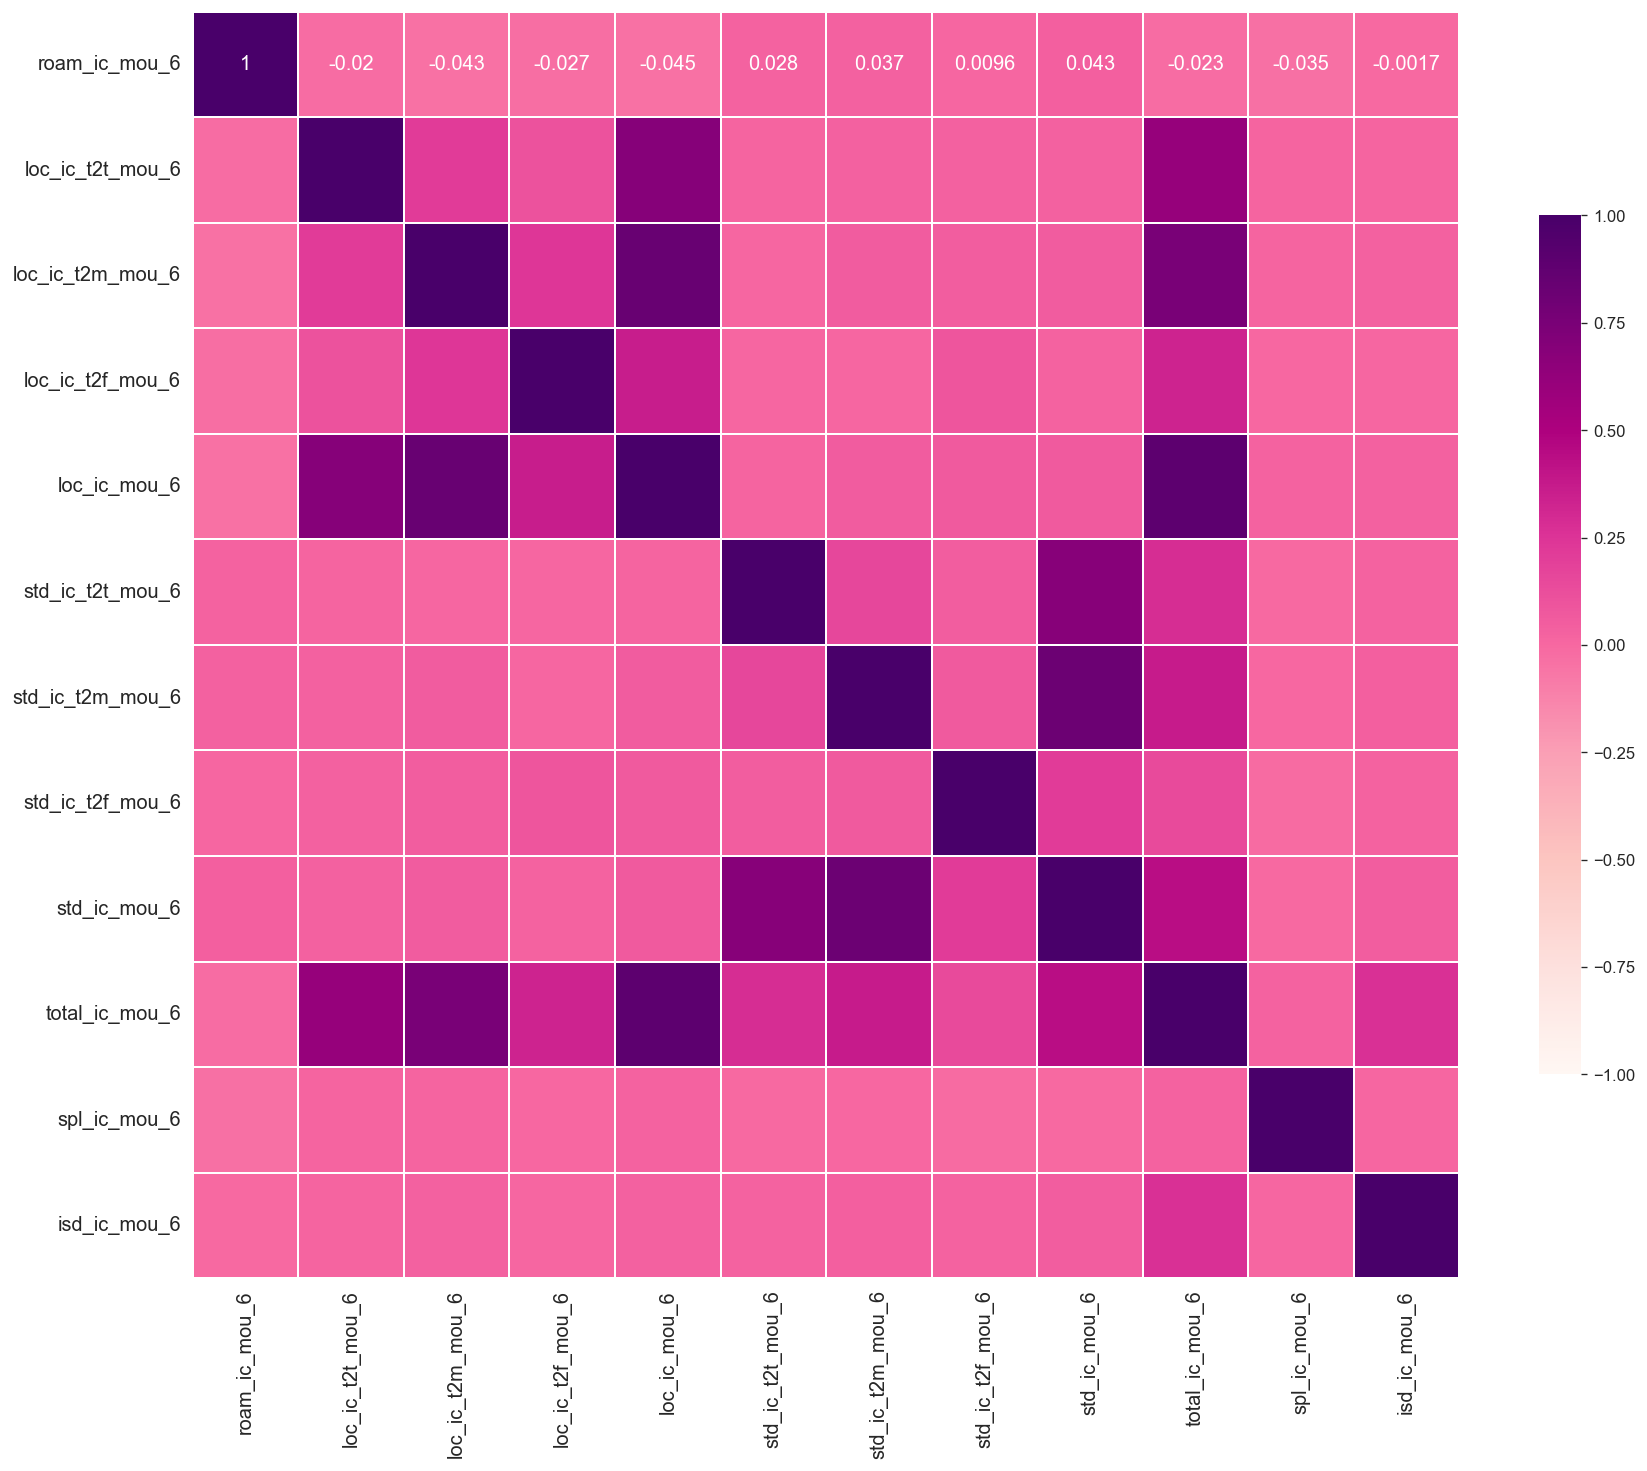

In [68]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_hv[ic_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

From the above correlation matrix, We can see that `total_ic_mou_6`, `std_ic_mou_6` and `loc_ic_mou_6` seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues. Let's cross check to eliminate multicollinearity.

**Observation:** `'loc_ic_mou_*'`, `'std_ic_mou_*'` and `'total_ic_mou_*'` seems to be the aggregated features. Thus, retaining only the granular level variables and dropping these to reduce the multicollinearity in features.

In [69]:
# Drop 'loc_ic_mou', 'std_ic_mou', and 'total_ic_mou' features for all 3 months
drop_ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_ic_mou_|std_ic_mou_|total_ic_mou_')])
print('List of features dropped:\n', drop_ic_mou_features)

telecom_hv.drop(drop_ic_mou_features, axis=1, inplace=True)

List of features dropped:
 ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


**(e.1) Outgoing Calls**

In [70]:
# Identify outgoing (OG) MOU features for the 6th month
og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_og_.*mou_6')])
og_mou_features

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'total_og_mou_6']

<Figure size 1440x1200 with 0 Axes>

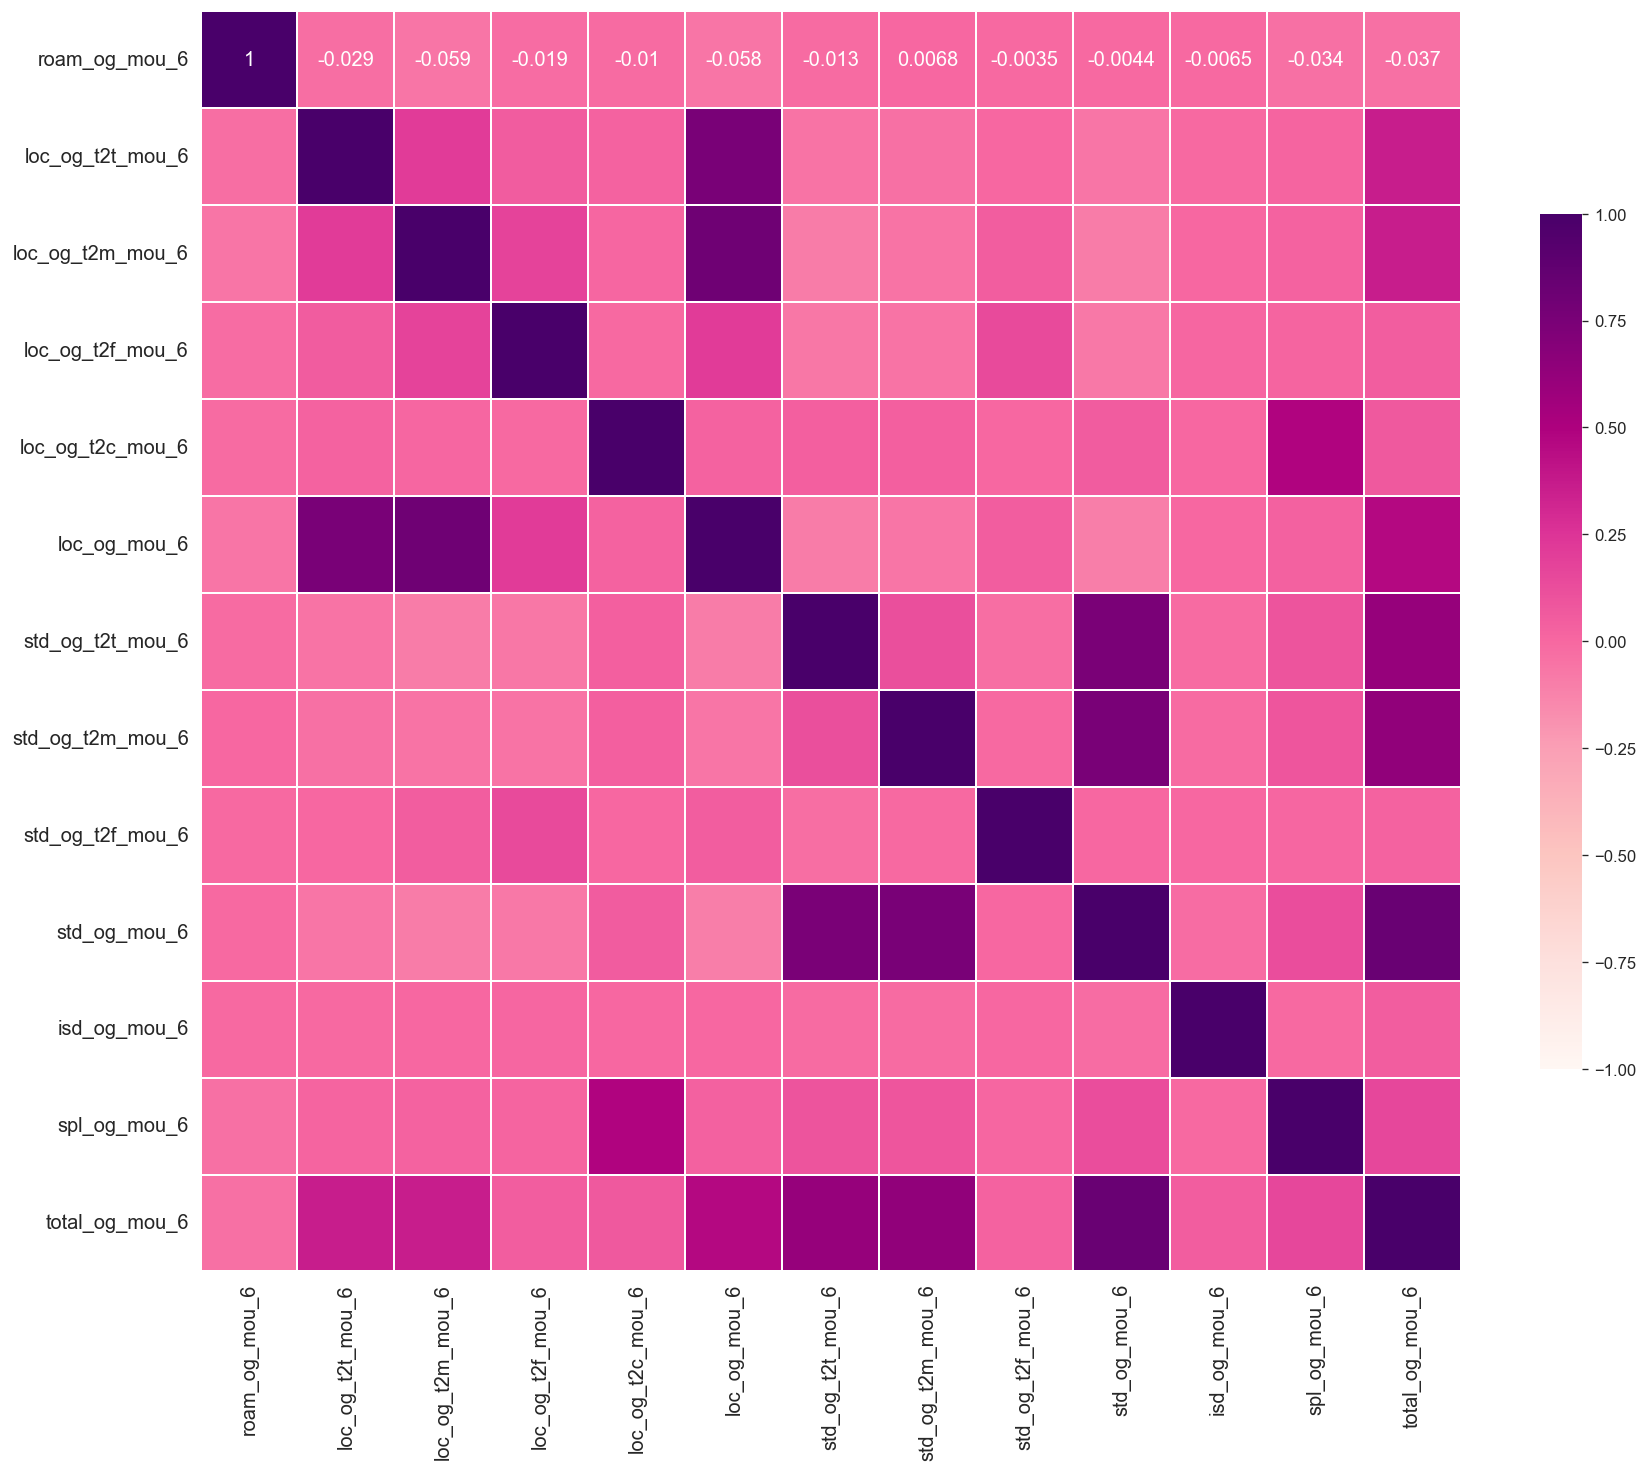

In [71]:
# Examine the correlation between outgoing MOU features for the 6th month to identify patterns
# Plot a heatmap to visualize the correlation between these variables
plt.figure(figsize=(12, 10), dpi=120)
corr_matrix_new = telecom_hv[og_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap='RdPu', cbar_kws={"shrink": .5}, vmin=-1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

From the above correlation matrix, We can see that `total_og_mou_6`, `std_og_mou_6` and `loc_og_mou_6` seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues. Let's cross check to eliminate multicollinearity.

**Observation:** `'loc_og_mou_*'`, `'std_og_mou_*'` and `'total_og_mou_*'` seems to be the aggregated features. Thus, retaining only the granular level variables and dropping these to reduce the multogollinearity in features.

In [72]:
# Drop 'loc_og_mou', 'std_og_mou', and 'total_og_mou' features for all 3 months
drop_og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_og_mou_|std_og_mou_|total_og_mou_')])
print('List of features dropped:\n', drop_og_mou_features)

telecom_hv.drop(drop_og_mou_features, axis=1, inplace=True)


List of features dropped:
 ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


**(f) Offnet MOU Usage:** *All kind of calls outside the operator T network*

In [73]:
# Identify columns related to offnet usage (MOU)
offnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('offnet.*mou')])
offnet_usage_cols

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

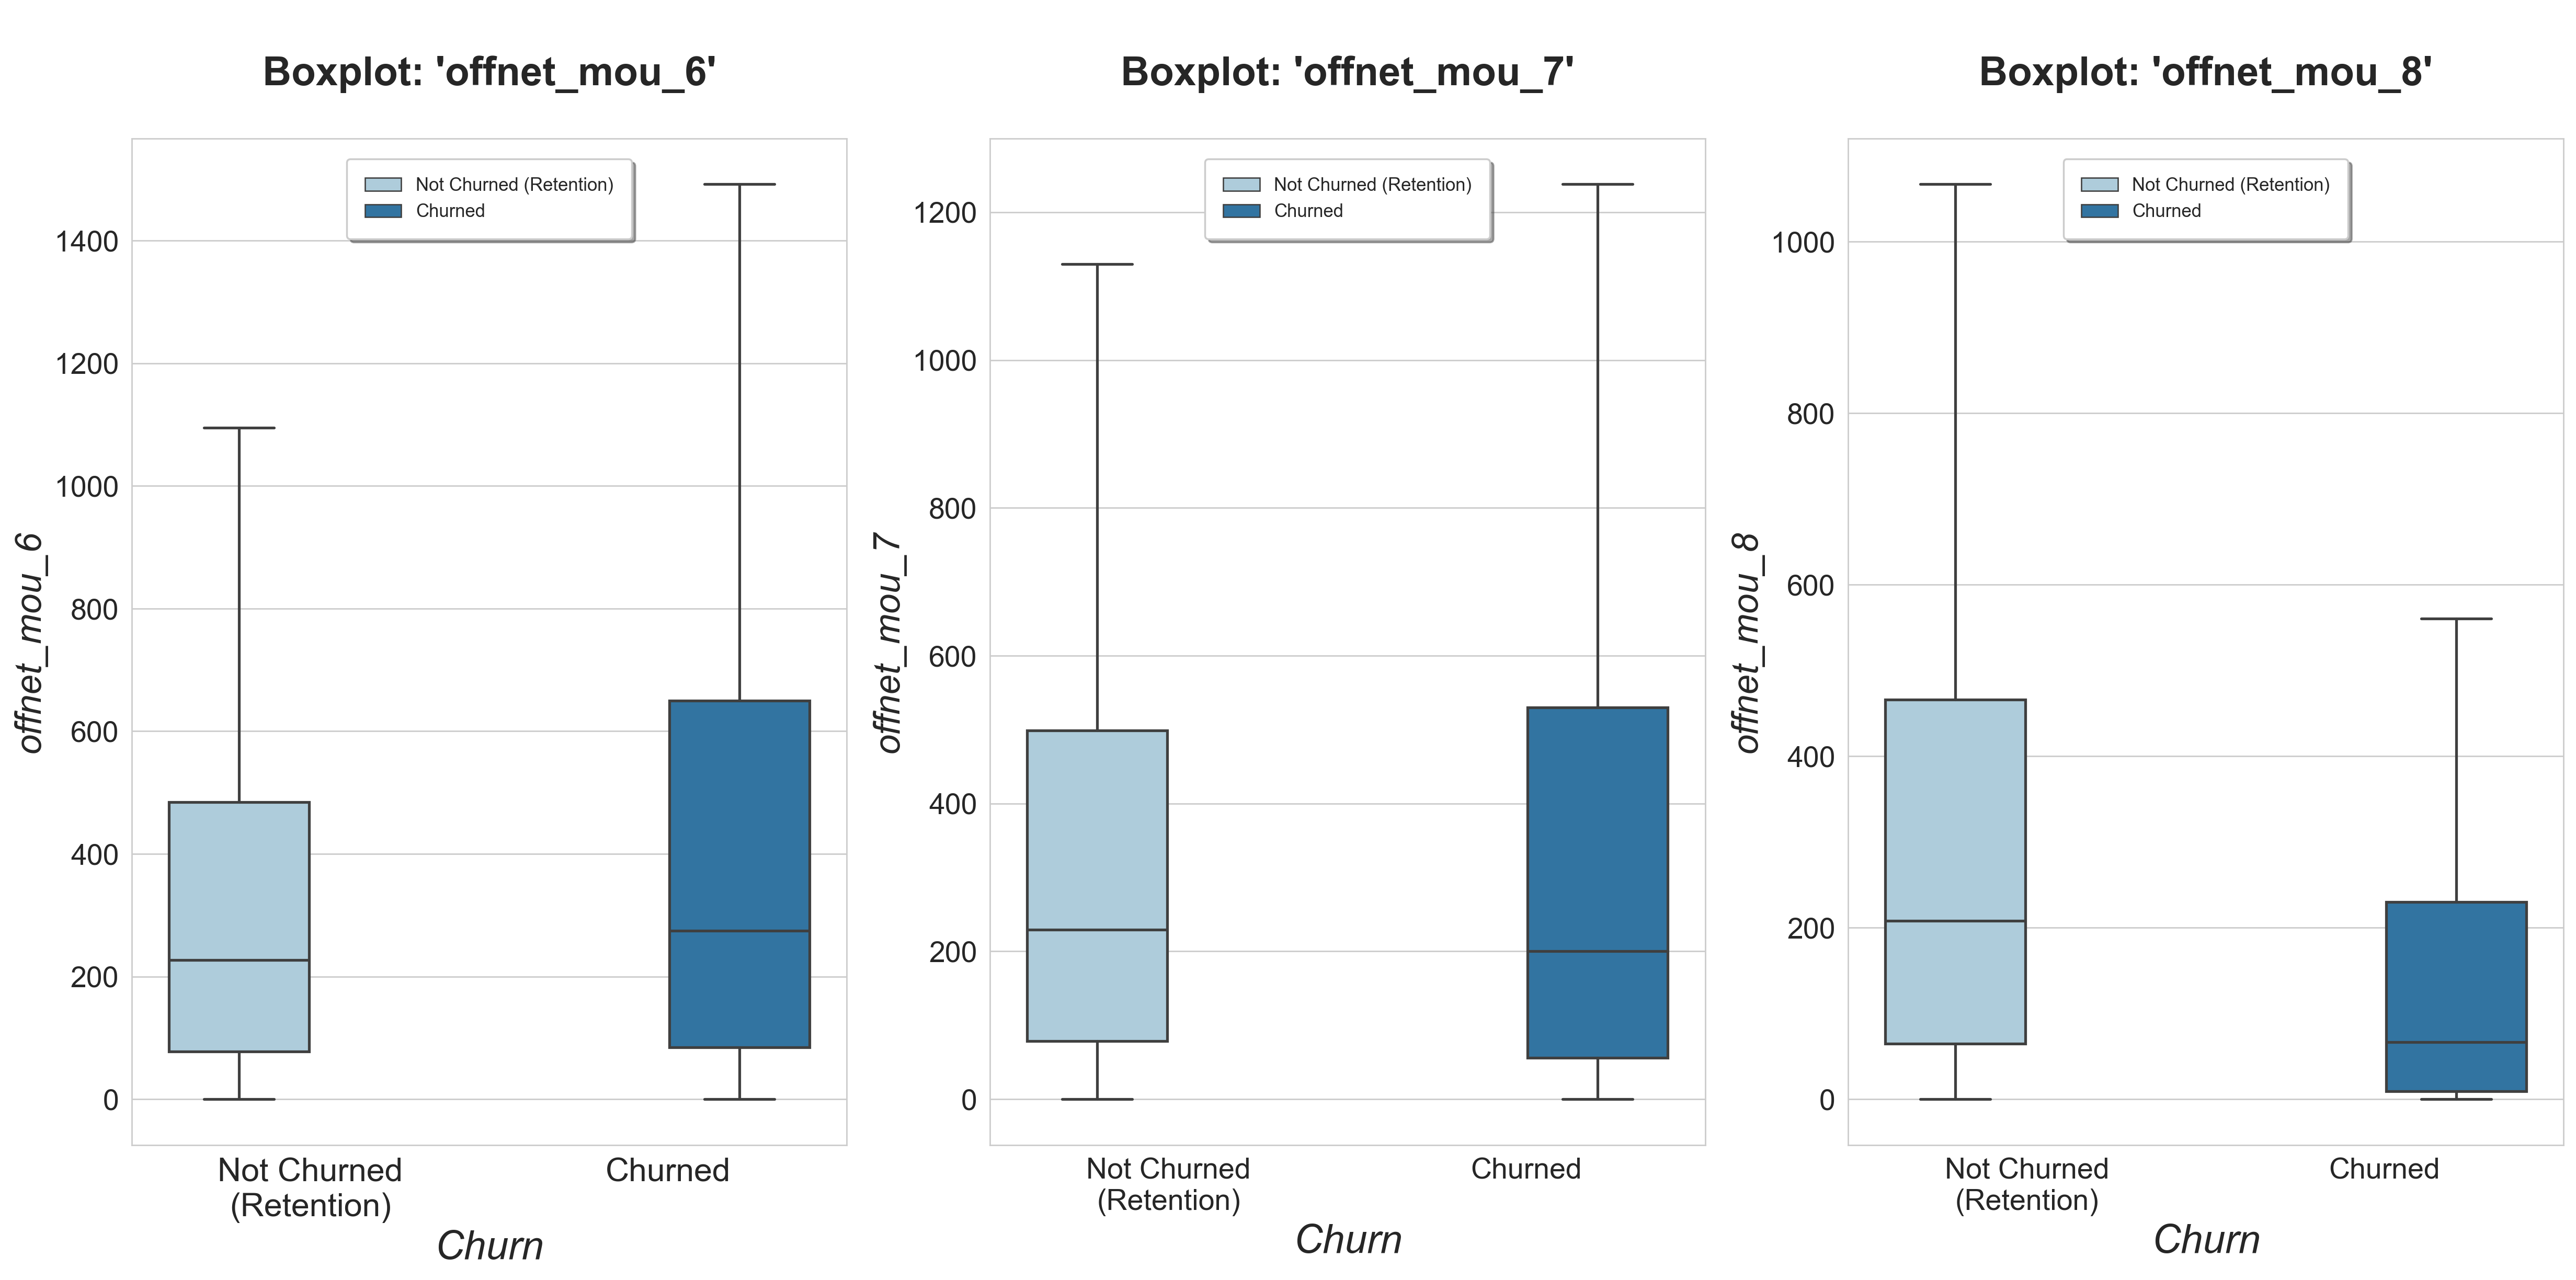

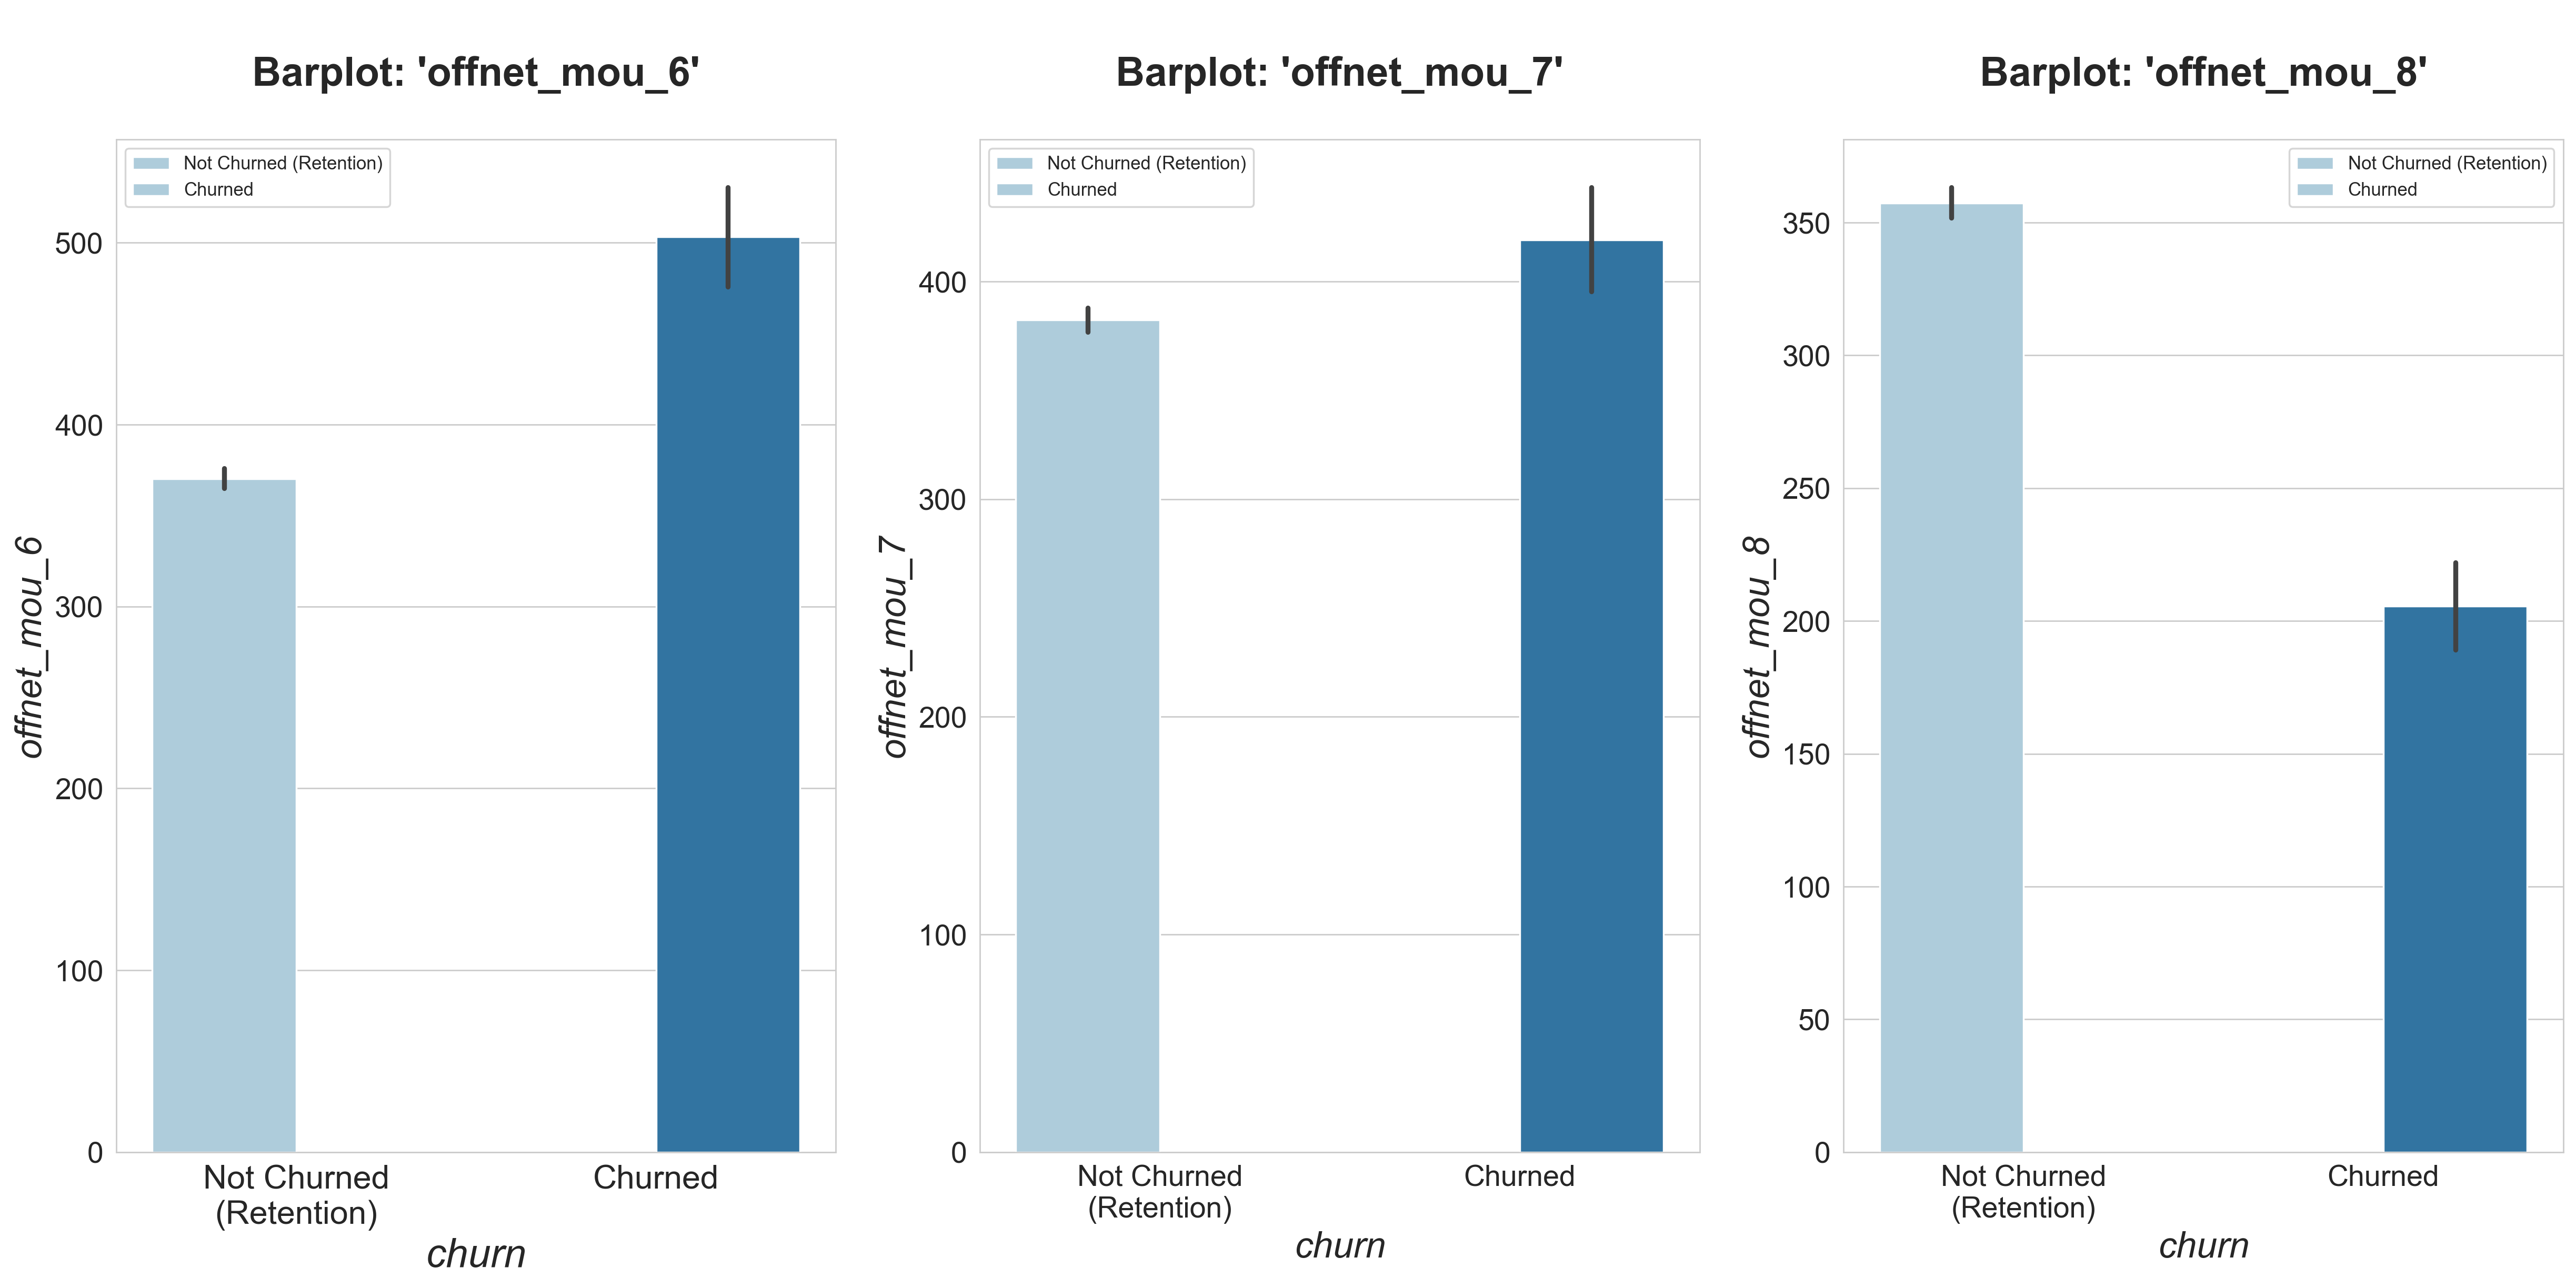

In [74]:
# Plotting 'offnet_mou' boxplots and barplots
plot_boxplots_6_7_8('offnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('offnet_mou')


**Observation:** The `offnet_mou` (minutes of usage) decline as we move from good phase (i.e. month 6 and 7) to the action phase(month 8) for churned customers.

**(g) Onnet MOU Usage:** *All kind of calls within the same operator network*

In [75]:
onnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('onnet.*mou')])
onnet_usage_cols

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

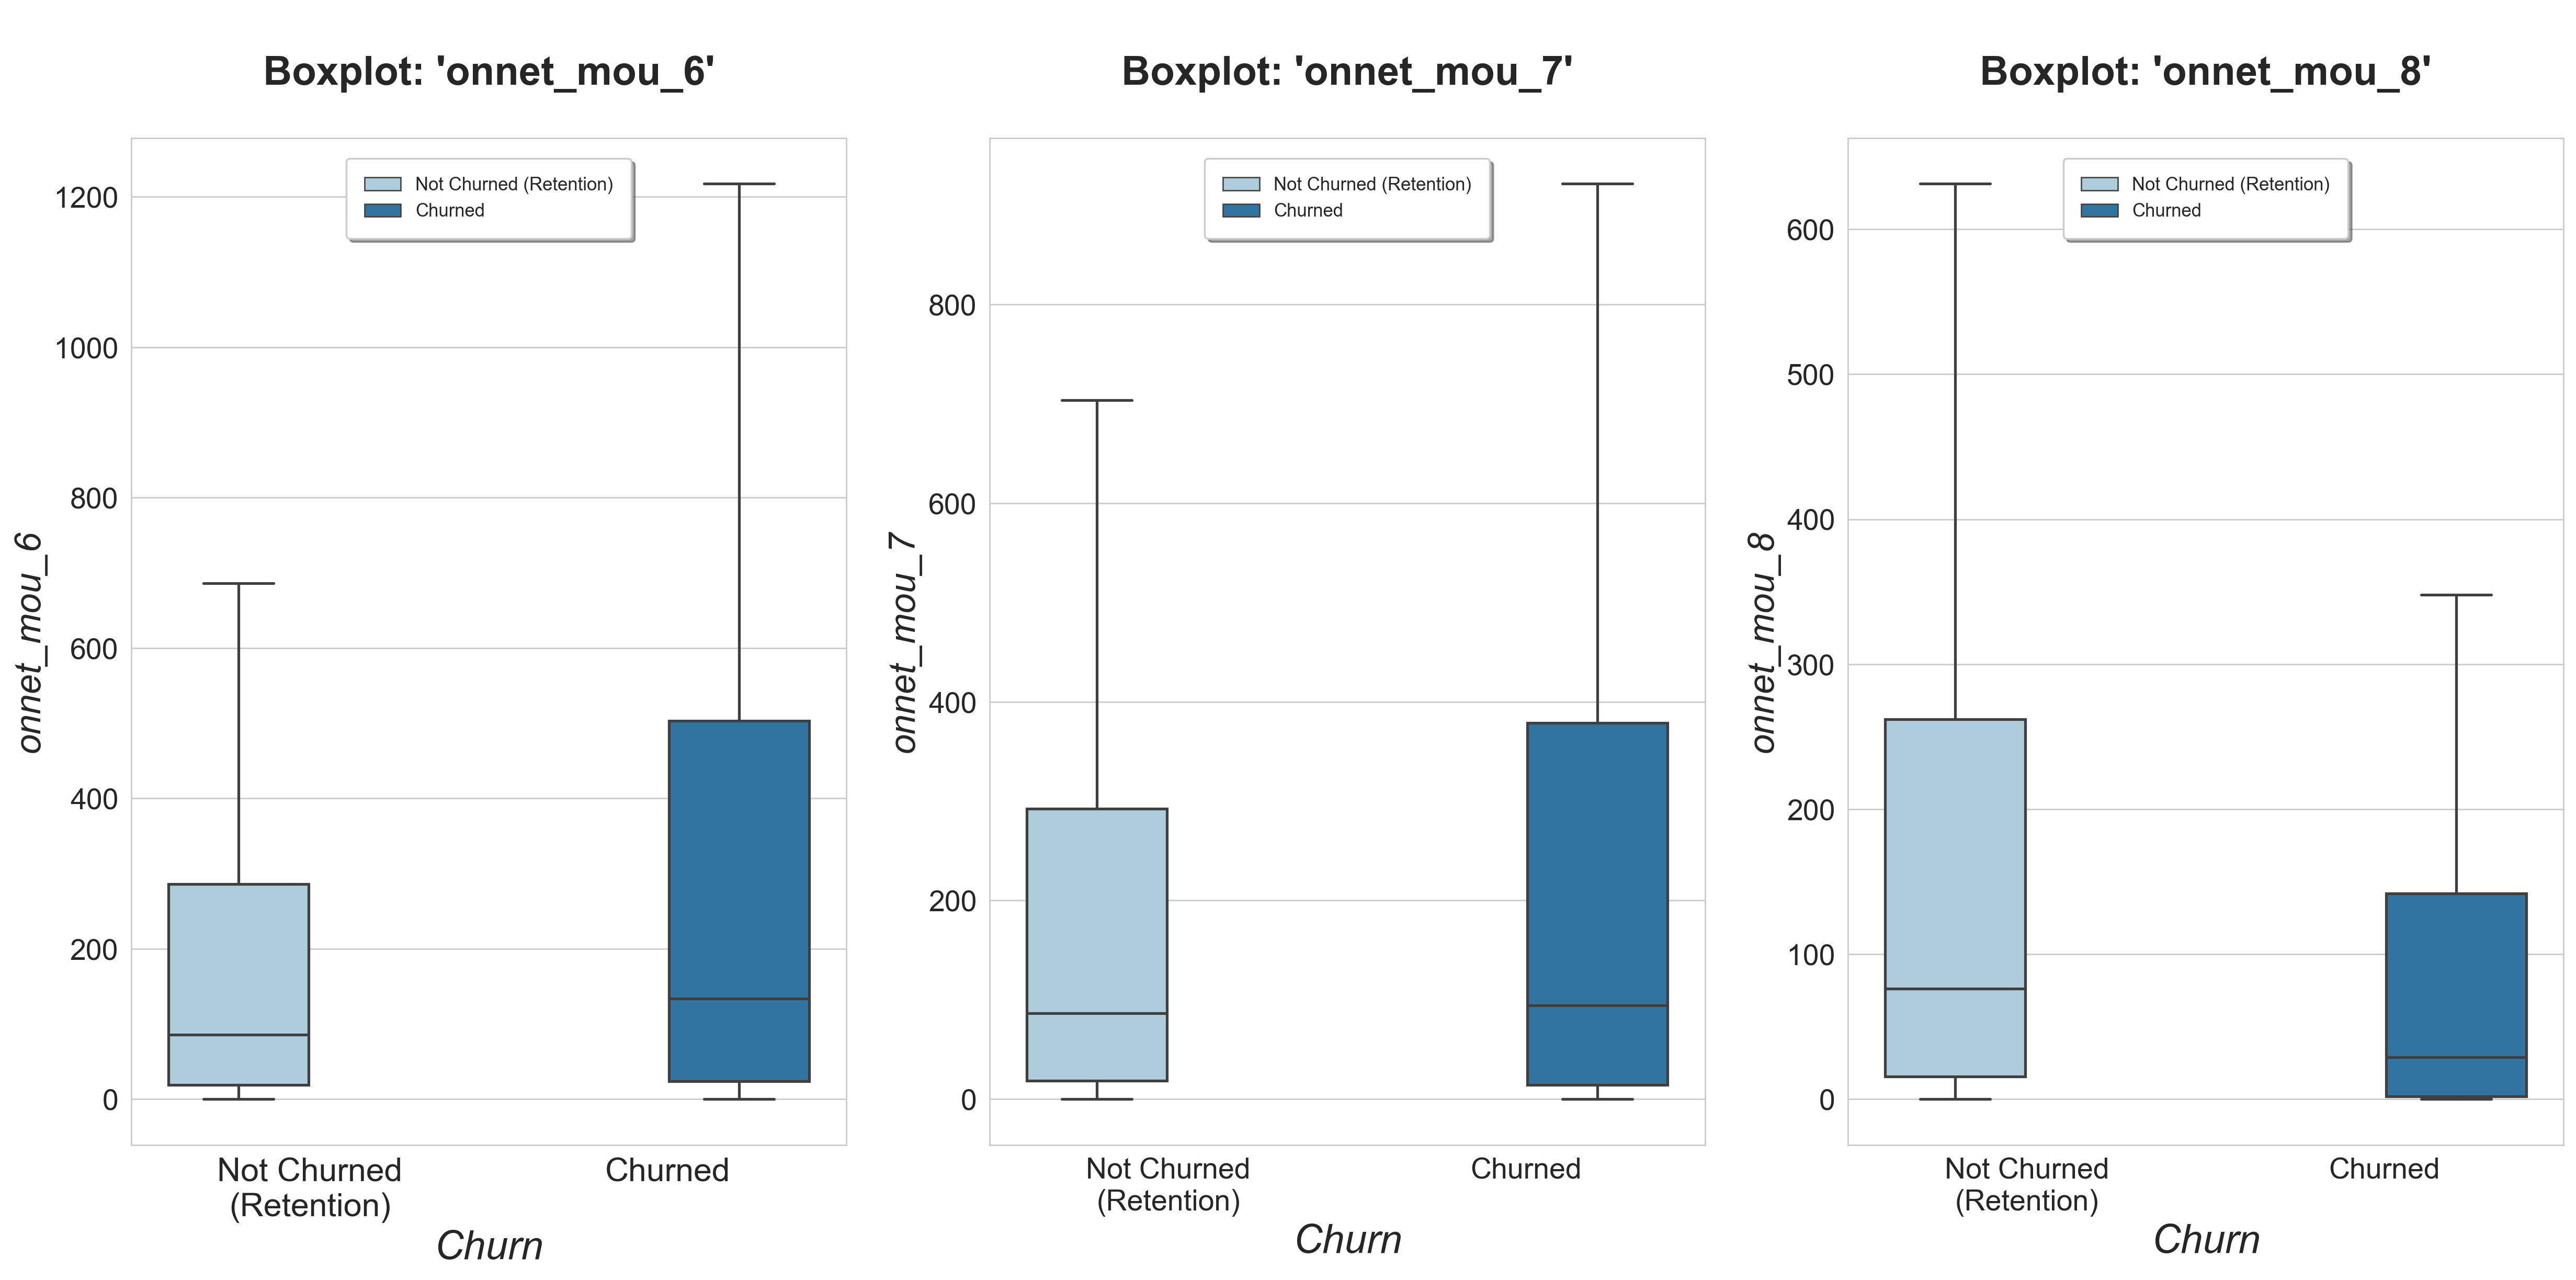

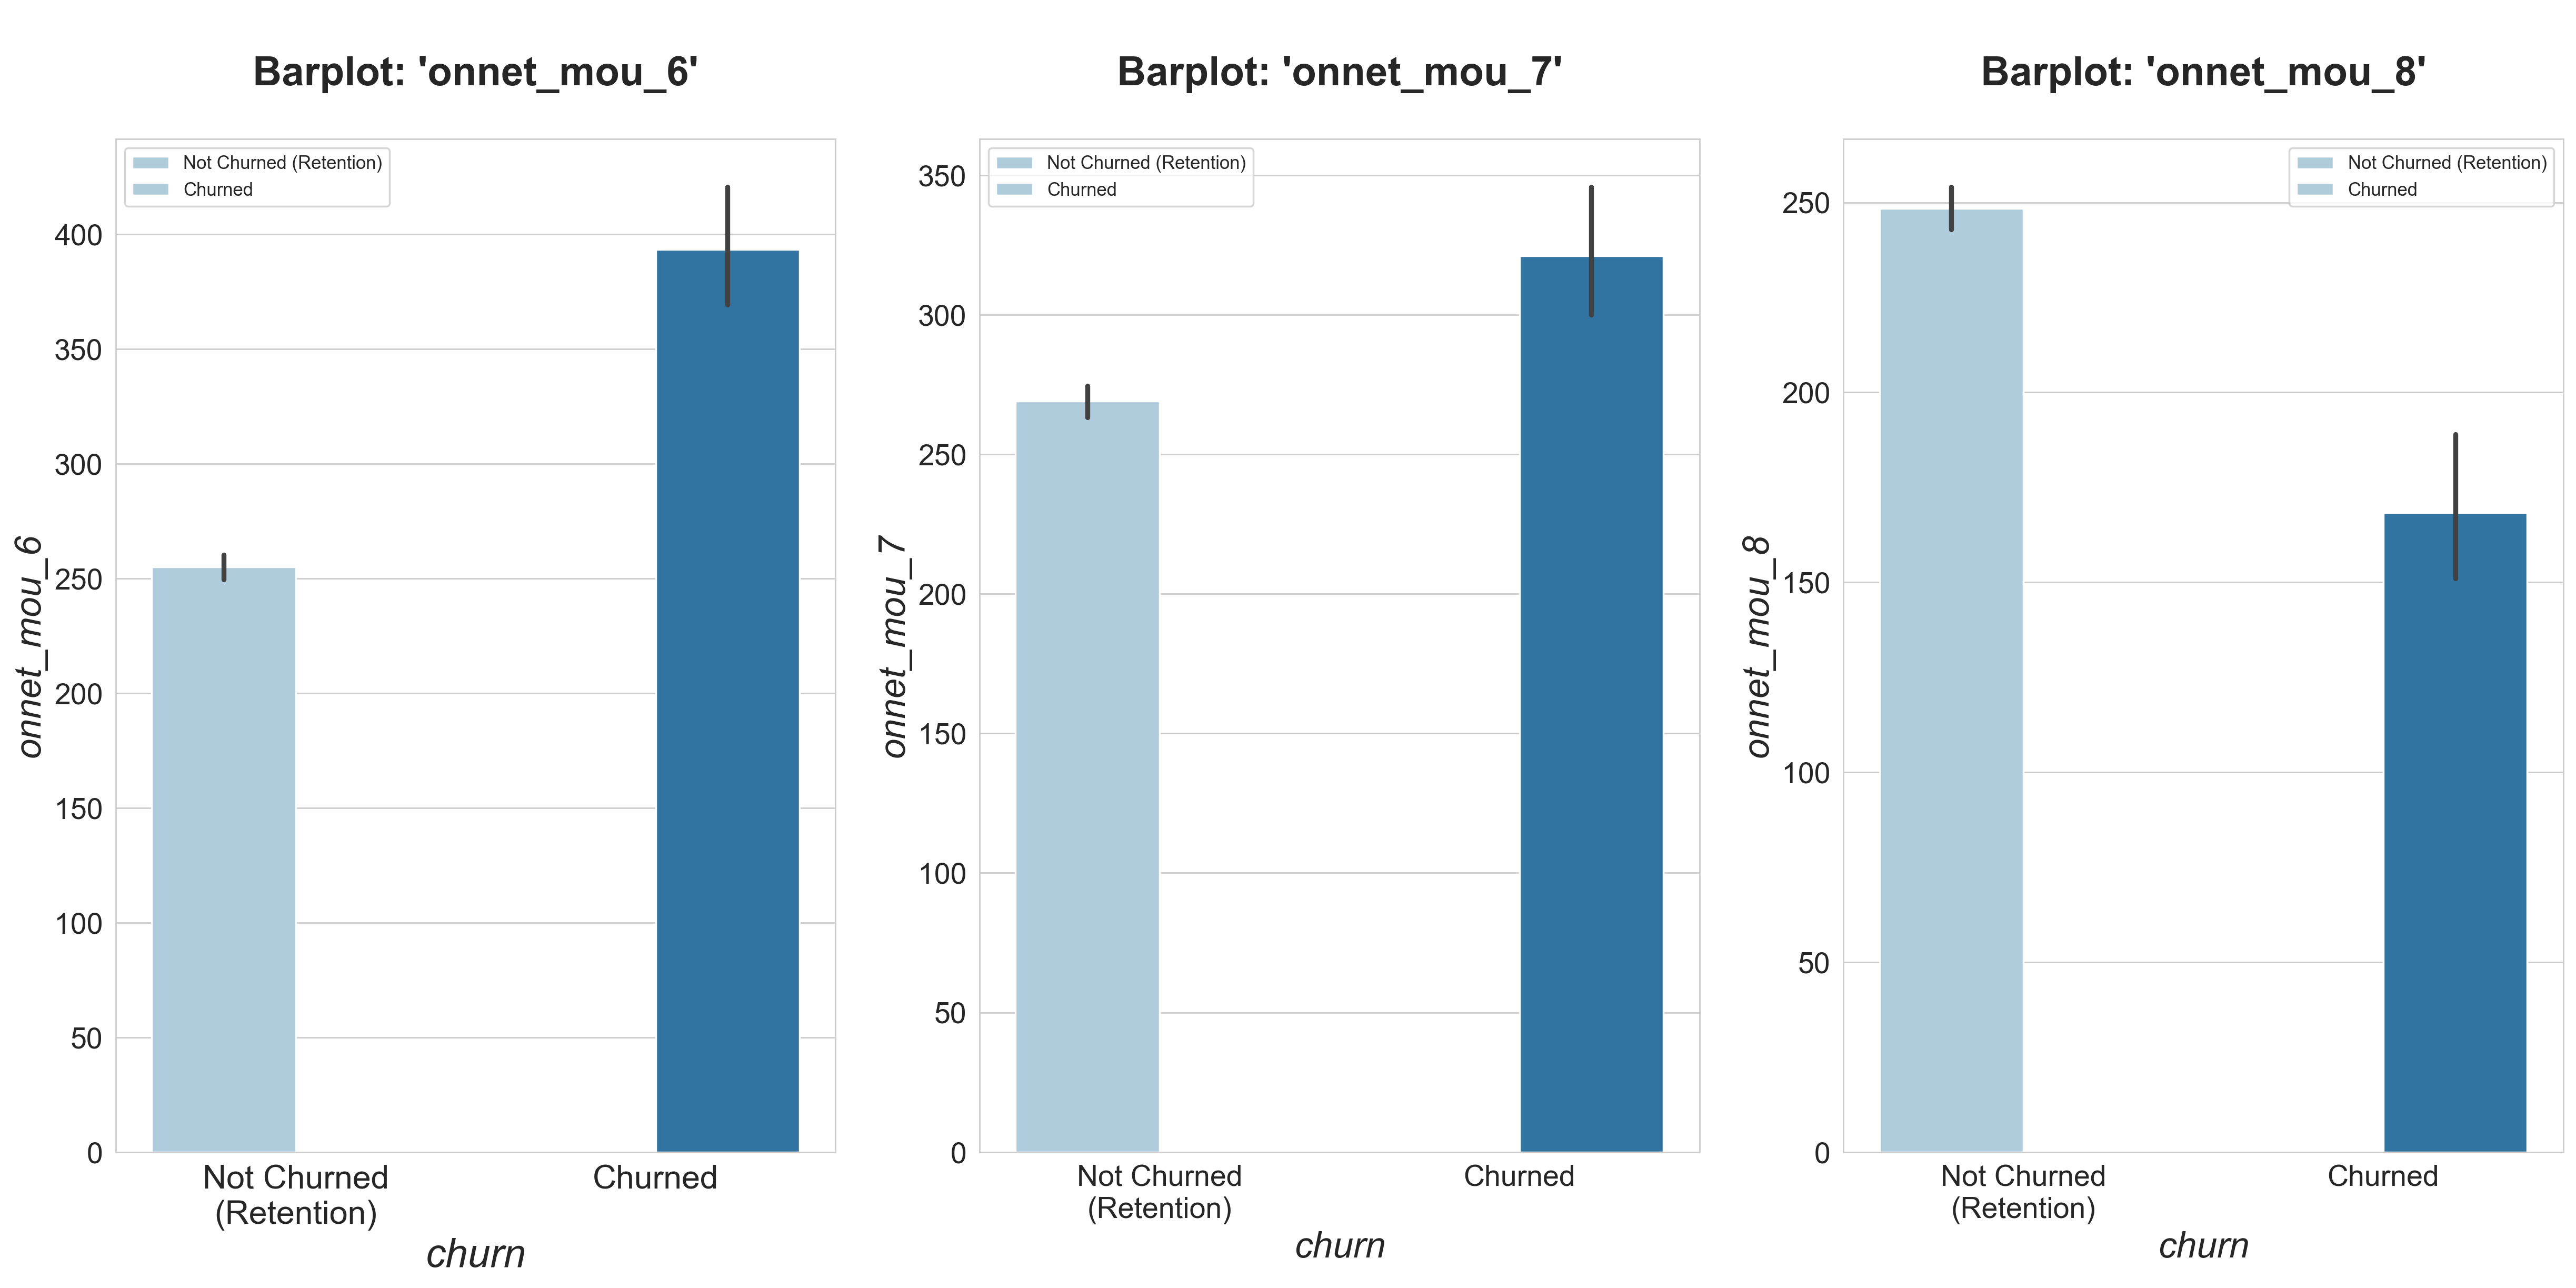

In [76]:
# Plot box plots and bar charts for 'onnet_mou' features
# Box plots will suppress outliers
plot_boxplots_6_7_8('onnet_mou')
plot_barplots_6_7_8('onnet_mou')

**Observation:** The `onnet_mou` (minutes of usage) decline as we move from good phase (i.e. month 6 and 7) to the action phase(month 8) for churned customers.

**(h) Tenure (Age on network) Analysis**

**The AON variable was used to create tenure buckets.** `[AON: Age on network (in number of days)]`<br>
It is observerd that larger the tenure, lesser was the churn - as customers who are newly acquired by the network churned more often in comparison to the old customers.

In [77]:
# Create a new column 'tenure_year' to store the number of years each customer has been on the network
telecom_hv['tenure_year'] = round(telecom_hv['aon'] / 365, 1)

print(telecom_hv.tenure_year.value_counts())
print("Min:", telecom_hv.tenure_year.min())
print("Max:", telecom_hv.tenure_year.max())

tenure_year
1.3     1361
0.6     1110
0.8     1068
1.0     1035
0.9      991
1.4      976
0.7      927
1.2      863
1.1      755
1.7      694
2.0      680
1.8      672
1.5      655
0.5      646
1.9      629
1.6      523
2.1      518
2.2      515
2.3      501
2.4      488
10.0     476
2.6      463
2.8      420
3.0      416
2.9      411
2.5      396
2.7      363
6.5      347
3.1      338
3.3      333
3.2      310
3.4      303
3.6      295
8.5      289
3.5      288
3.7      283
3.8      278
4.2      247
3.9      244
4.0      242
4.6      230
7.1      216
6.6      214
6.9      212
4.3      207
4.7      205
7.0      201
6.8      195
7.6      192
4.1      187
7.5      181
7.9      174
6.4      171
4.9      171
7.8      170
4.4      165
6.7      163
5.4      160
7.2      160
8.0      158
7.4      156
6.2      155
6.3      155
4.5      145
5.0      144
8.8      141
4.8      139
5.5      139
7.7      138
8.1      137
6.1      136
8.2      133
5.3      132
5.6      129
8.4      129
8.3      127


In [78]:
# Create bins for customer tenure and assign labels
my_bins = [0, 1, 2, 3, 5, 12]
my_labels_aon = ['0_1_year', '1_2_year', '2_3_year', '3_5_year', '5_12_year']
telecom_hv['tenure'] = pd.cut(telecom_hv['tenure_year'], bins=my_bins, labels=my_labels_aon)

# Drop the 'tenure_year' and 'aon' columns as the 'tenure' column now represents these categories
telecom_hv.drop(['tenure_year', 'aon'], axis=1, inplace=True)

telecom_hv.tenure.value_counts()

tenure
1_2_year     7808
5_12_year    7123
0_1_year     5777
3_5_year     4754
2_3_year     4491
Name: count, dtype: int64

**Observation:** We see that as the `age on network (AON) increases`, the number of `people churned out (i.e. churned class label: 1) are reduced`.

In [87]:
# Check for missing values in the telecom_hv dataframe and display only columns with missing values
missing_val_cols_prcnt = round(100 * telecom_hv.isnull().sum() / len(telecom_hv.index), 2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt != 0].sort_values(ascending=False))  # Sort columns by percentage of NaNs in descending order
missing.reset_index(inplace=True)
missing = missing.rename(columns={'index': 'features', 0: 'Null_Percentage'})
missing

features  Null_Percentage
0          fb_user_8            46.80
1   night_pck_user_8            46.80
2          fb_user_6            44.11
3   night_pck_user_6            44.11
4          fb_user_7            43.12
5   night_pck_user_7            43.12
6       isd_og_mou_8             3.91
7        og_others_8             3.91
8   loc_ic_t2t_mou_8             3.91
9   loc_og_t2f_mou_8             3.91
10  std_og_t2f_mou_8             3.91
11  loc_ic_t2m_mou_8             3.91
12  std_og_t2m_mou_8             3.91
13  loc_ic_t2f_mou_8             3.91
14  std_og_t2t_mou_8             3.91
15  std_ic_t2t_mou_8             3.91
16  loc_og_t2c_mou_8             3.91
17  std_ic_t2m_mou_8             3.91
18  std_ic_t2f_mou_8             3.91
19      spl_og_mou_8             3.91
20     roam_og_mou_8             3.91
21       onnet_mou_8             3.91
22  loc_og_t2m_mou_8             3.91
23      spl_ic_mou_8             3.91
24      offnet_mou_8             3.91
25  loc_og_t2t_mou_8             3.91
26     roam_ic_mou_8             3.91
27      isd_ic_mou_8             3.91
28       ic_others_8             3.91
29  loc_ic_t2t_mou_6             1.81
30  loc_ic_t2m_mou_6             1.81
31       og_others_6             1.81
32  loc_ic_t2f_mou_6             1.81
33      spl_ic_mou_6             1.81
34  std_ic_t2t_mou_6             1.81
35      isd_ic_mou_6             1.81
36  std_ic_t2m_mou_6             1.81
37  std_ic_t2f_mou_6             1.81
38       ic_others_6             1.81
39       onnet_mou_6             1.81
40  loc_og_t2c_mou_6             1.81
41      spl_og_mou_6             1.81
42      offnet_mou_6             1.81
43      isd_og_mou_6             1.81
44     roam_ic_mou_6             1.81
45  loc_og_t2m_mou_6             1.81
46  std_og_t2f_mou_6             1.81
47     roam_og_mou_6             1.81
48  loc_og_t2f_mou_6             1.81
49  std_og_t2m_mou_6             1.81
50  loc_og_t2t_mou_6             1.81
51  std_og_t2t_mou_6             1.81
52  loc_og_t2t_mou_7             1.79
53  loc_og_t2m_mou_7             1.79
54      isd_ic_mou_7             1.79
55     roam_og_mou_7             1.79
56       ic_others_7             1.79
57     roam_ic_mou_7             1.79
58      offnet_mou_7             1.79
59      spl_ic_mou_7             1.79
60       og_others_7             1.79
61  loc_og_t2f_mou_7             1.79
62  std_ic_t2f_mou_7             1.79
63       onnet_mou_7             1.79
64  loc_og_t2c_mou_7             1.79
65  std_ic_t2m_mou_7             1.79
66  std_og_t2t_mou_7             1.79
67  std_ic_t2t_mou_7             1.79
68  std_og_t2m_mou_7             1.79
69  loc_ic_t2f_mou_7             1.79
70  std_og_t2f_mou_7             1.79
71  loc_ic_t2m_mou_7             1.79
72      isd_og_mou_7             1.79
73  loc_ic_t2t_mou_7             1.79
74      spl_og_mou_7             1.79

**Observation:** <br>(i) Since we checked at the very beginning that `'fb_user_*''` and `'night_pck_user_*'` attributes had same number of missing values as the dates of recharging data plan. Thus, the number of missing values, imply no recharge done. However, 0 has a meaning here, we just can't impute with 0. Also, a lot of values are missing (46.8%) and these features don't seem to be significant. Hence, dropping the `'fb_user_*''` and `'night_pck_user_*'` attributes<br>(ii) Also, imputing `ig_others` and `og_others` with 0, since they had similar missing values as that of incoming mou features and outgoing mou features, thus indicating absence of mou.

In [88]:
# Drop 'fb_user_*' and 'night_pck_user_*' features from the dataframe
cols_to_drop = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
telecom_hv.drop(cols_to_drop, axis=1, inplace=True)

# Impute missing values in 'ic_others' and 'og_others' with 0 (missing values <=3.91%)
cols_to_impute = telecom_hv.columns[telecom_hv.columns.str.contains('ic_others|og_others')]
telecom_hv[cols_to_impute] = telecom_hv[cols_to_impute].replace(np.nan, 0)

In [89]:
# Check the entire high-value customer dataframe for missing (null) values
null_prcnt_df(telecom_hv)

**All the missing values have been treated carefully and we have derived meaningful insights from the telecom data provided.**

In [90]:
# Check the shape of the dataset before combining
telecom_hv.shape

(29953, 121)

**Combination of attributes: Good Phase [month (6) and (7)]**<br>Now that we are done with EDA, we can combine and average the features of month (6) and month (7) to represent the good phase, and drop the fundamental explanatory variables belonging to month (6) and (7) respectively.

In [91]:
# Identify features in telecom_hv corresponding to 'month_6'
attributes_6 = list(telecom_hv.columns[telecom_hv.columns.str.contains("_6")])
print(attributes_6)
print(len(attributes_6))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rech_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'vbc_3g_6', 'total_rech_data_amt_6', 'avg_total_rech_plus_data_amt_6_7']
40


In [92]:
# Identify features in telecom_hv corresponding to 'month_7'
attributes_7 = telecom_hv.columns[telecom_hv.columns.str.contains("_7")]
print(attributes_7)
print(len(attributes_7))

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'last_day_rech_amt_7', 'total_rech_data_7', 'max_rech_data_7',
       'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7',
       'total_rech_data_amt_7', 'avg_total_rech_plus_data_amt_6_7'],
      dtype='object')
40


In [93]:
# Drop the 'avg_total_rech_plus_data_amt_6_7' feature from the dataframe
telecom_hv.drop('avg_total_rech_plus_data_amt_6_7', axis=1, inplace=True)

In [94]:
# Combine and take the average of the remaining '_6' and '_7' attributes
feature_names_6 = [i.split('_6')[0] for i in attributes_6 if i.endswith("_6")]
feature_names_7 = [i.split('_7')[0] for i in attributes_7 if i.endswith("_7")]

# Identify feature names that are not common between '_6' and '_7'
uncommon_feature_names = [i for i, j in zip(feature_names_6, feature_names_7) if i != j]
uncommon_feature_names

[]

In [95]:
# Identify feature names that are common between '_6' and '_7'
common_feature_names = [i for i, j in zip(feature_names_6, feature_names_7) if i == j]
common_feature_names

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rech_amt',
 'total_rech_data',
 'max_rech_data',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_rech_data_amt']

In [96]:
# Since all features of '_6' exist in '_7', create new 'avg_6_7' features
# These features represent the average of '_6' and '_7' attributes

f6_cols = []
f7_cols = []
for feature in common_feature_names:
    f6 = feature + '_6'
    f7 = feature + '_7'
    avg_67 = feature + '_avg_6_7'
    
    f6_cols.append(f6)  # Store all remaining attributes from '_6'
    f7_cols.append(f7)  # Store all remaining attributes from '_7'
    
    # Calculate the average of the '_6' and '_7' attributes
    telecom_hv[avg_67] = (telecom_hv[f6] + telecom_hv[f7]) / 2

telecom_hv.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
21            808.74            876.99              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0               0.00           NaN           NaN          0.00           NaN   
7              16.68           0.0          0.18         10.01           4.5   
8           

In [97]:
# Drop the original '_6' attributes now that the 'avg_6_7' features have been created
telecom_hv.drop(f6_cols, axis=1, inplace=True)

In [98]:
# Drop the original '_7' attributes after creating the 'avg_6_7' features
telecom_hv.drop(f7_cols, axis=1, inplace=True)


In [99]:
telecom_hv.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
21              0.00             61.79            876.99              0.00   
23             17.71              0.00             39.61              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
0           0.00          0.00          0.0              0.16   
7          10.01          6.50          0.0             27.31   
8           0.00         10.23          0.0              0.31   
21          0.00          0.00          0.0             19.54   
23          0.00         17.71          0.0             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0               4.13              1.15              0.00              0.00   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
21            129.16             10.39              0.18            101.74   
23            146.84              0.71             13.38             43.91   

    std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0               0.00           0.0          0.00         0.00   
7              22.21           0.0         31.59        15.14   
8               0.00           0.0          0.00         0.00   
21              0.00           0.0          0.00         0.00   
23              0.00           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
0                  2               252             252                  252   
7                  7              3638            1580                  779   
8                 14               120              30                   10   
21                27               718              50                   50   
23                 4               439             179                    0   

    total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
0                 1.0            252.0               252.0         5.75   
7                 0.0              0.0                 0.0         0.00   
8                 3.0             23.0                69.0         0.03   
21                0.0              0.0                 0.0         0.00   
23                2.0            179.0               270.0         0.01   

    vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0        109.61             0            0             1            0   
7          0.00             0            0             0            0   
8         11.94             0            3             0            0   
21         0.00             0            0             0            0   
23      1009.92             0            0             1            1   

    vbc_3g_8  total_rech_data

In [100]:
telecom_hv.shape

(29953, 81)

In [101]:
# Get a descriptive summary of the dataframe, including specified percentiles
telecom_hv.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

mobile_number        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
count   2.995300e+04  29953.000000  28781.000000  28781.000000   28781.000000   
mean    7.001206e+09    508.890301    243.888097    348.769656      13.021785   
std     6.908102e+05    502.136278    465.505577    486.836956      75.630647   
min     7.000000e+09   -945.808000      0.000000      0.000000       0.000000   
1%      7.000026e+09      0.000000      0.000000      0.000000       0.000000   
10%     7.000251e+09     84.302800      0.650000      9.030000       0.000000   
25%     7.000609e+09    231.615000     14.280000     58.760000       0.000000   
50%     7.001203e+09    427.604000     72.990000    197.690000       0.000000   
75%     7.001804e+09    661.753000    255.310000    455.440000       0.000000   
90%     7.002165e+09    977.546400    686.940000    843.760000      16.530000   
95%     7.002285e+09   1255.086400   1099.440000   1186.980000      59.490000   
99%     7.002386e+09   1986.739600   2189.418000   2225.636000     288.310000   
99.9%   7.002408e+09   3978.343672   4254.583600   4485.747000     928.755000   
max     7.002411e+09  33543.624000  10752.560000  14007.340000    4169.810000   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
count   28781.000000      28781.000000      28781.000000       28781.00000   
mean       20.699213         81.335840        157.991961           6.13179   
std       106.833757        231.568708        236.400416          19.87269   
min         0.000000          0.000000          0.000000           0.00000   
1%          0.000000          0.000000          0.000000           0.00000   
10%         0.000000          0.000000          0.650000           0.00000   
25%         0.000000          3.840000         17.580000           0.00000   
50%         0.000000         23.260000         74.660000           0.00000   
75%         0.000000         76.110000        205.880000           4.26000   
90%        31.710000        184.440000        408.660000          15.76000   
95%       106.410000        308.230000        583.040000          29.36000   
99%       438.554000        936.944000       1100.570000          84.03600   
99.9%    1375.654400       2789.160200       2141.478000         239.81460   
max      5337.040000      10752.560000       4961.330000         928.49000   

       loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count      28781.000000      28781.000000      28781.000000      28781.000000   
mean           1.771192        154.637926        163.729361          1.651356   
std            7.283267        404.703718        416.022314         11.155894   
min            0.000000          0.000000          0.000000          0.000000   
1%             0.000000          0.000000          0.000000          0.000000   
10%            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          1.430000         12.290000          0.000000   
75%            0.110000         88.260000        128.110000          0.000000   
90%            4.860000        499.730000        482.680000          1.480000   
95%            9.700000        910.090000        863.410000          6.250000   
99%           28.808000       1935.472000       1918.156000         36.292000   
99.9%         75.795200       3806.506400       4281.068000        162.728400   
max          351.830000       8014.430000      13950.040000        516.910000   

       isd_og_mou_8  spl_og_mou_8   og_others_8  loc_ic_t2t_mou_8  \
count  28781.000000  28781.000000  29953.000000      28781.000000   
mean       2.031569      6.815709      0.057694         65.214092   
std       45.648034     20.655031      3.317780        161.718004   
min        0.000000      0.000000      0.000000          0.000000   
1%         0.000000      0.000000      0.000000          0.

**Outlier Treatment:**

In [102]:
# Identify continuous features in the dataframe, excluding 'mobile_number', 'churn', and 'tenure'
cont_cols_hv = [i for i in telecom_hv.columns if i not in ['mobile_number', 'churn', 'tenure']]
cont_cols_hv

# Cap the values of outliers in continuous features between the 1st and 99.9th percentiles using numpy.clip()
import numpy as np
for col in cont_cols_hv:
    percentiles = telecom_hv[col].quantile([0.01, 0.999]).values
    telecom_hv[col] = np.clip(telecom_hv[col], percentiles[0], percentiles[1])

We have merged most of the columns associated with month 6 & 7 (i.e. good phase) in order to reduce the number of features and retain the variables that are indicators of phase wise performance. By following this apporach, we have substantially reduced the features from 121 to 81.

**Get dummies for categorical variables:**

In [103]:
# Display the first few values of the categorical column 'tenure'
telecom_hv.tenure.head()

0     2_3_year
7     2_3_year
8     0_1_year
21    1_2_year
23    1_2_year
Name: tenure, dtype: category
Categories (5, object): ['0_1_year' < '1_2_year' < '2_3_year' < '3_5_year' < '5_12_year']

In [104]:
# 'tenure' is a categorical variable. Convert it into numeric using get_dummies
# Create dummy variables for the 'tenure' column
cat_cols = ['tenure']
d_tenure = pd.get_dummies(telecom_hv['tenure'], prefix='tenure', drop_first=True)
telecom_hv = pd.concat([telecom_hv, d_tenure], axis=1)

# Drop the original 'tenure' column
telecom_hv.drop(cat_cols, axis=1, inplace=True)

In [105]:
telecom_hv.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
21              0.00             61.79            876.99              0.00   
23             17.71              0.00             39.61              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
0           0.00          0.00          0.0              0.16   
7          10.01          6.50          0.0             27.31   
8           0.00         10.23          0.0              0.31   
21          0.00          0.00          0.0             19.54   
23          0.00         17.71          0.0             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0               4.13              1.15              0.00              0.00   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
21            129.16             10.39              0.18            101.74   
23            146.84              0.71             13.38             43.91   

    std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0               0.00           0.0          0.00         0.00   
7              22.21           0.0         31.59        15.14   
8               0.00           0.0          0.00         0.00   
21              0.00           0.0          0.00         0.00   
23              0.00           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
0                  2             252.0             252                252.0   
7                  7            3638.0            1580                779.0   
8                 14             120.0              30                 10.0   
21                27             718.0              50                 50.0   
23                 4             439.0             179                  0.0   

    total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
0                 1.0            252.0               252.0         5.75   
7                 0.0              0.0                 0.0         0.00   
8                 3.0             23.0                69.0         0.03   
21                0.0              0.0                 0.0         0.00   
23                2.0            179.0               270.0         0.01   

    vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0        109.61             0            0             1          0.0   
7          0.00             0            0             0          0.0   
8         11.94             0            3             0          0.0   
21         0.00             0            0             0          0.0   
23      1009.92             0            0             1          1.0   

    vbc_3g_8  total_rech_data

In [106]:
telecom_hv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29953 entries, 0 to 99997
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mobile_number                29953 non-null  int64  
 1   arpu_8                       29953 non-null  float64
 2   onnet_mou_8                  28781 non-null  float64
 3   offnet_mou_8                 28781 non-null  float64
 4   roam_ic_mou_8                28781 non-null  float64
 5   roam_og_mou_8                28781 non-null  float64
 6   loc_og_t2t_mou_8             28781 non-null  float64
 7   loc_og_t2m_mou_8             28781 non-null  float64
 8   loc_og_t2f_mou_8             28781 non-null  float64
 9   loc_og_t2c_mou_8             28781 non-null  float64
 10  std_og_t2t_mou_8             28781 non-null  float64
 11  std_og_t2m_mou_8             28781 non-null  float64
 12  std_og_t2f_mou_8             28781 non-null  float64
 13  isd_og_mou_8         

**All the features are converted into numeric types.**

In [107]:
##Creating an alternate copy of 'telecom_hv' dataframe 
df1= telecom_hv.copy()

### Model Building

#### 1) Logistic Regression Model without PCA (using RFE)

**Checking the Correlation between independent variables (multicollinearity)**

In [108]:
# Create a copy of the original dataframe 'df1' and assign it to 'telecom_hv'
telecom_hv = df1.copy()

In [109]:
# Recheck and eliminate predictor variables that have high correlation (absolute threshold: 0.7) with other predictors

# Drop the target variable 'churn' for correlation analysis
df_corr = telecom_hv.drop(['churn'], axis=1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

# Get the upper triangle of the correlation matrix
upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(bool))
# Identify columns with correlation greater than 0.70
cols_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  # Reduce multicollinearity
cols_to_drop  # List of columns to drop from the dataframe due to high correlation with other predictors

['std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'total_rech_amt_8',
 'av_rech_amt_data_8',
 'vol_3g_mb_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'total_rech_data_amt_8',
 'onnet_mou_avg_6_7',
 'offnet_mou_avg_6_7',
 'roam_og_mou_avg_6_7',
 'loc_og_t2t_mou_avg_6_7',
 'loc_og_t2m_mou_avg_6_7',
 'loc_og_t2f_mou_avg_6_7',
 'std_og_t2t_mou_avg_6_7',
 'std_og_t2m_mou_avg_6_7',
 'std_og_t2f_mou_avg_6_7',
 'isd_og_mou_avg_6_7',
 'loc_ic_t2t_mou_avg_6_7',
 'loc_ic_t2m_mou_avg_6_7',
 'loc_ic_t2f_mou_avg_6_7',
 'std_ic_t2t_mou_avg_6_7',
 'std_ic_t2m_mou_avg_6_7',
 'isd_ic_mou_avg_6_7',
 'total_rech_num_avg_6_7',
 'total_rech_amt_avg_6_7',
 'total_rech_data_avg_6_7',
 'max_rech_data_avg_6_7',
 'av_rech_amt_data_avg_6_7',
 'vol_3g_mb_avg_6_7',
 'sachet_2g_avg_6_7',
 'monthly_3g_avg_6_7',
 'vbc_3g_avg_6_7',
 'total_rech_data_amt_avg_6_7']

In [110]:
# Drop the strongly correlated variables identified in 'cols_to_drop' from the 'telecom_hv' dataframe
telecom_hv.drop(cols_to_drop, axis=1, inplace=True)

In [111]:
telecom_hv.shape

(29953, 50)

**Train-Test Split:**

In [112]:
# Split the dataframe into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(telecom_hv, train_size=0.7, test_size=0.3, random_state=42)


#### Feature Scaling

In [125]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

NameError: name 'binary_cols' is not defined

In [114]:
print(df_train.shape)
print(df_test.shape)

(20967, 50)
(8986, 50)


In [115]:
##Scaled train-data
df_train.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
49069     7001355112   101.851         0.38         20.21            0.0   
90375     7000854074  1662.620      3569.78        149.24            0.0   
80131     7000386767   477.888         0.00        130.03            0.0   
36950     7001423393     0.000          NaN           NaN            NaN   
22699     7002096076   741.443        26.48       1768.29            0.0   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
49069            0.0              0.38             19.33              0.35   
90375            0.0             21.34             15.14              0.25   
80131            0.0              0.00            119.66              0.00   
36950            NaN               NaN               NaN               NaN   
22699            0.0             26.48           1758.43              1.25   

       loc_og_t2c_mou_8  std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  \
49069              0.00               0.0           0.0          9.26   
90375              0.00               0.0           0.0          4.24   
80131              0.00               0.0           0.0          0.00   
36950               NaN               NaN           NaN           NaN   
22699              0.18               0.0           0.0          2.51   

       og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
49069          0.0              6.63             46.88              0.00   
90375          0.0             13.96             35.19              0.00   
80131          0.0              0.00            754.48              0.00   
36950          0.0               NaN               NaN               NaN   
22699          0.0             25.08            187.88              5.84   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  \
49069              2.13              0.58               0.0          0.51   
90375              1.10              0.05               0.0          0.00   
80131              0.00              0.00               0.0          0.00   
36950               NaN               NaN               NaN           NaN   
22699              0.00              2.28               0.0          0.00   

       isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
49069           0.0         0.06                10              50   
90375           0.0         0.00                72              50   
80131           0.0         0.06                10             144   
36950           NaN         0.00                 0               0   
22699           0.0         0.05                 9             144   

       last_day_rech_amt_8  total_rech_data_8  max_rech_data_8  vol_2g_mb_8  \
49069                 50.0                3.0              8.0       724.76   
90375                 50.0                0.0              0.0         0.00   
80131                  0.0                3.0             98.0         0.36   
36950                  0.0                0.0              0.0         0.00   
22699                130.0                0.0              0.0         0.00   

       monthly_2g_8  sachet_3g_8  vbc_3g_8  churn  arpu_avg_6_7  \
49069             0          0.0      0.00      0      124.2680   
90375             0          0.0      0.00      0      791.3300   
80131             0          0.0     22.14      0      463.5105   
36950             0          0.0      0.00      1      361.3235   
22699             0          0.0      0.00      0      634.7160   

       roam_ic_mou_avg_6_7  loc_og_t2c_mou_avg_6_7  spl_og_mou_avg_6_7  \
49069                  0.0                   10.36              41.695   
90375                  0.0                    0.00               0.100   
80131                  0.0                    0.00               3.575   
36950                  NaN                     NaN                 NaN   
22699                  0.0                    0.00   

In [116]:
# Store the target variable 'churn' in y_train and y_test respectively
y_train = df_train['churn']
y_test = df_test['churn']

# Store all feature variables in X_train and X_test
X_train = df_train.drop('churn', axis=1)
X_test = df_test.drop('churn', axis=1)

In [117]:
# Handling class imbalance using SMOTE
y = telecom_hv['churn']
print("Before OverSampling, count of label '1' (in training set): {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0' (in training set): {} \n".format(sum(y_train == 0)))
print("Before OverSampling, churn event rate (entire dataset): {}% \n".format(round(sum(y == 1) / len(y) * 100, 3)))


Before OverSampling, count of label '1' (in training set): 1695
Before OverSampling, count of label '0' (in training set): 19272 

Before OverSampling, churn event rate (entire dataset): 8.123% 



**We have almost `8.123%` churn rate. There is class-imbalance in the dataset. Let's check for it.**

In [118]:
# Before applying SMOTETomek to address class imbalance, let's build and evaluate a logistic regression model on the unbalanced dataset

# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Train the model on the training set
lr.fit(X_train, y_train.ravel())

# Make predictions on the test set
predictions = lr.predict(X_test)

# Print the classification report to evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Not Churned', 'Churned']))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Observations:**<br>(i) The `accuracy` is around 93% but it `doesn't serve as a good evaluation metric` as the `classes are imbalanced` in the dataset.<br>
(ii) The `recall of Churned i.e. positive label (Sensitivity)` is 0.26 is `low` and the `recall of Not Churned i.e. negative label (Specificity)` is `high`, almost 1 (0.99).<br>
(iii) This is not desired since we need to reduce the False Negatives. `For better prediction of Churned (Postive Labels)`, the `sensitivity has to be high`.

In [119]:
# Applying 'SMOTETomek' (a hybrid technique of SMOTE and Tomek links) to address class imbalance

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_res.shape))

print("After OverSampling, count of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, count of label '0': {}".format(sum(y_res == 0)))
print("After OverSampling, churn event rate: {}% \n".format(round(sum(y_res == 1) / len(y_res) * 100, 2)))

ValueError: Input X contains NaN.
SMOTETomek does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

##### Now the class in train set seems to be balanced.

**Model Building:** Running Your First Training Model

In [120]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [121]:
# Logistic regression model
logm1 = sm.GLM(y_res,(sm.add_constant(X_res)), family = sm.families.Binomial())
logm1.fit().summary()

NameError: name 'y_res' is not defined

**Feature Selection Using RFE**

In [122]:
logreg = LogisticRegression()   ##Class imbalance dealt using SMOTE
logreg

LogisticRegression()

In [123]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'logreg' is your logistic regression model
logreg = LogisticRegression() 

rfe = RFE(estimator=logreg, n_features_to_select=25) 
rfe = rfe.fit(X_res, y_res)


NameError: name 'X_res' is not defined

In [124]:
list(zip(X_res.columns, rfe.support_, rfe.ranking_))

NameError: name 'X_res' is not defined